In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def wolfram_ca_four(rule: int, initial: np.ndarray, steps: int) -> np.ndarray:
    """
    Compute elementary cellular automata.
    
    Parameters
    ----------
    rule : int
        The rule to be applied (0-65535 inclusive) in base 10
    initial : np.ndarray
        The top row to begin from
    steps : int
        The number of generations to compute
        
    Returns
    -------
    np.ndarray
        An array of shape len(initial) x steps for the computed cellular
        automata
    """
    rule = bin(rule)[2:].zfill(16)
    states = []

    def _pad(state):
        return np.concatenate([[0, 0], state, [0, 0]])

    state = initial
    states.append(state.astype(int))
    for _ in range(steps):
        new_state = np.zeros(len(state))
        for i in range(len(state)):
            quintuplet = _pad(state)[i : i + 4]
            quintuplet_int = int("".join(quintuplet.astype(int).astype(str)), 2)
            new_state[i] = int(rule[::-1][quintuplet_int])
        state = new_state
        states.append(state.astype(int))

    return np.array(states)

In [3]:
def plot_ca(states, rule):
    fig, ax = plt.subplots(figsize=(int(states.shape[1] / 2), int(states.shape[0]) / 2))
    ax.imshow(states, cmap="Greys")
    ax.set_xticks(np.arange(0, states.shape[1], 1))
    ax.set_yticks(np.arange(0, states.shape[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(np.arange(-0.5, states.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-0.5, states.shape[0], 1), minor=True)
    ax.grid(which="minor", color="grey", linestyle="-", linewidth=2)
    ax.set_title(f"Rule {rule}", size=24)
    return ax

c:\users\aidan\anaconda3\envs\ds2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


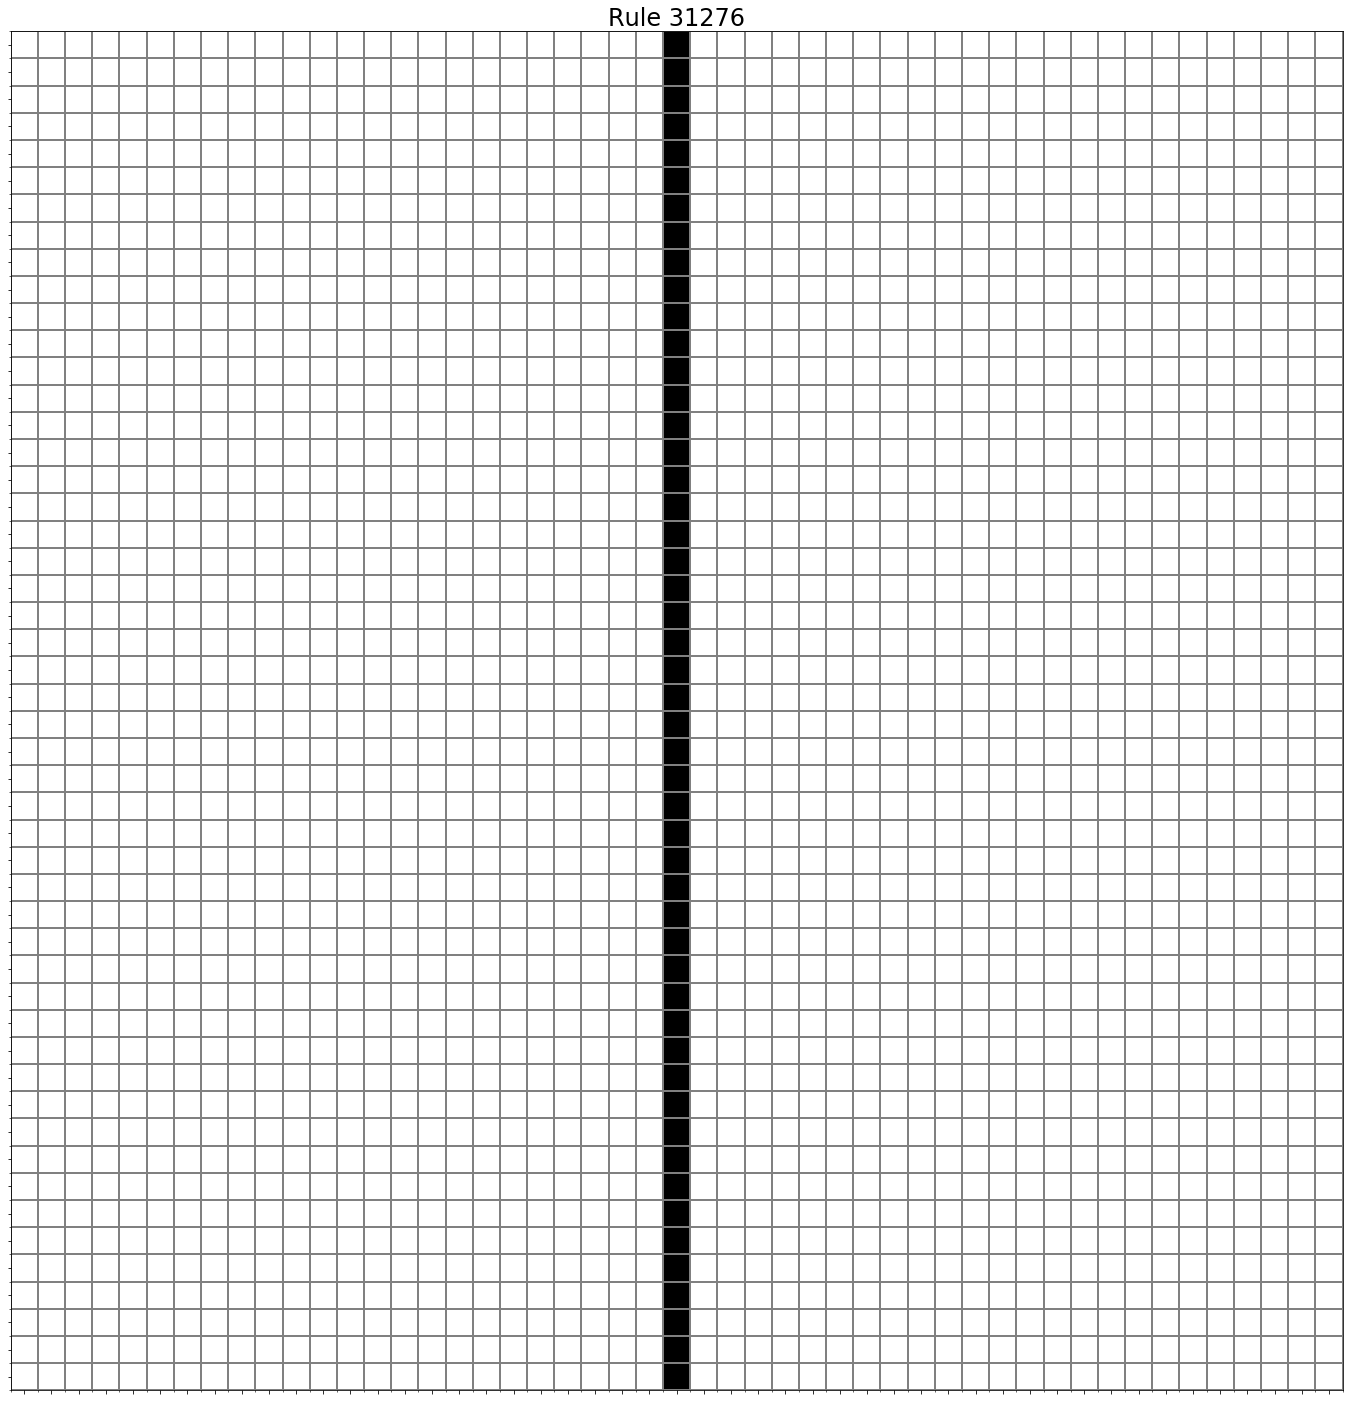

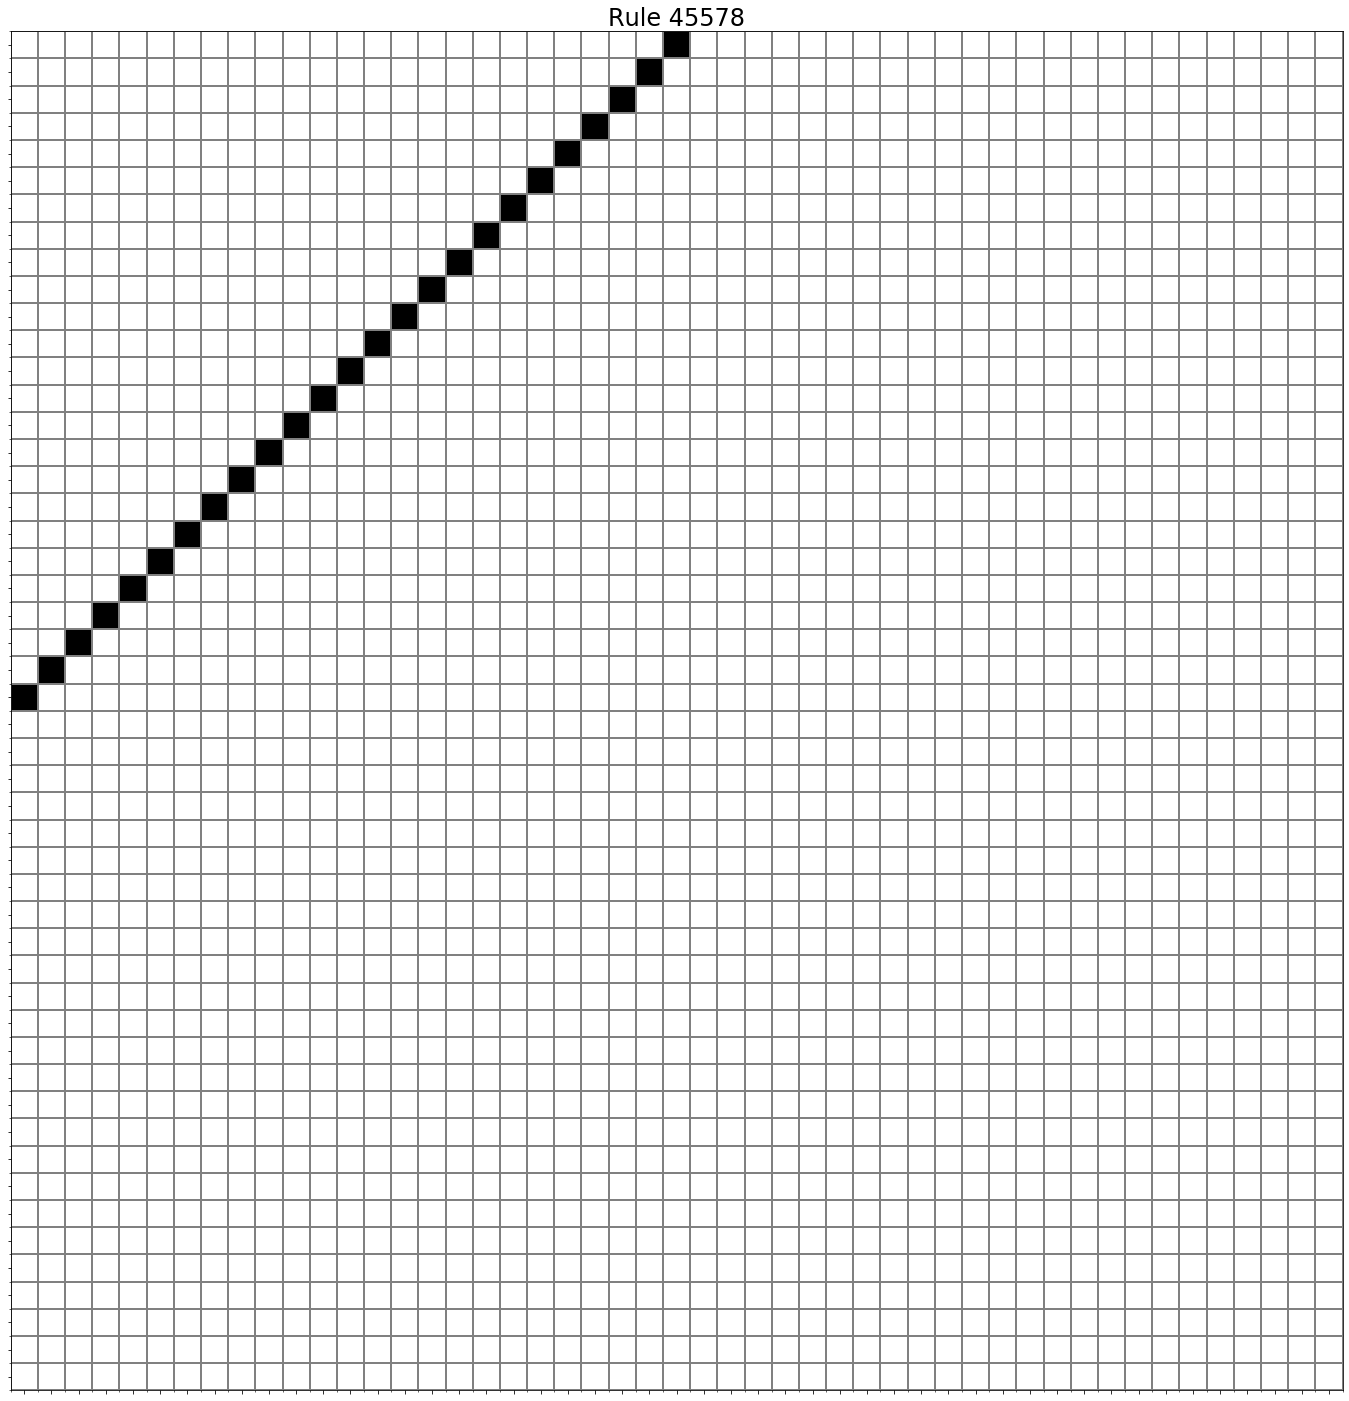

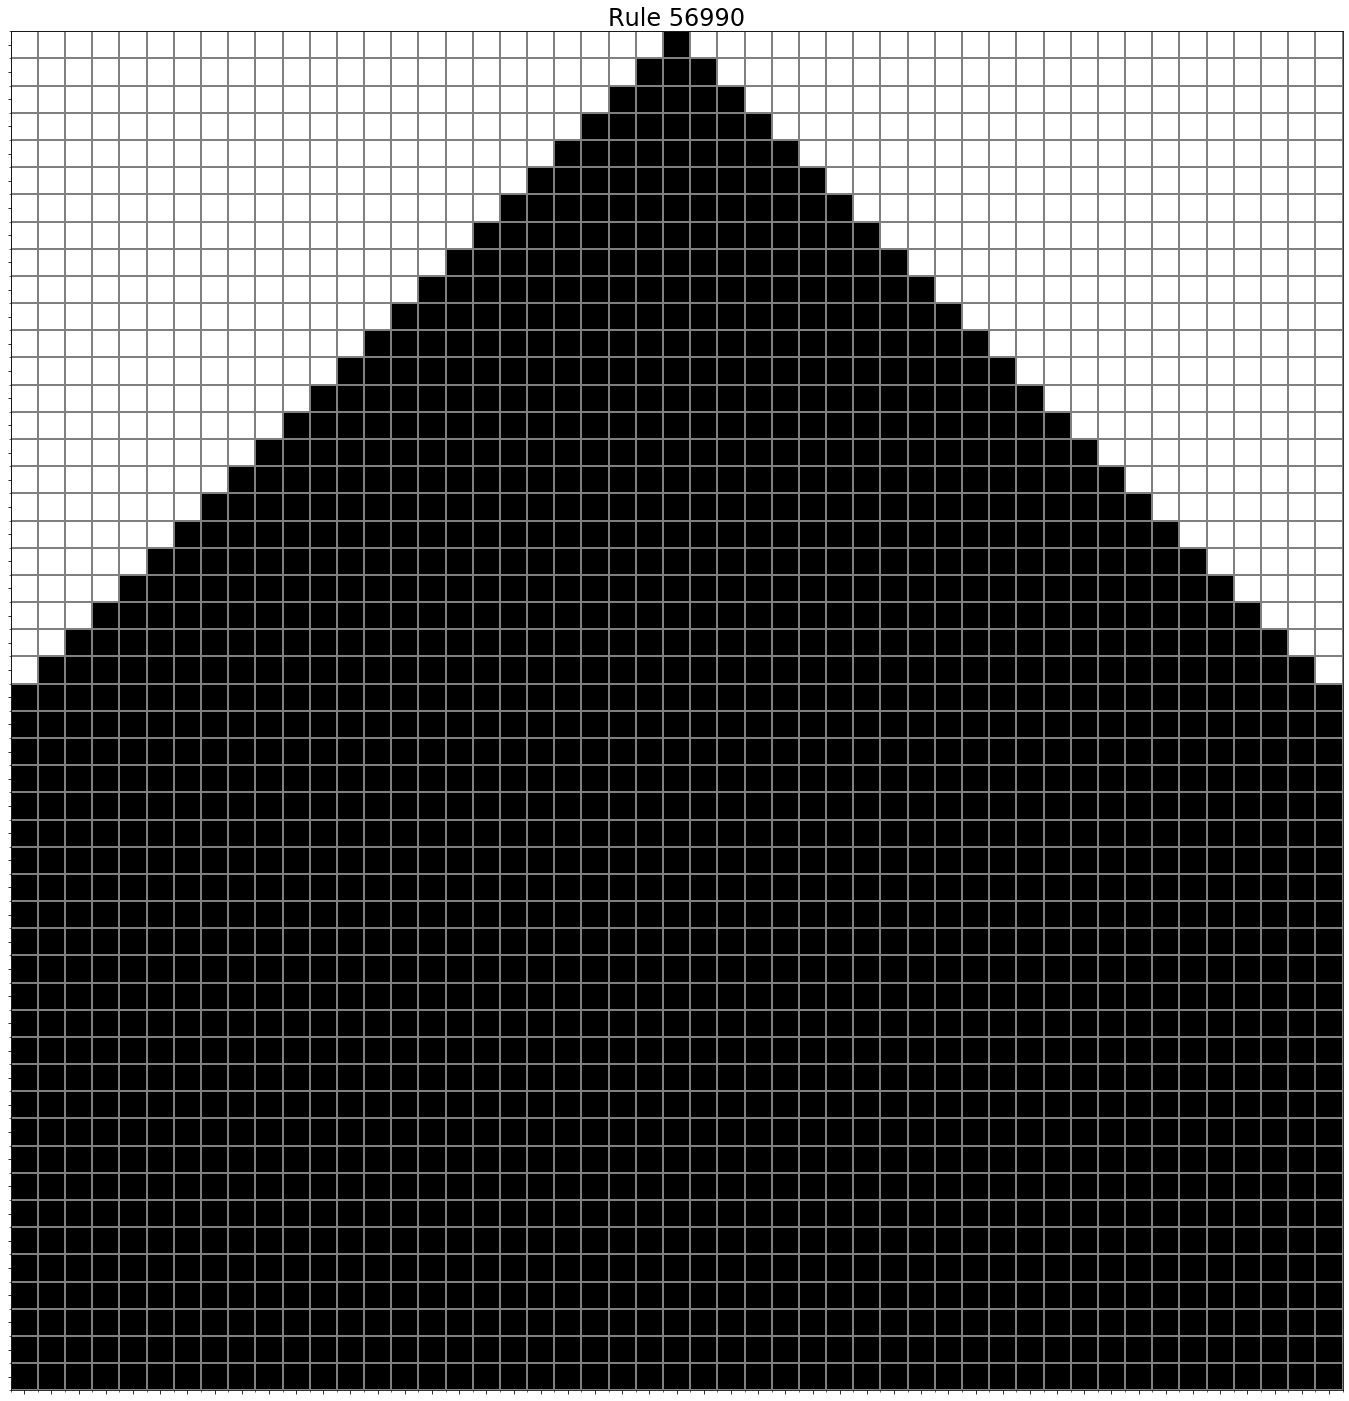

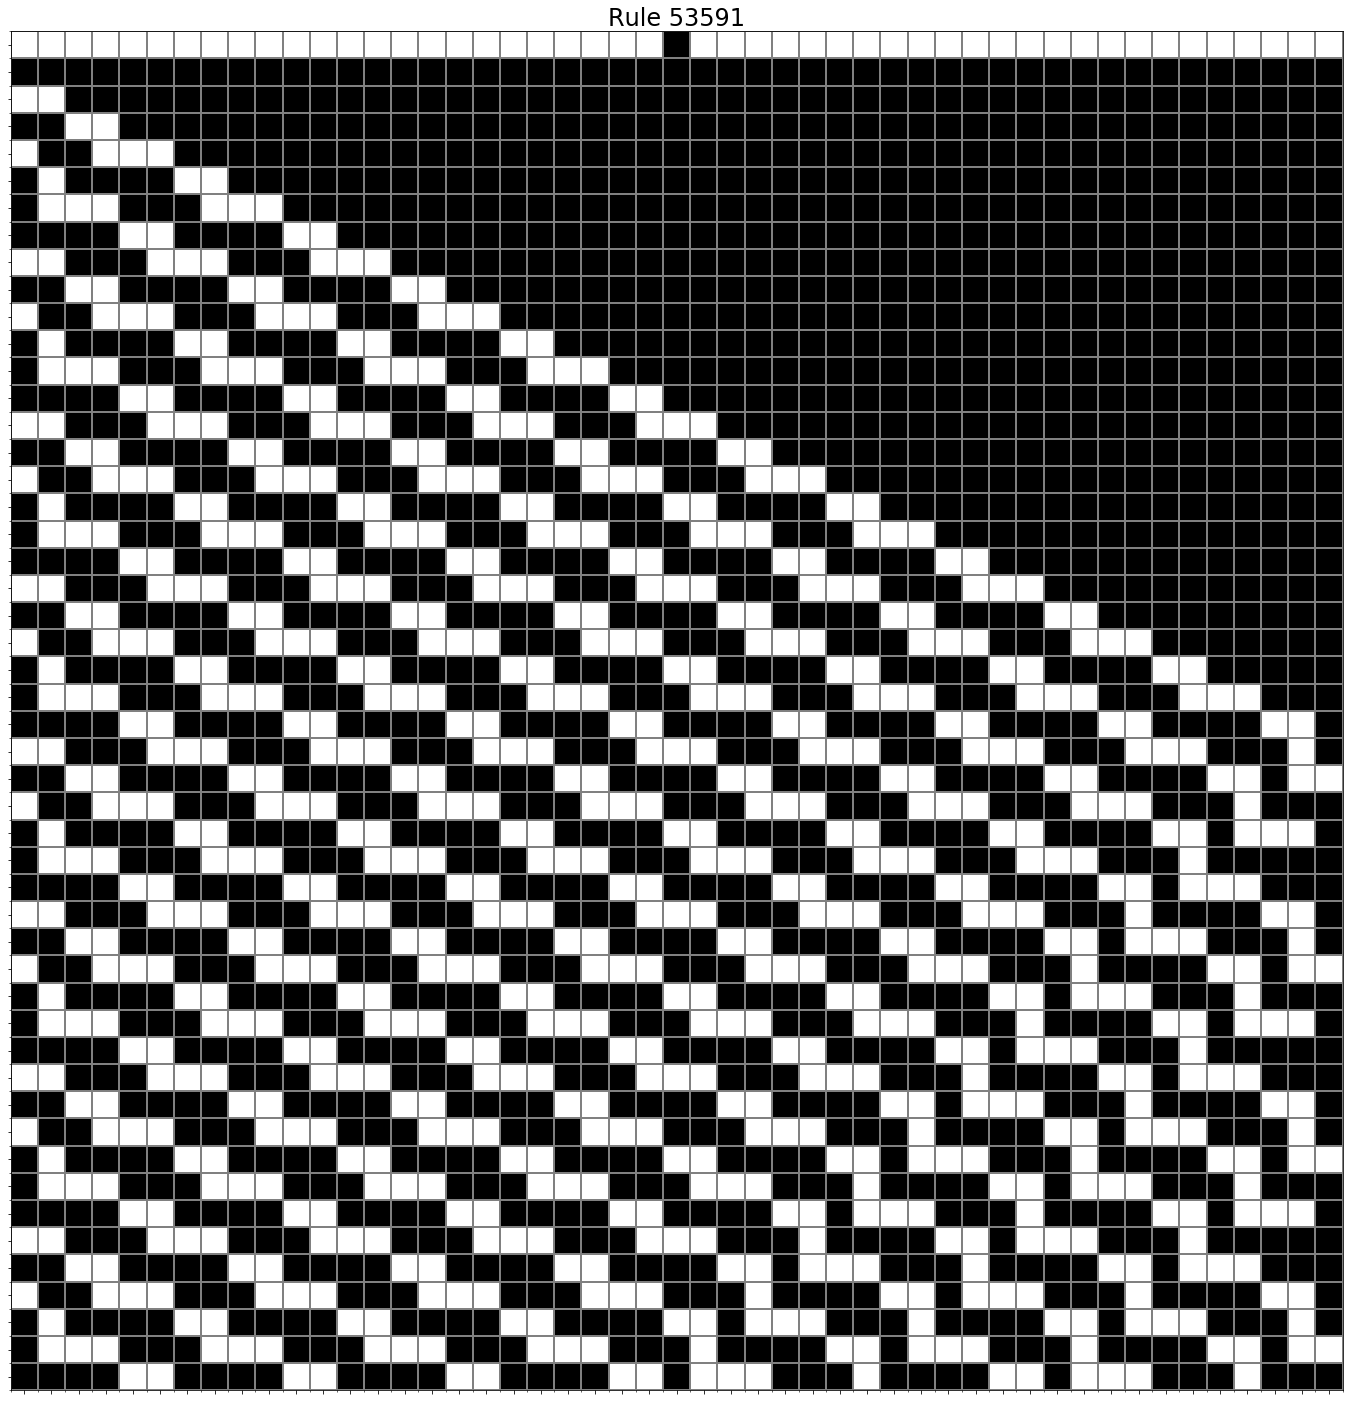

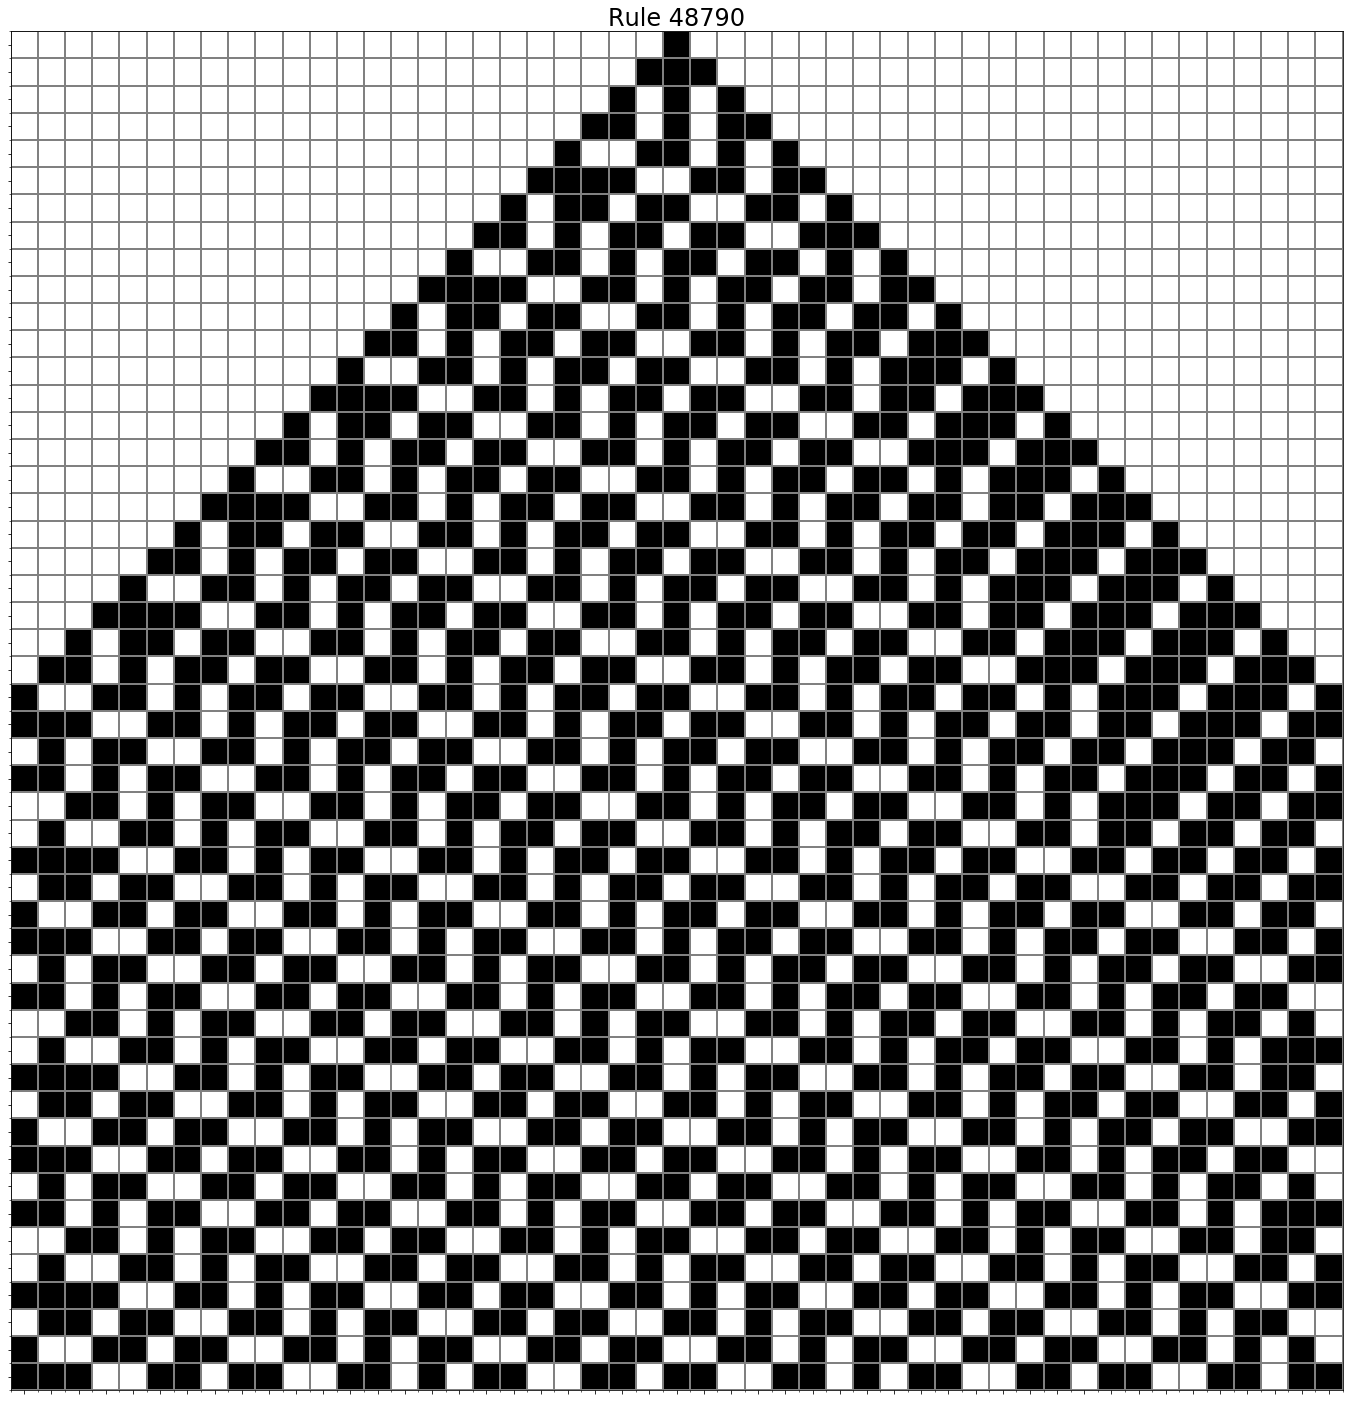

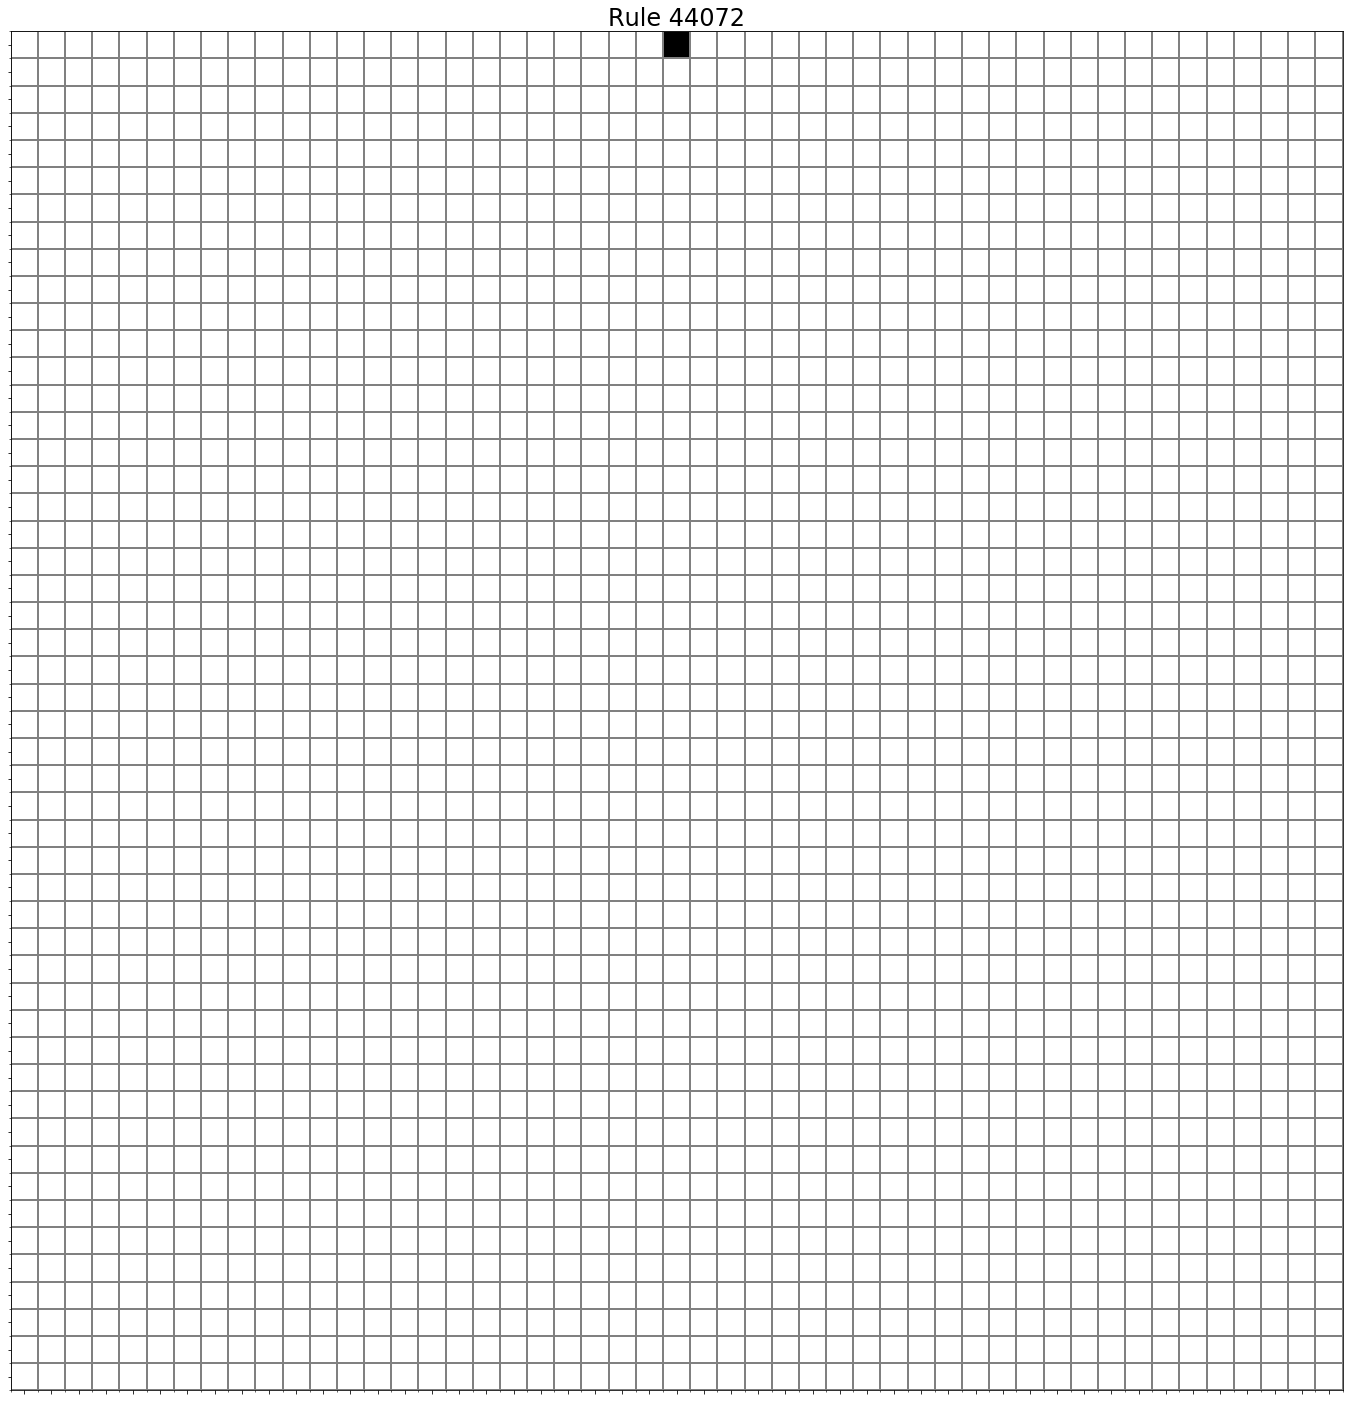

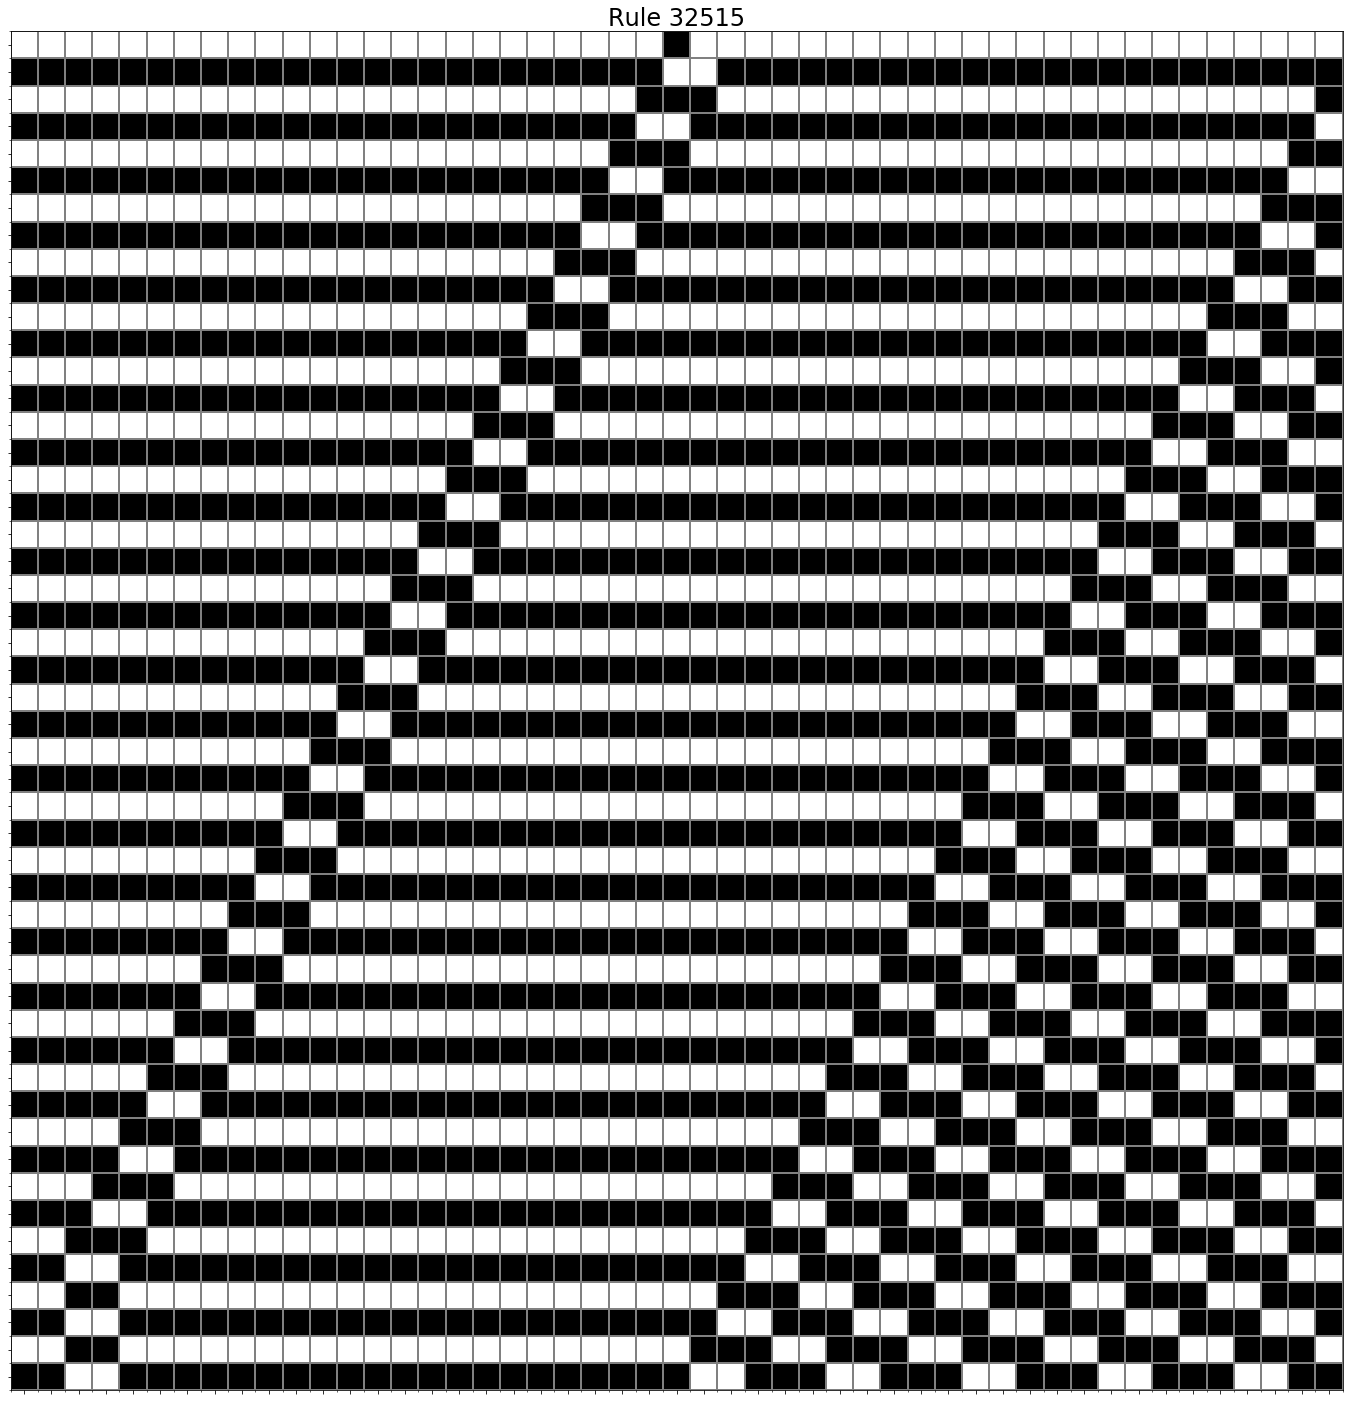

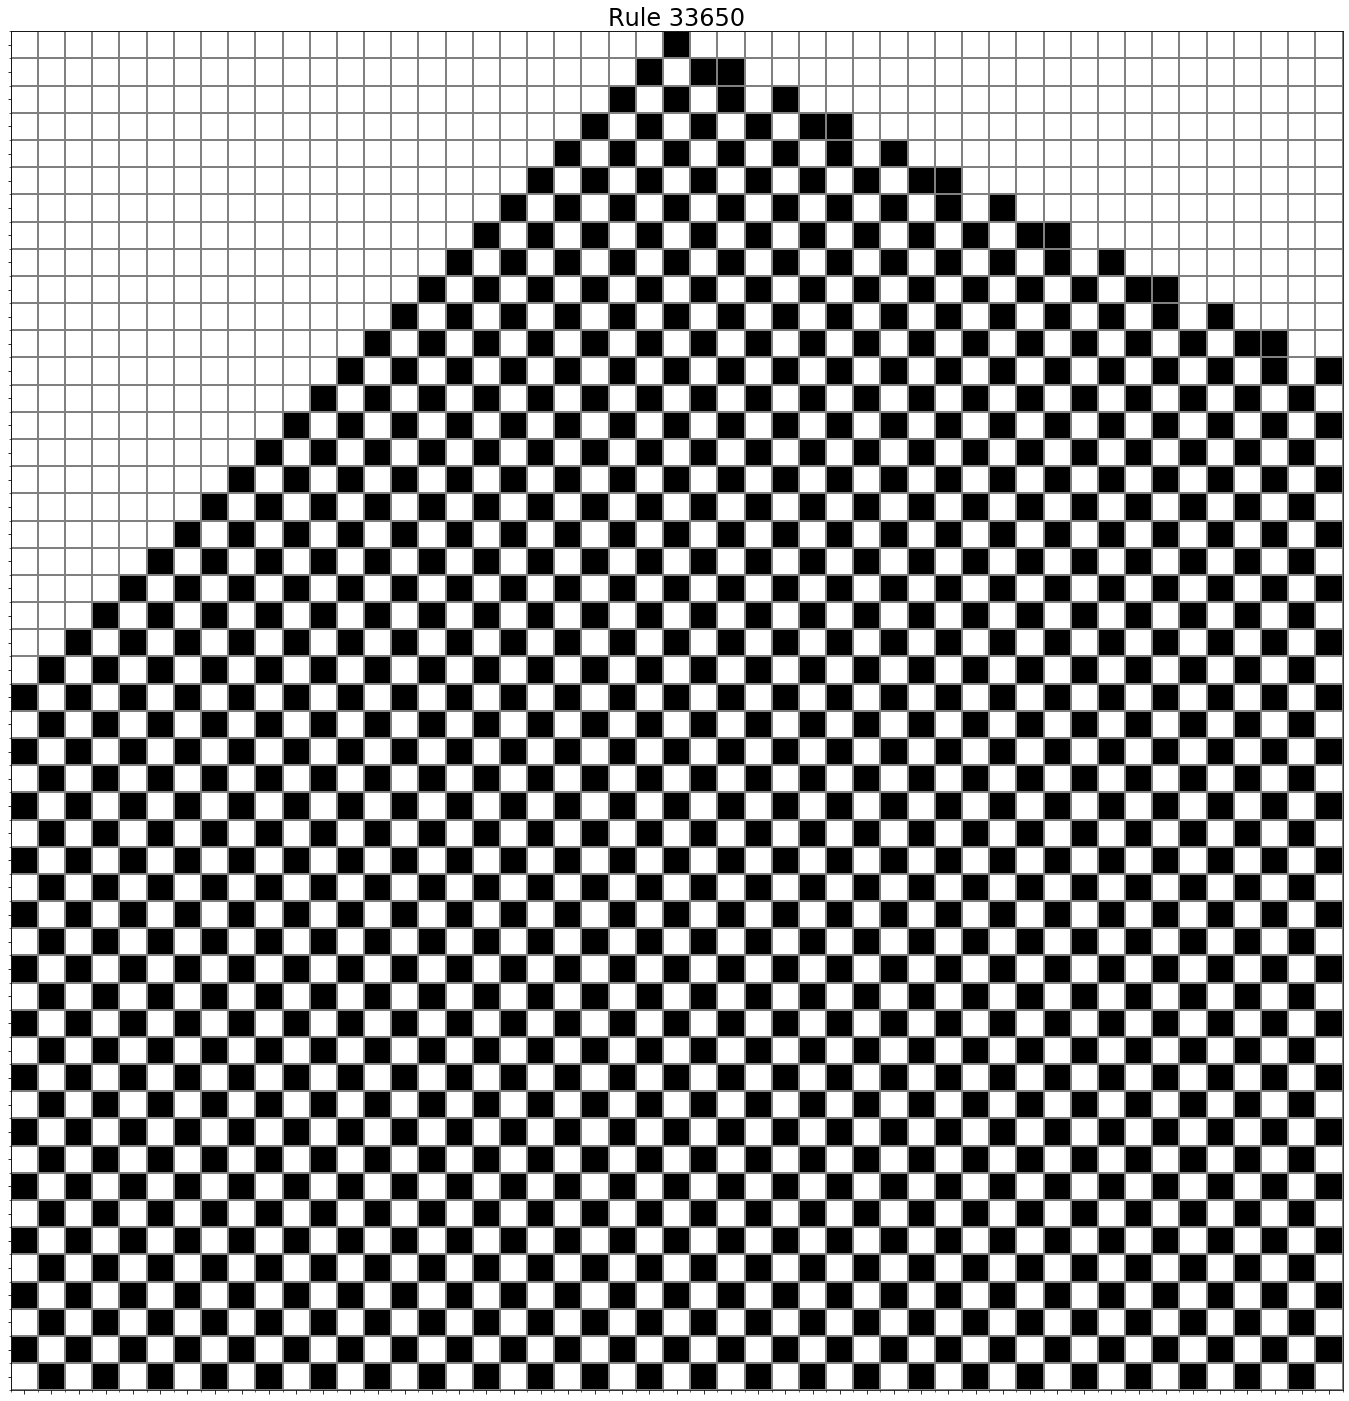

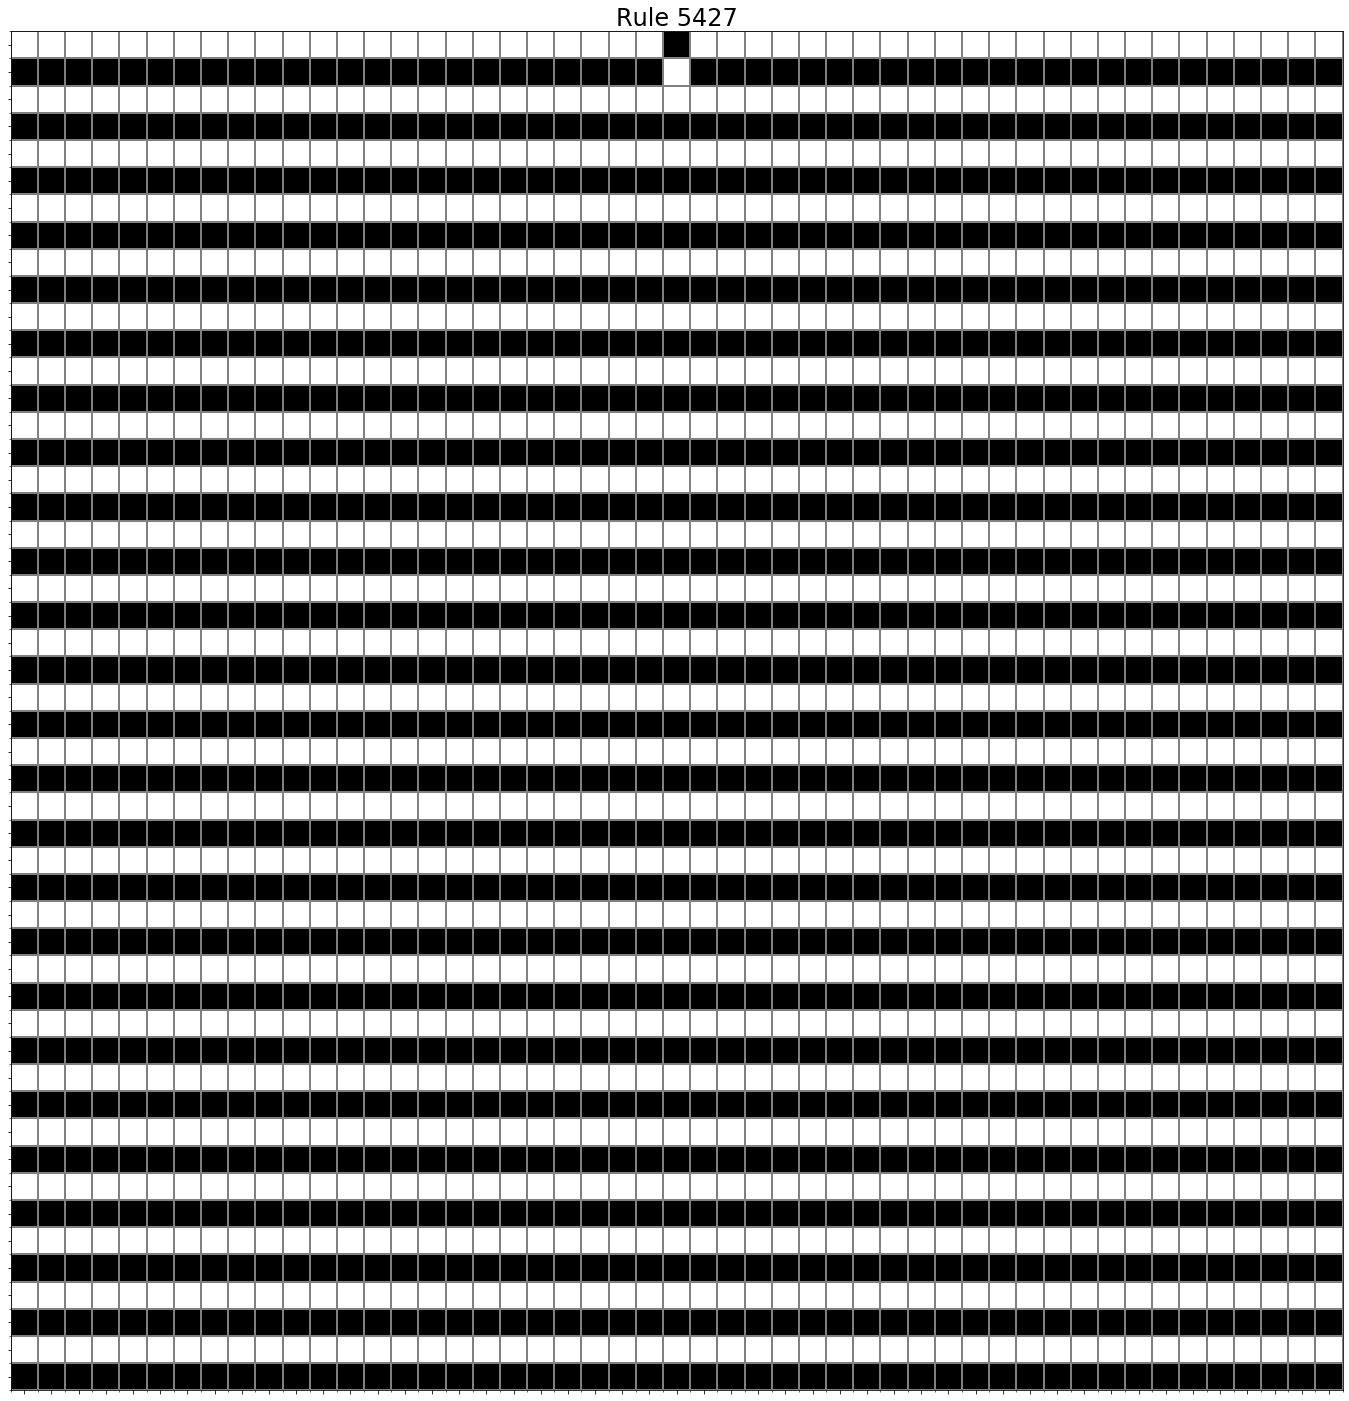

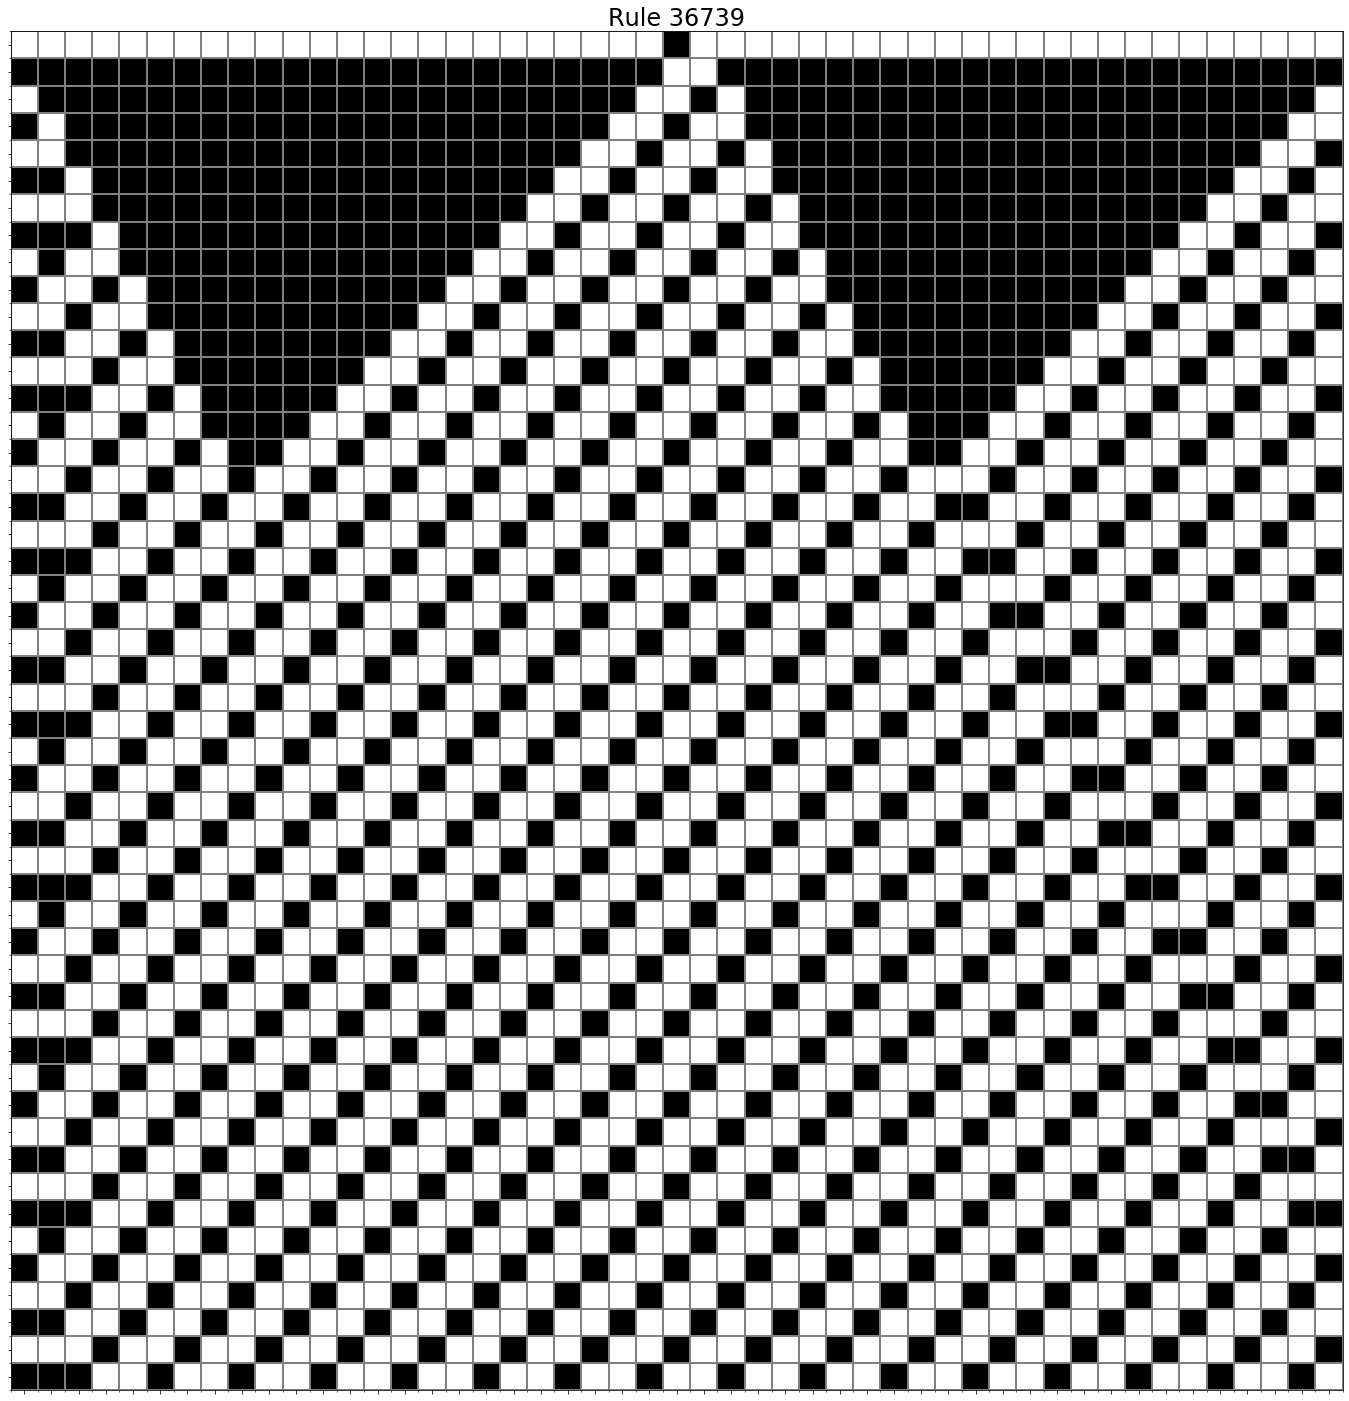

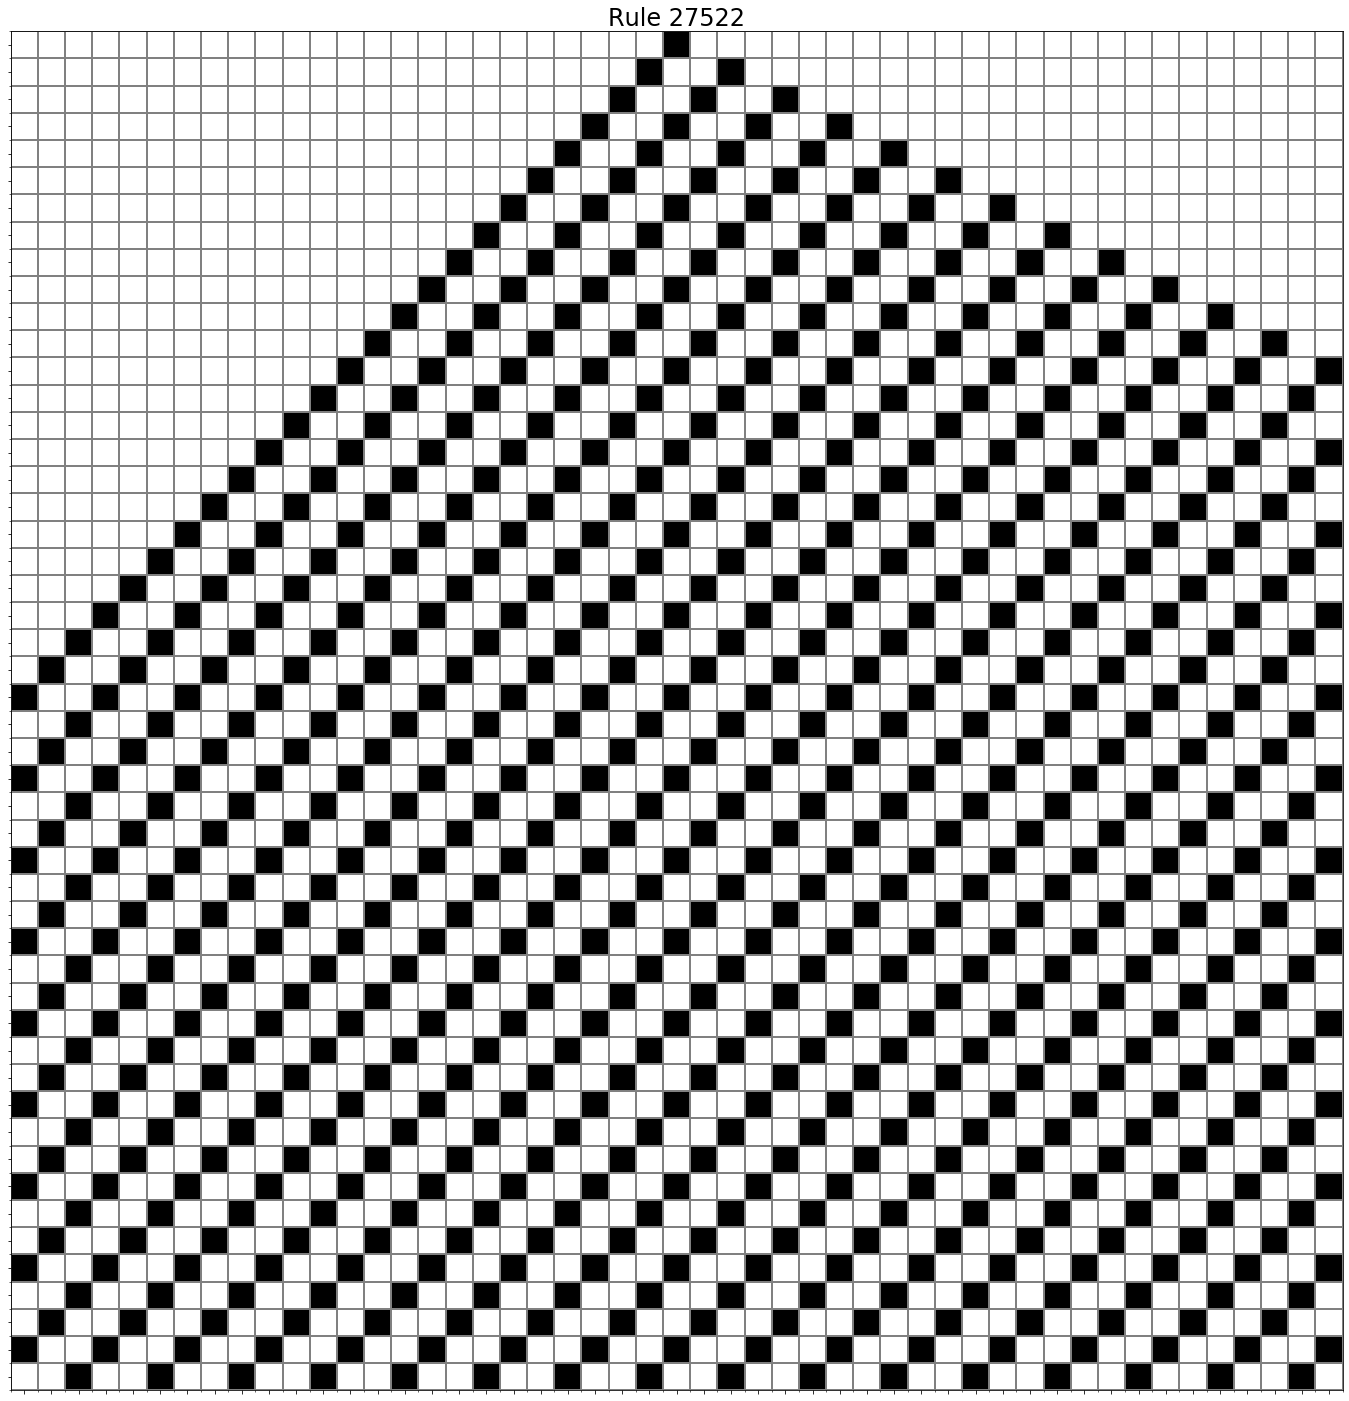

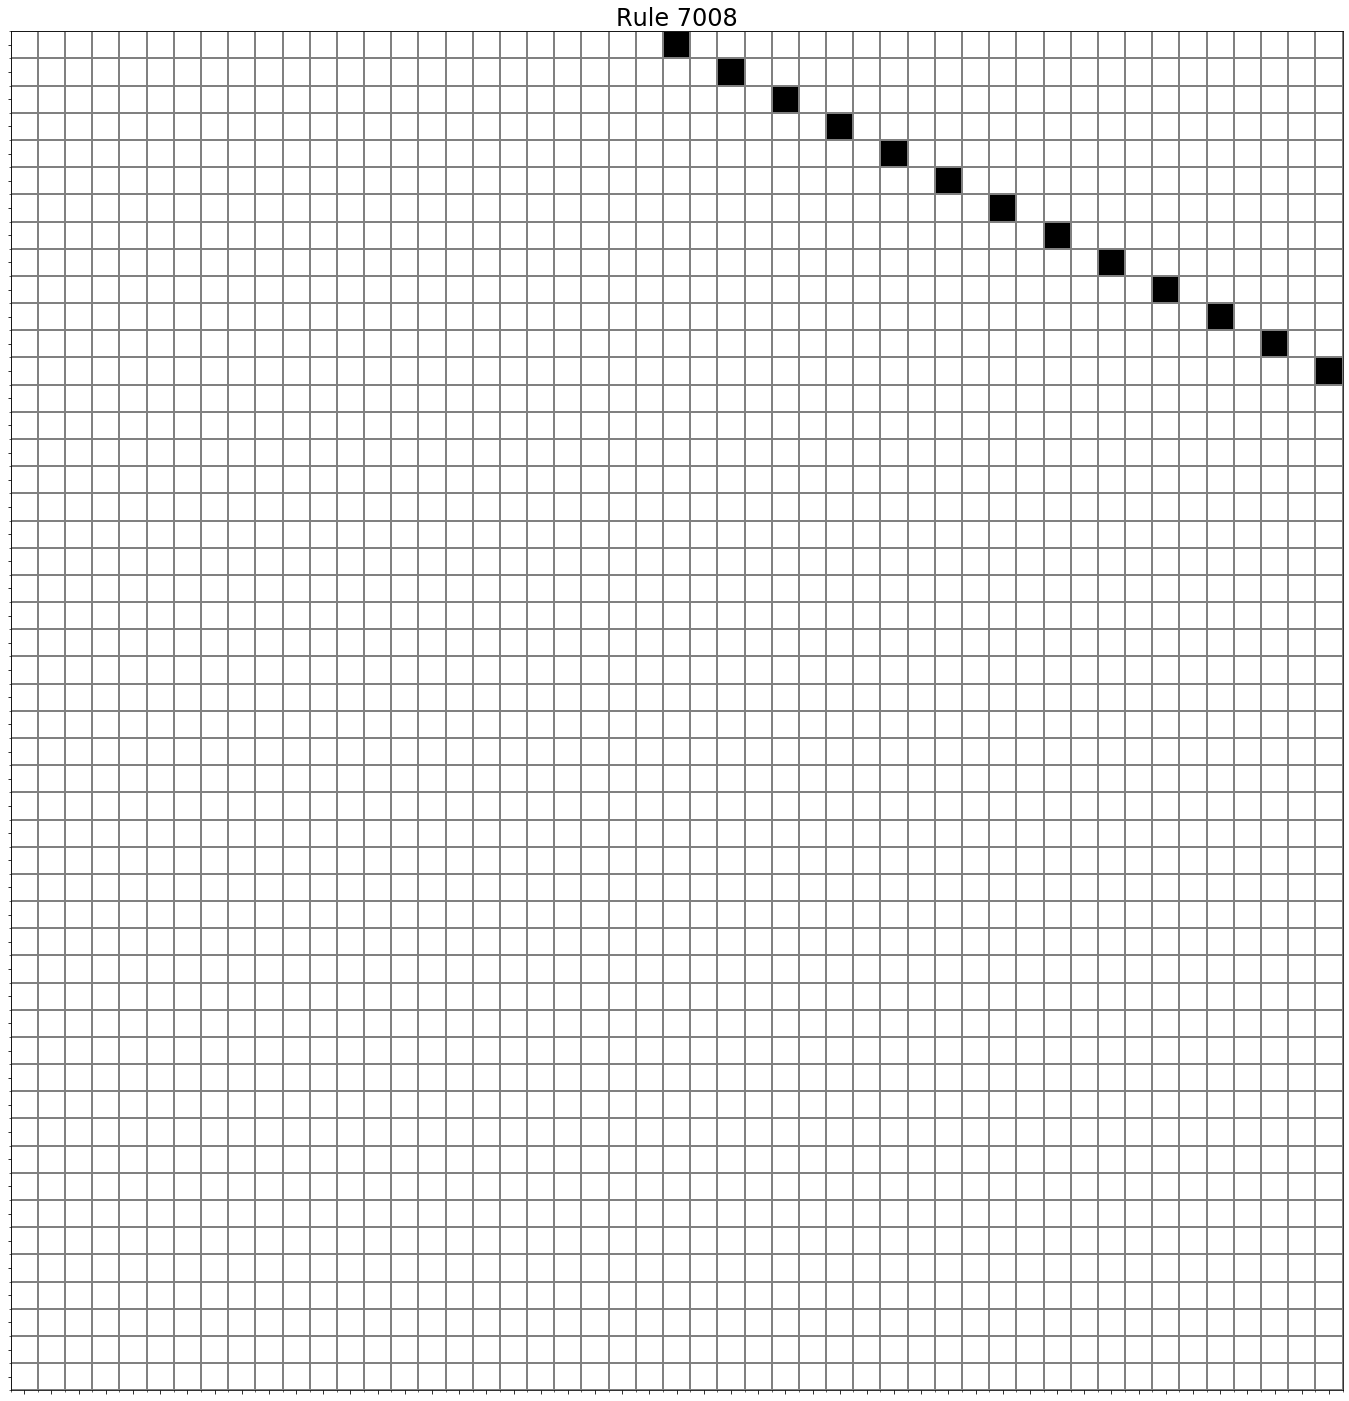

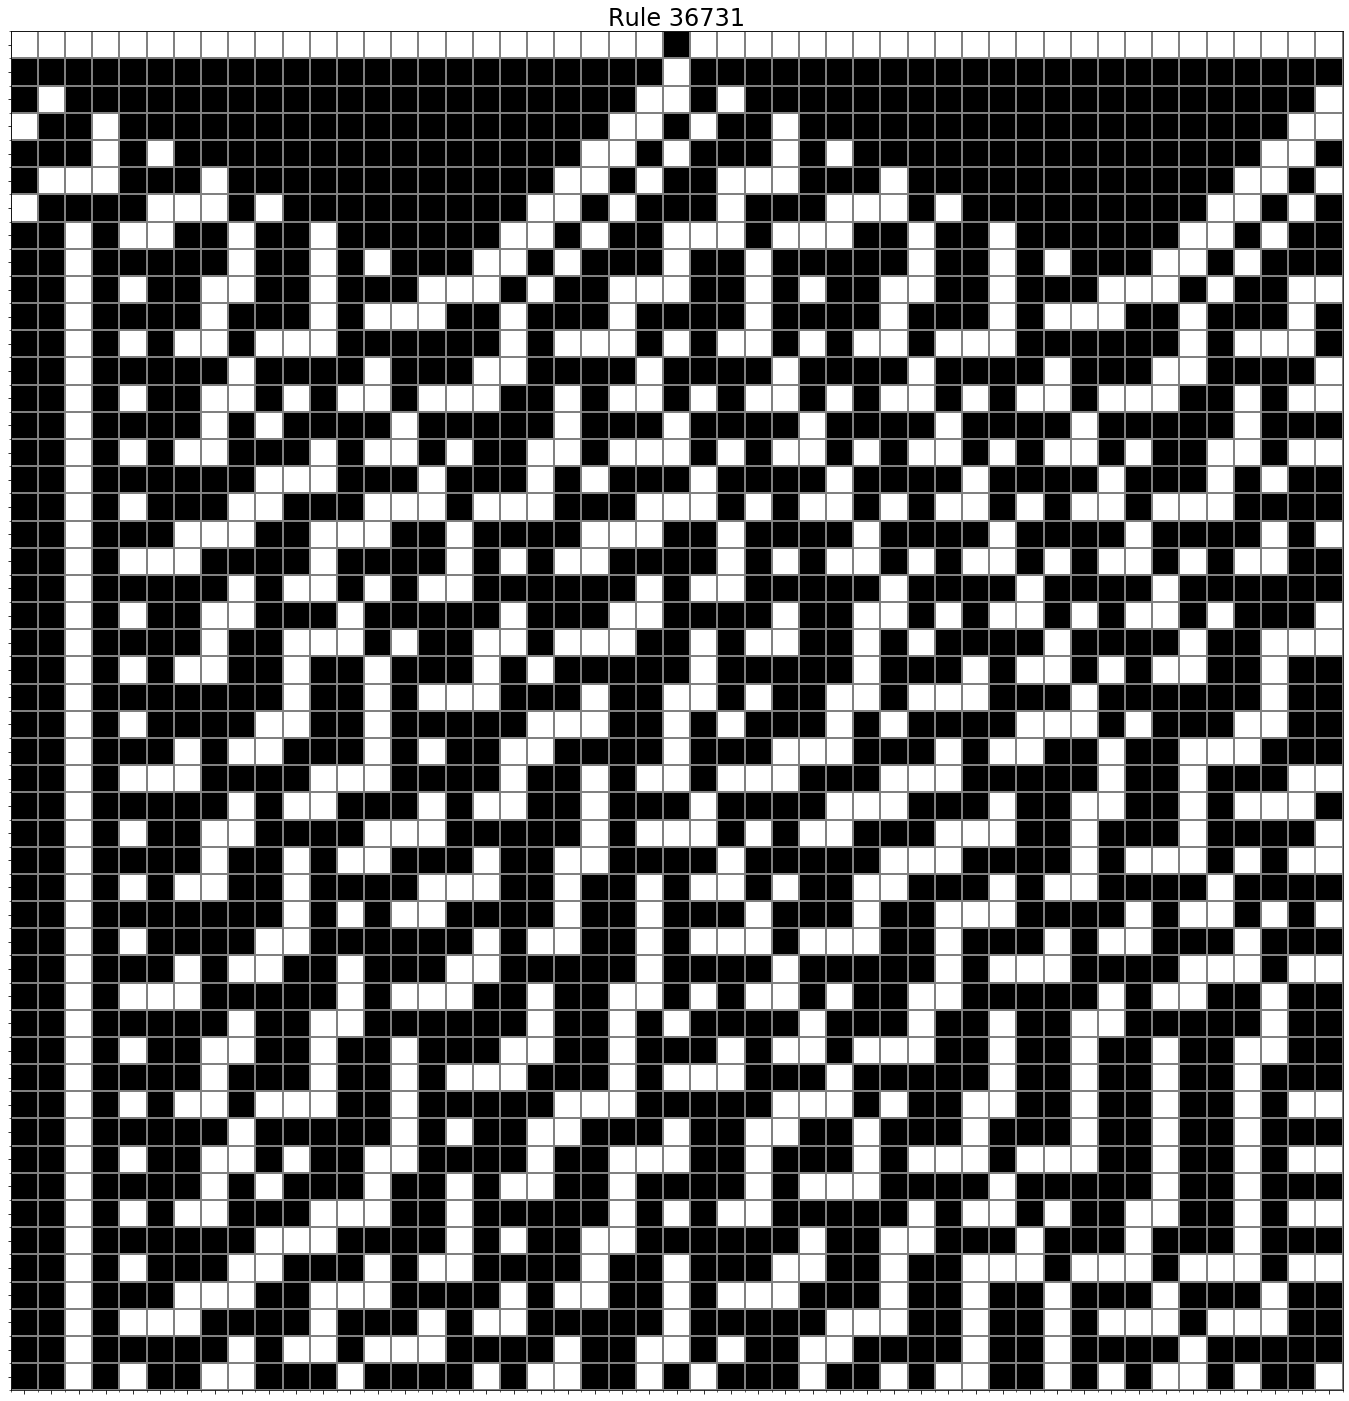

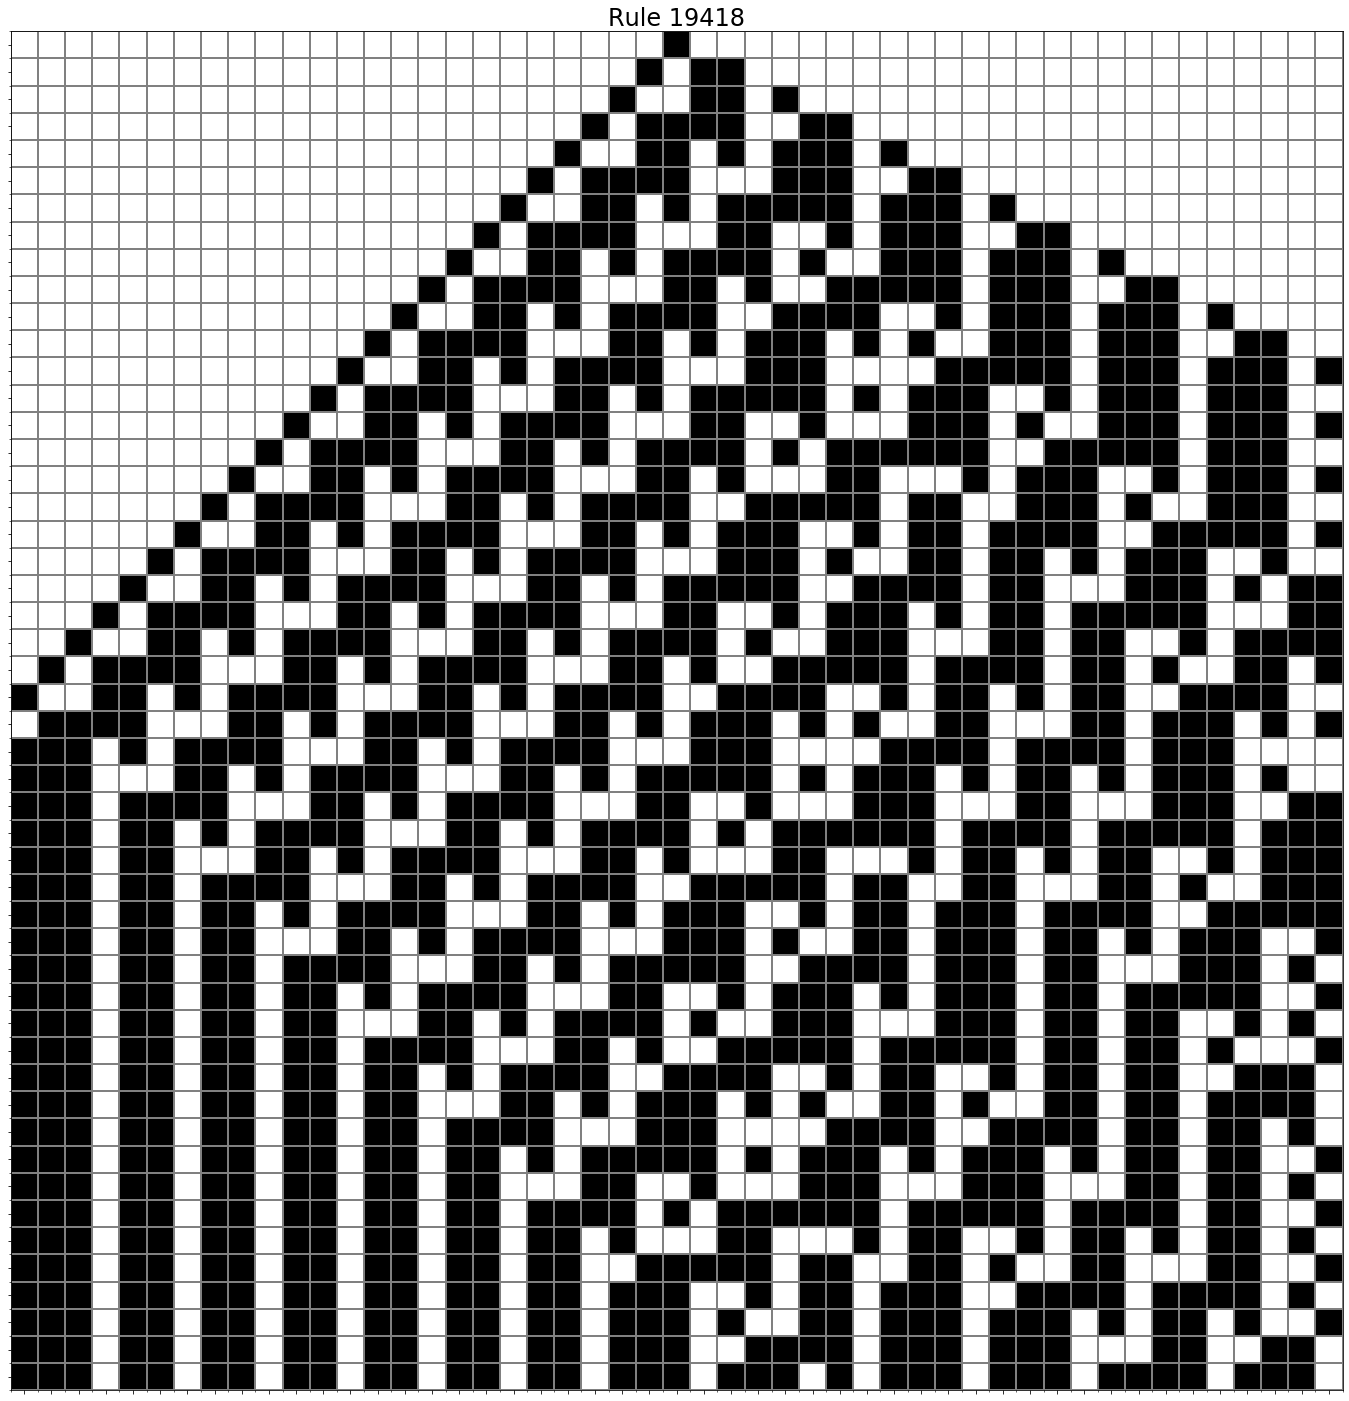

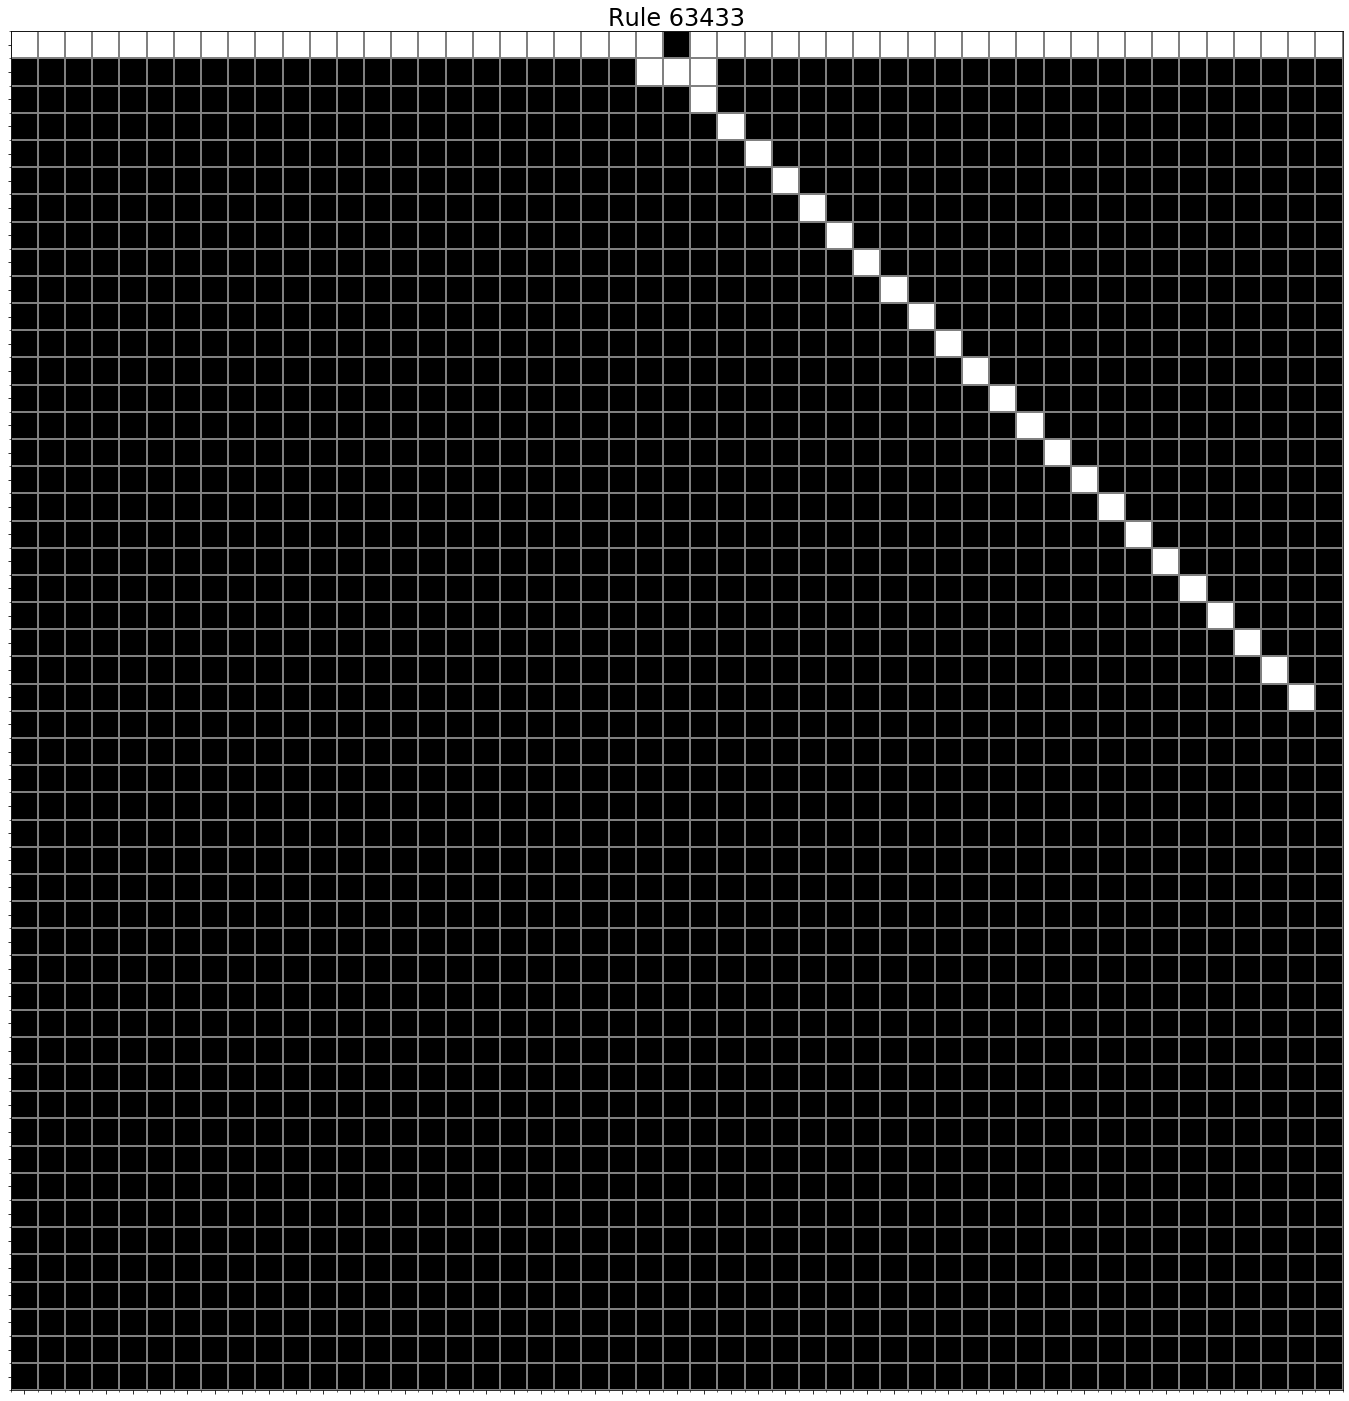

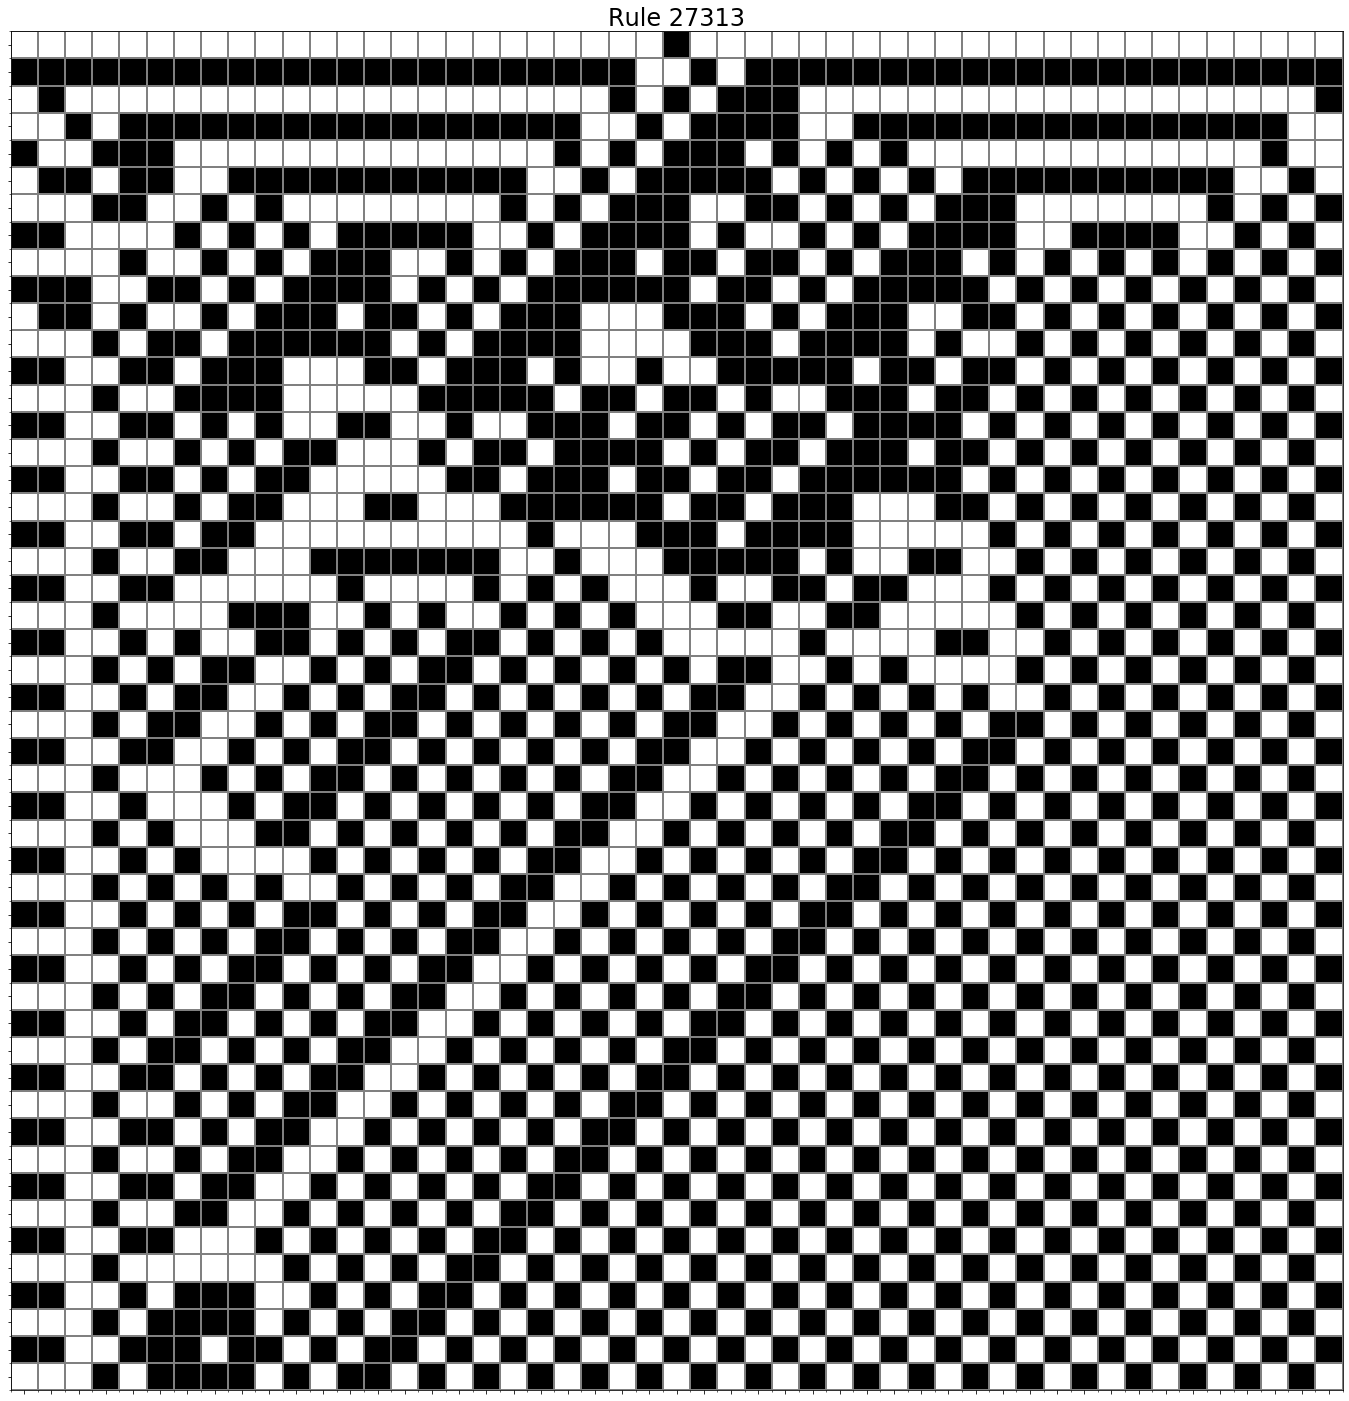

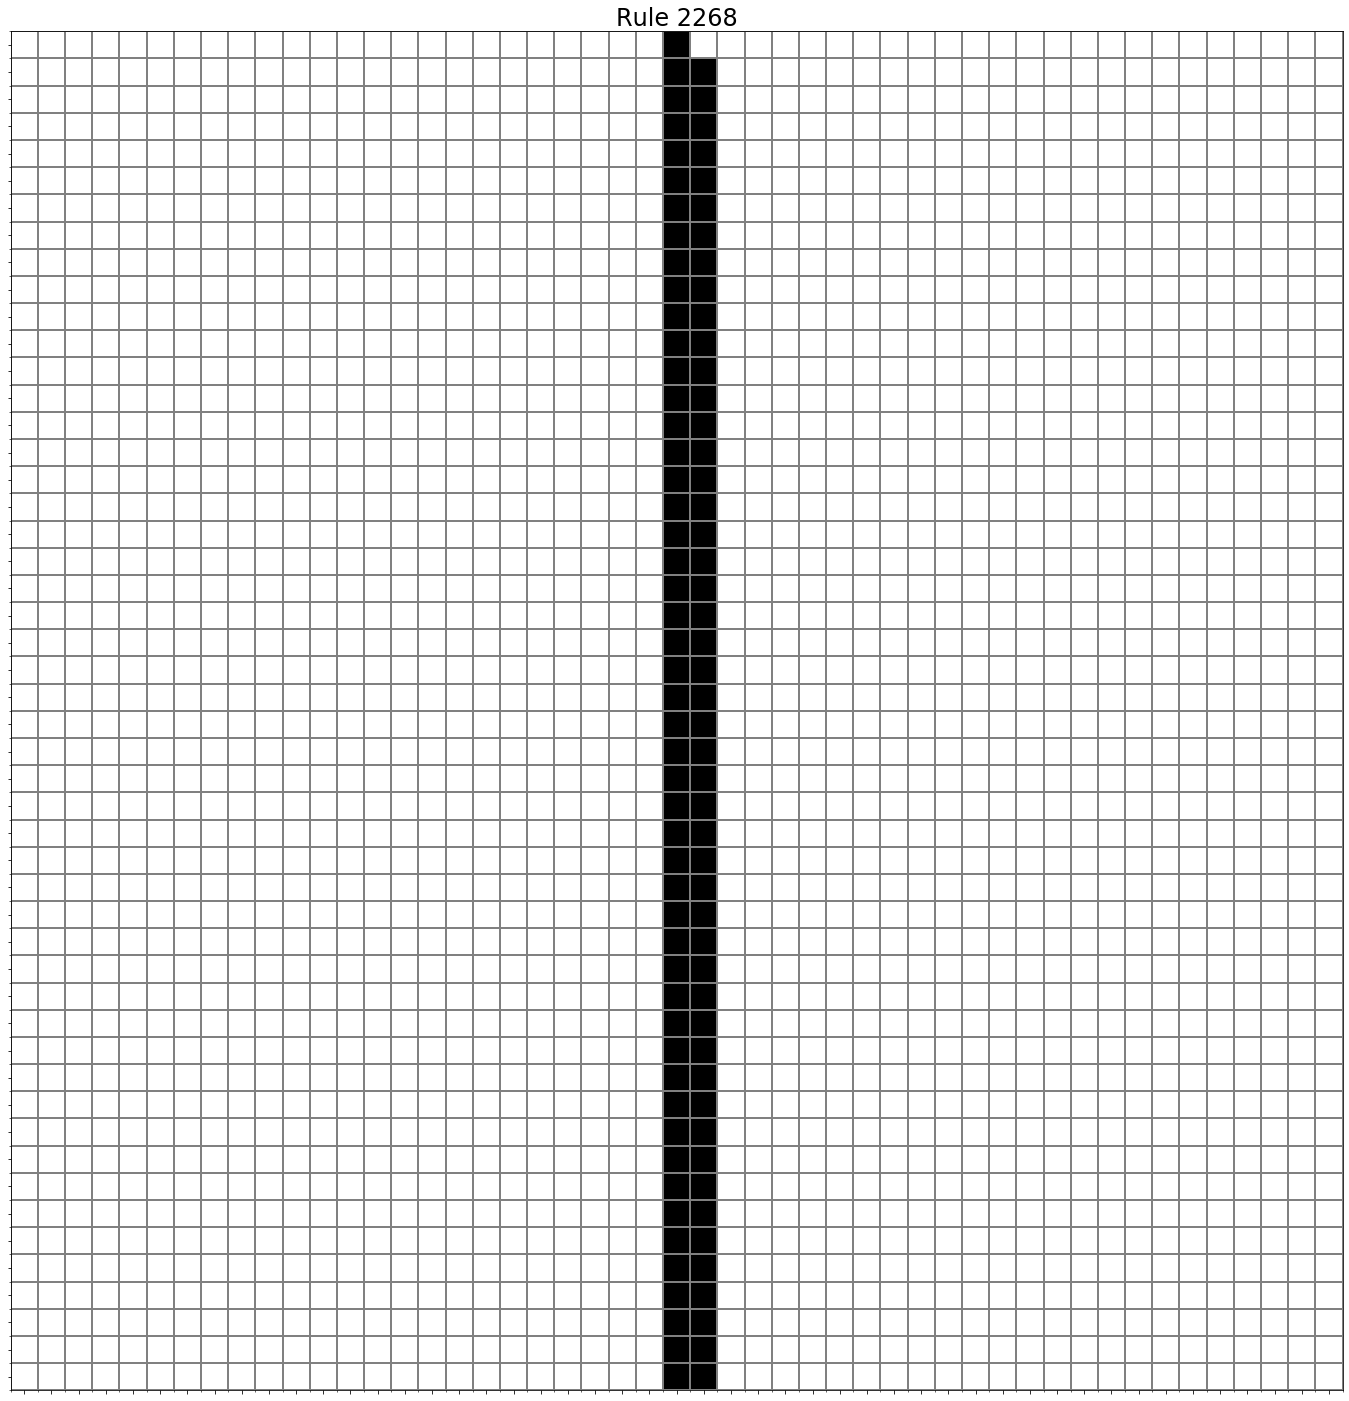

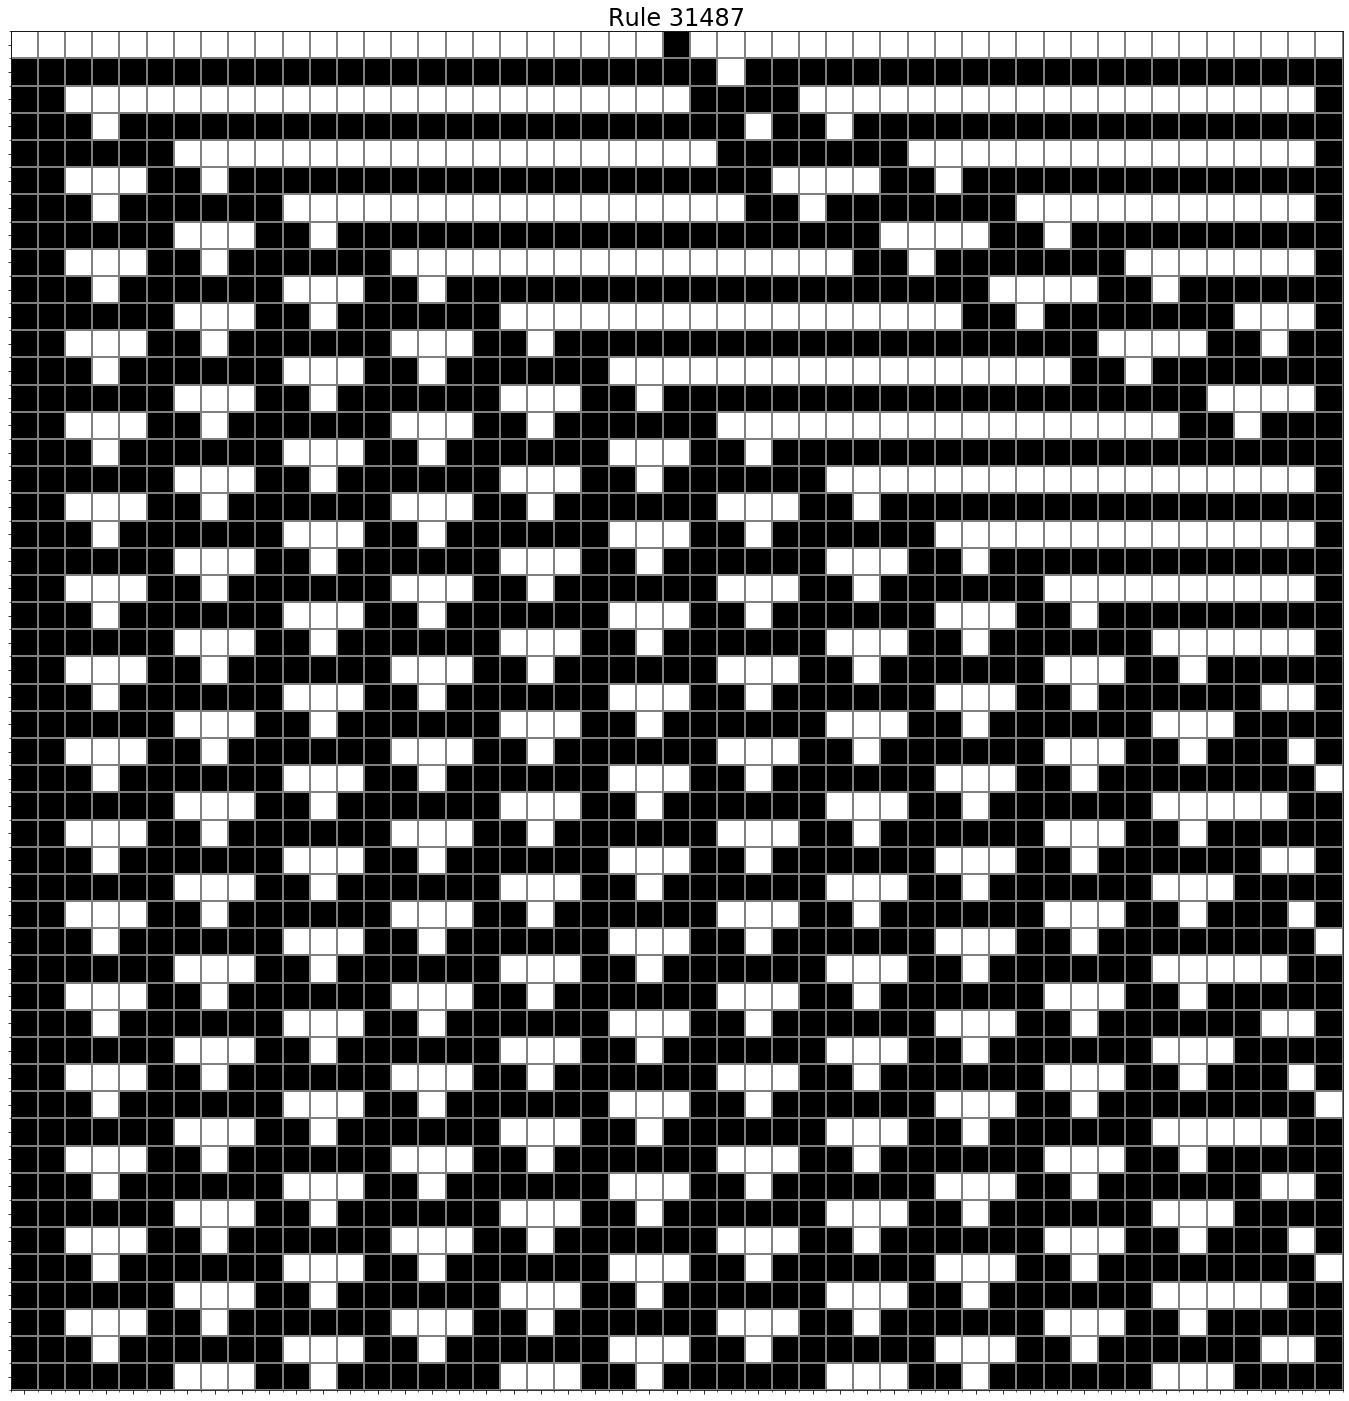

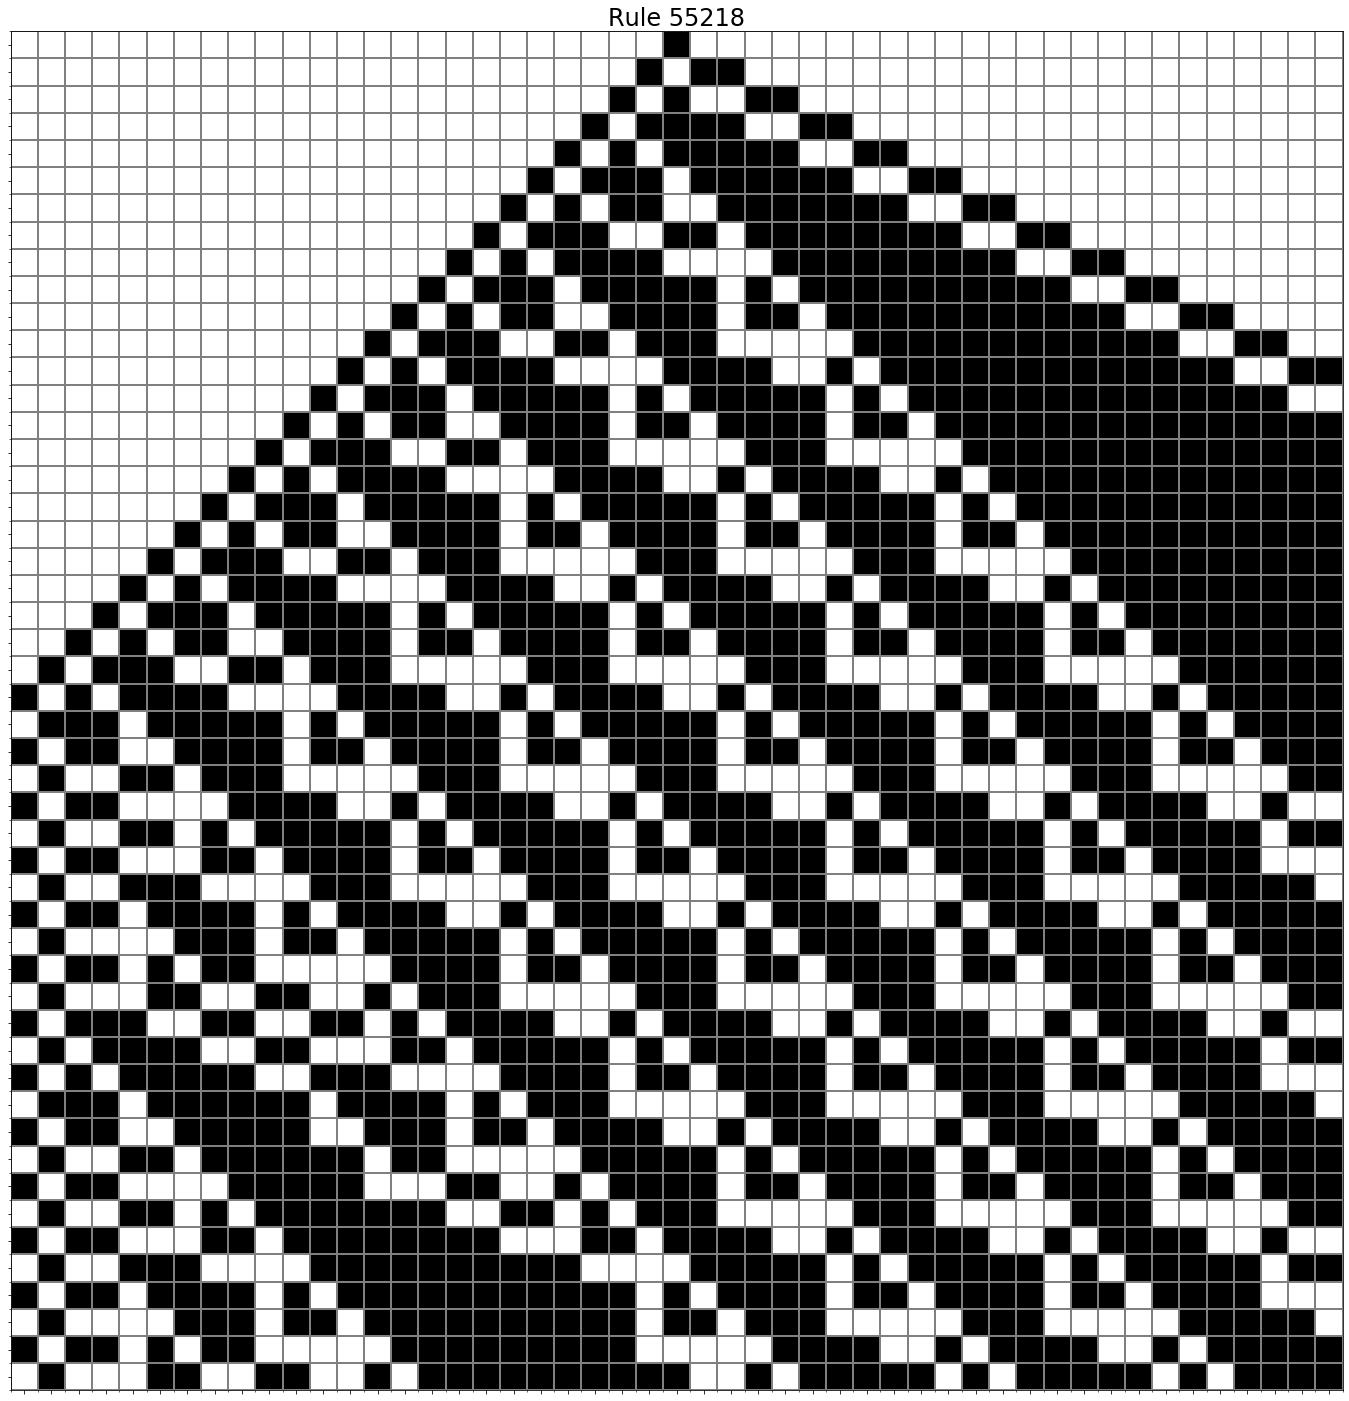

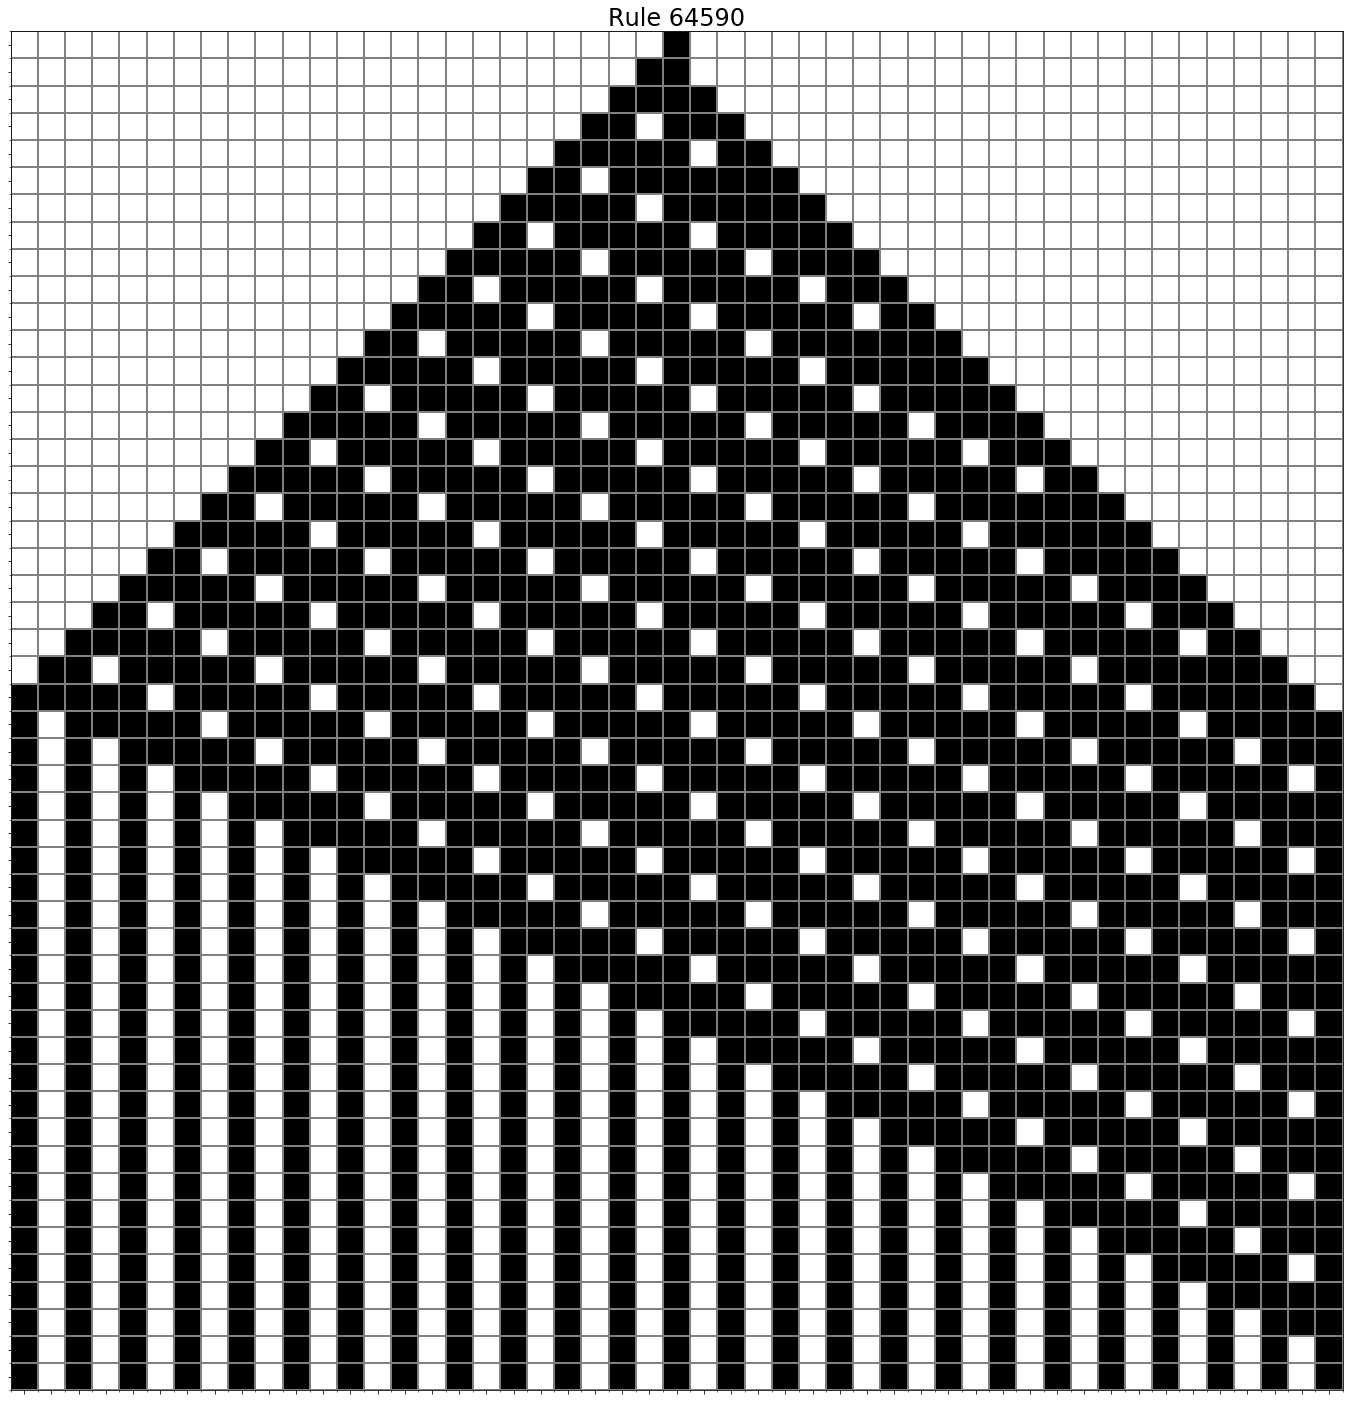

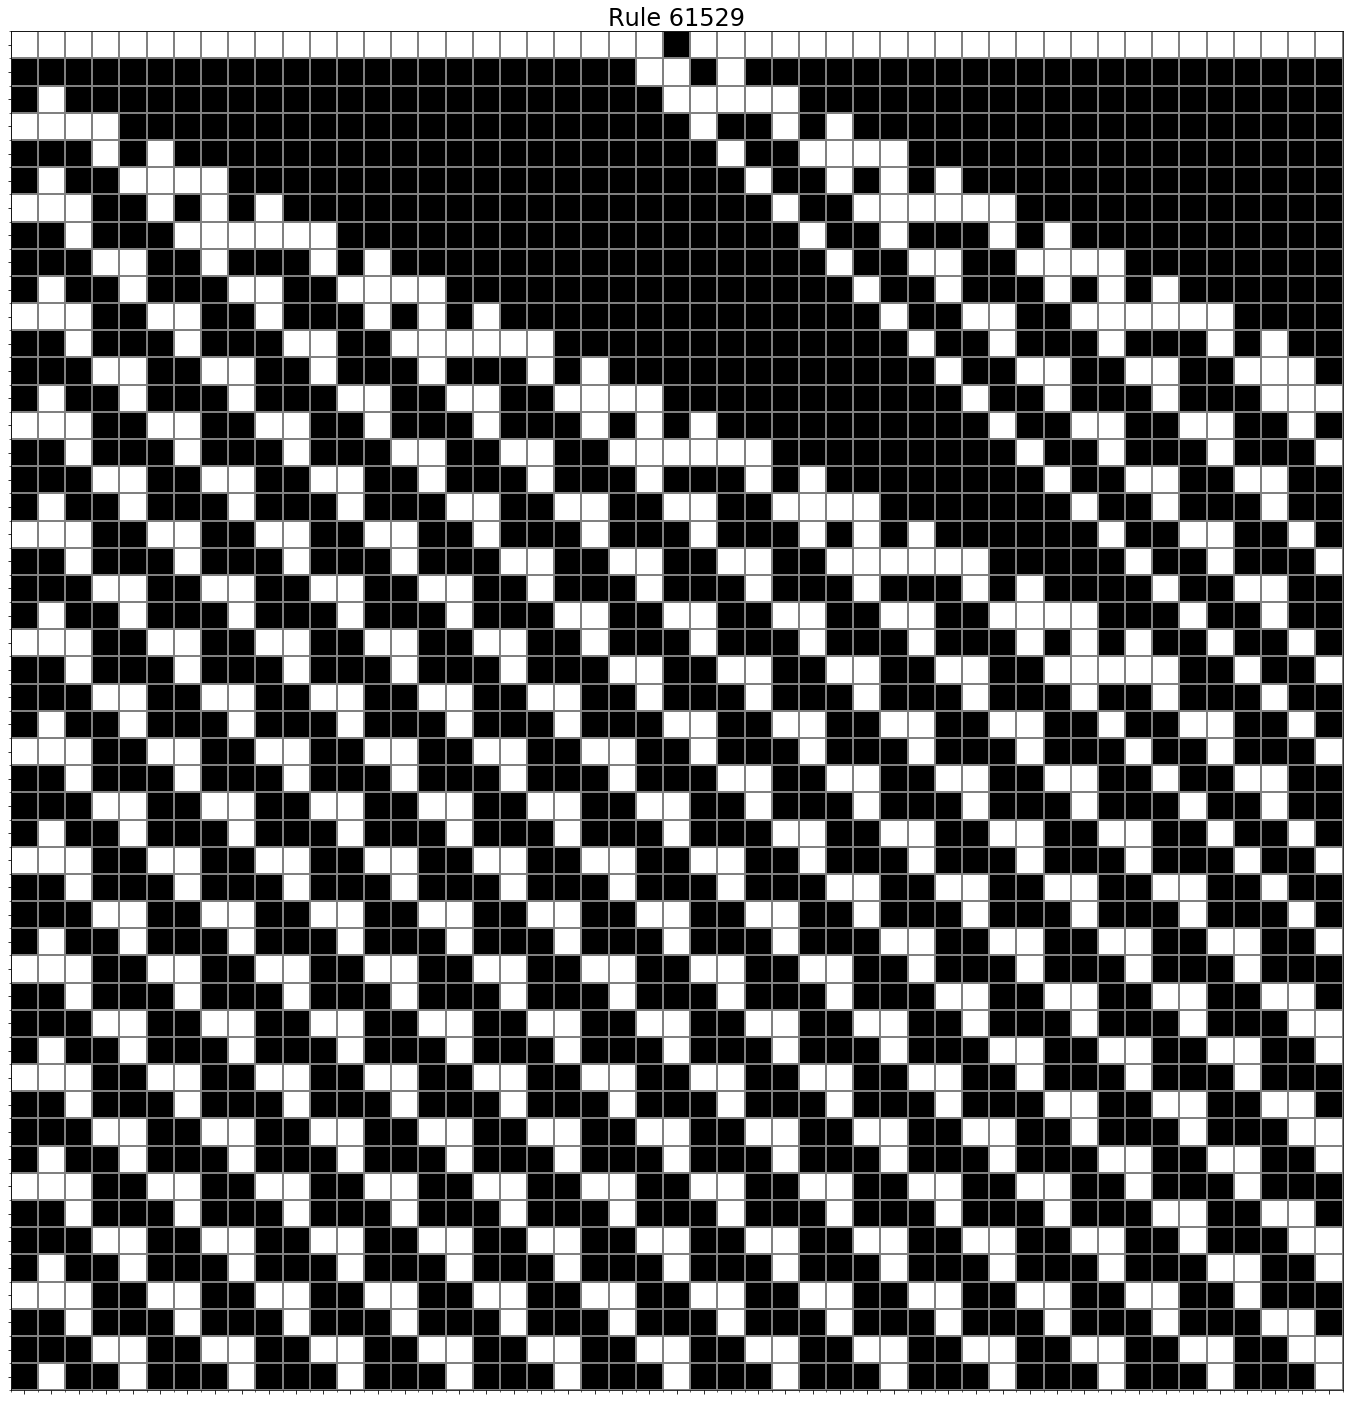

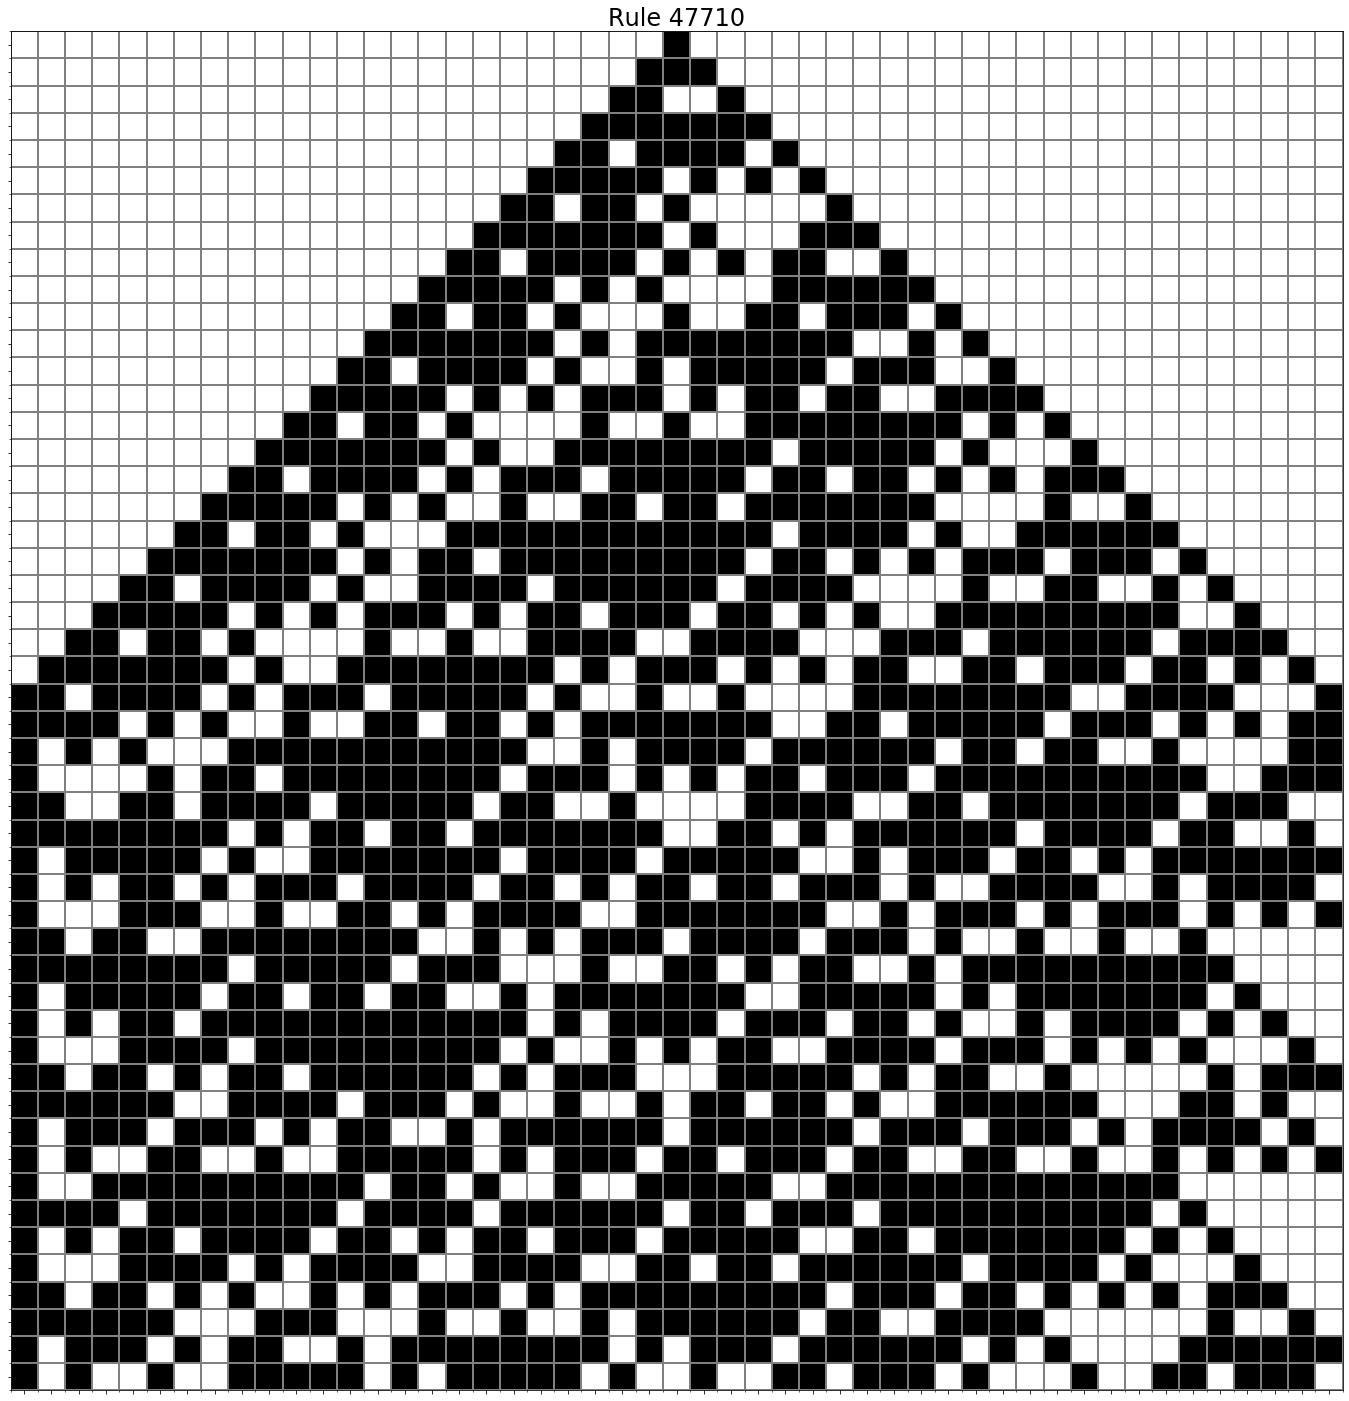

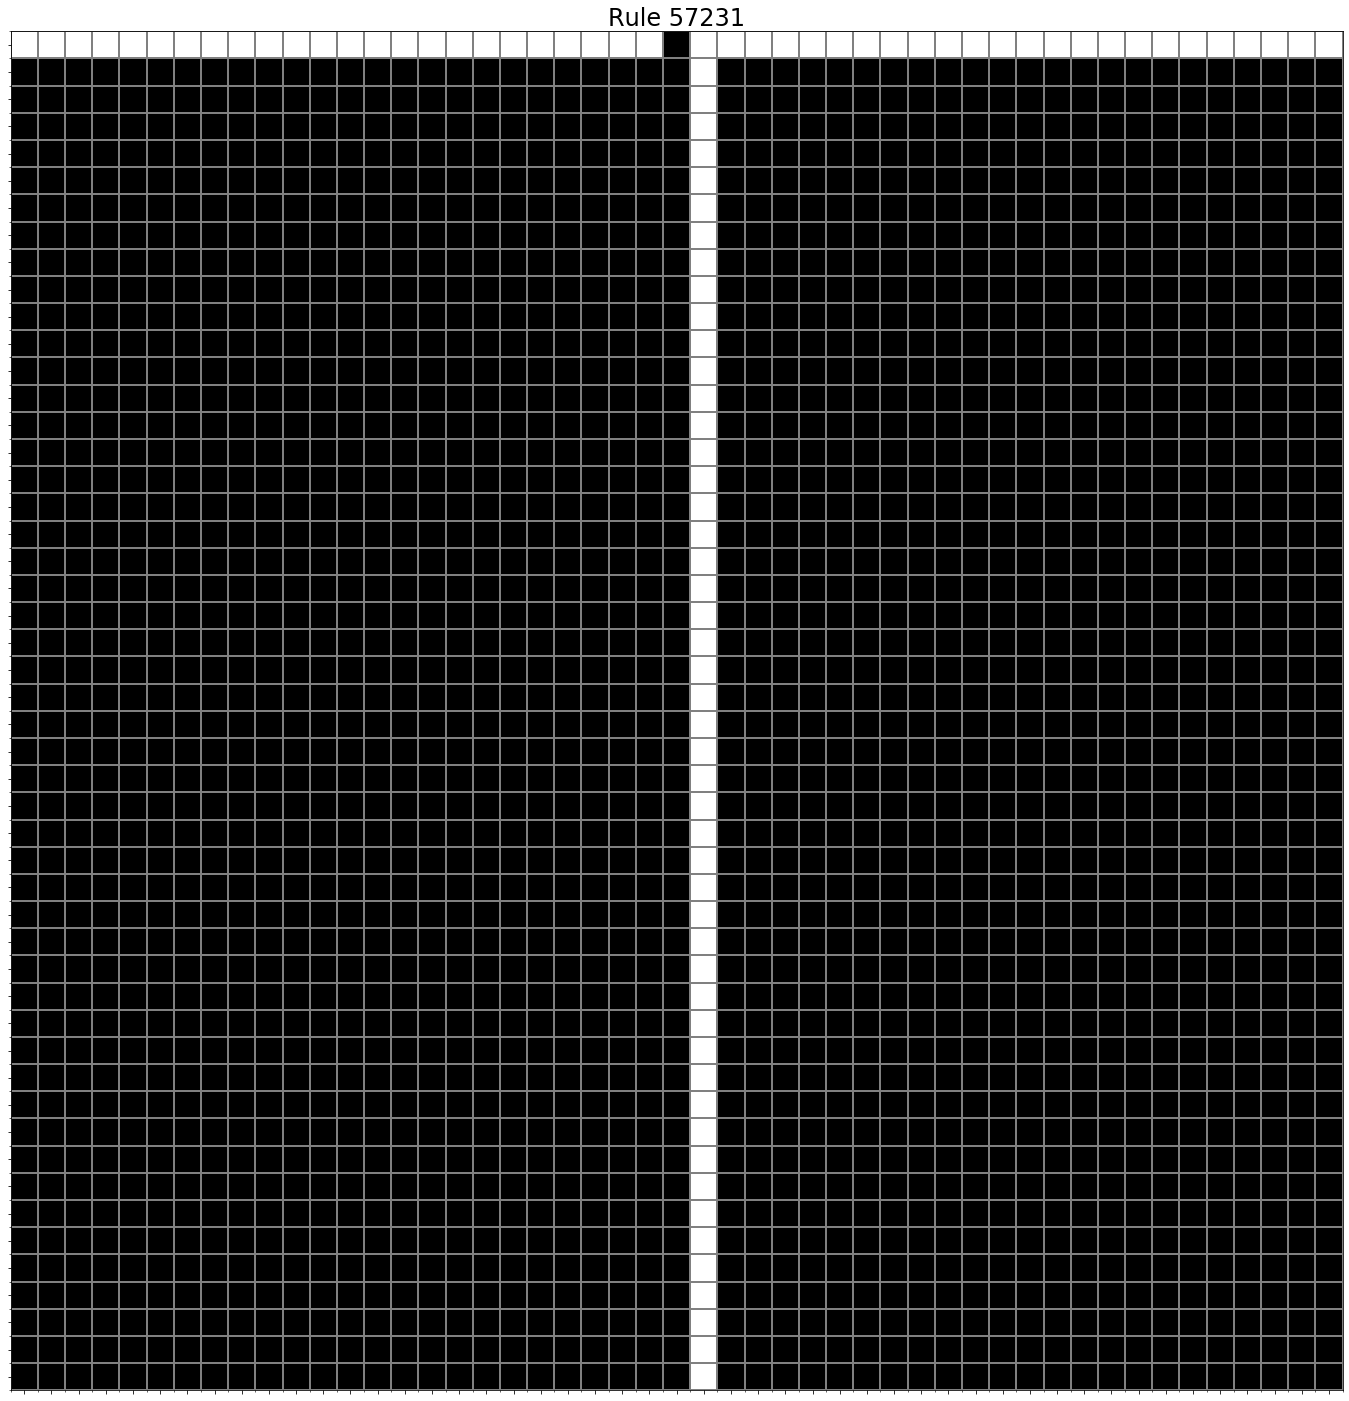

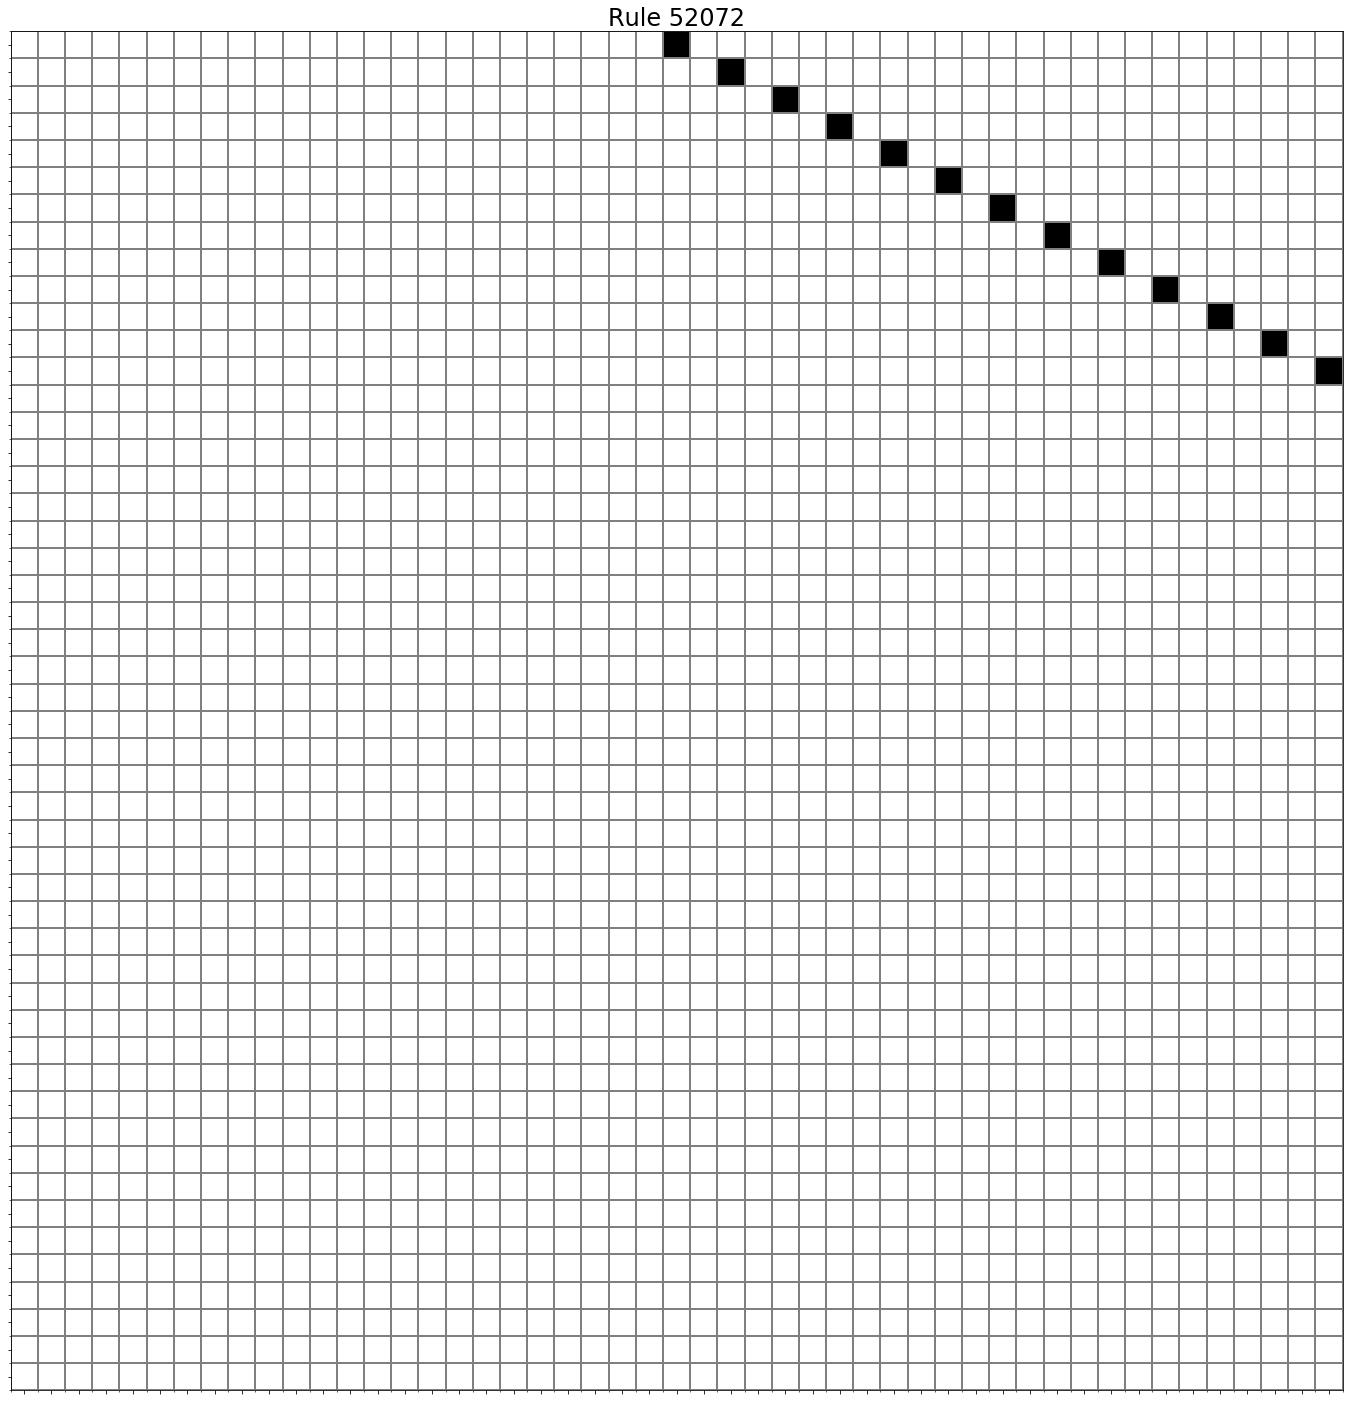

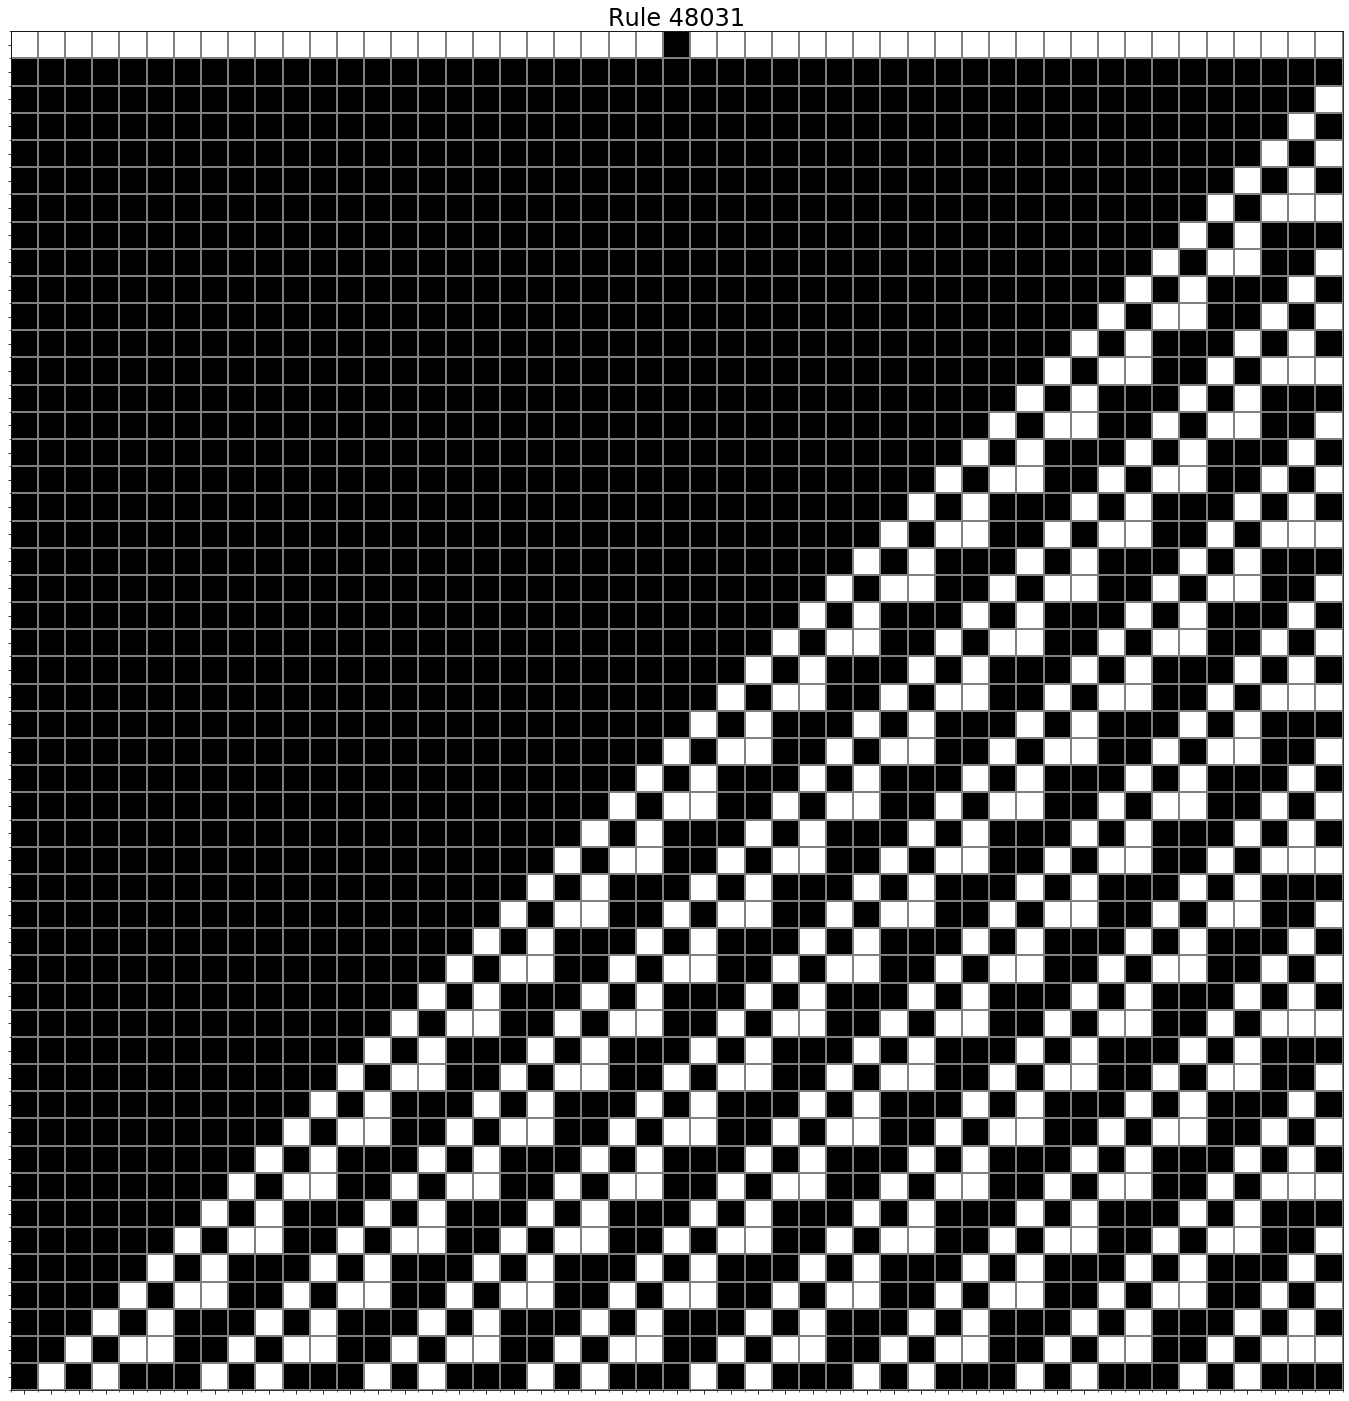

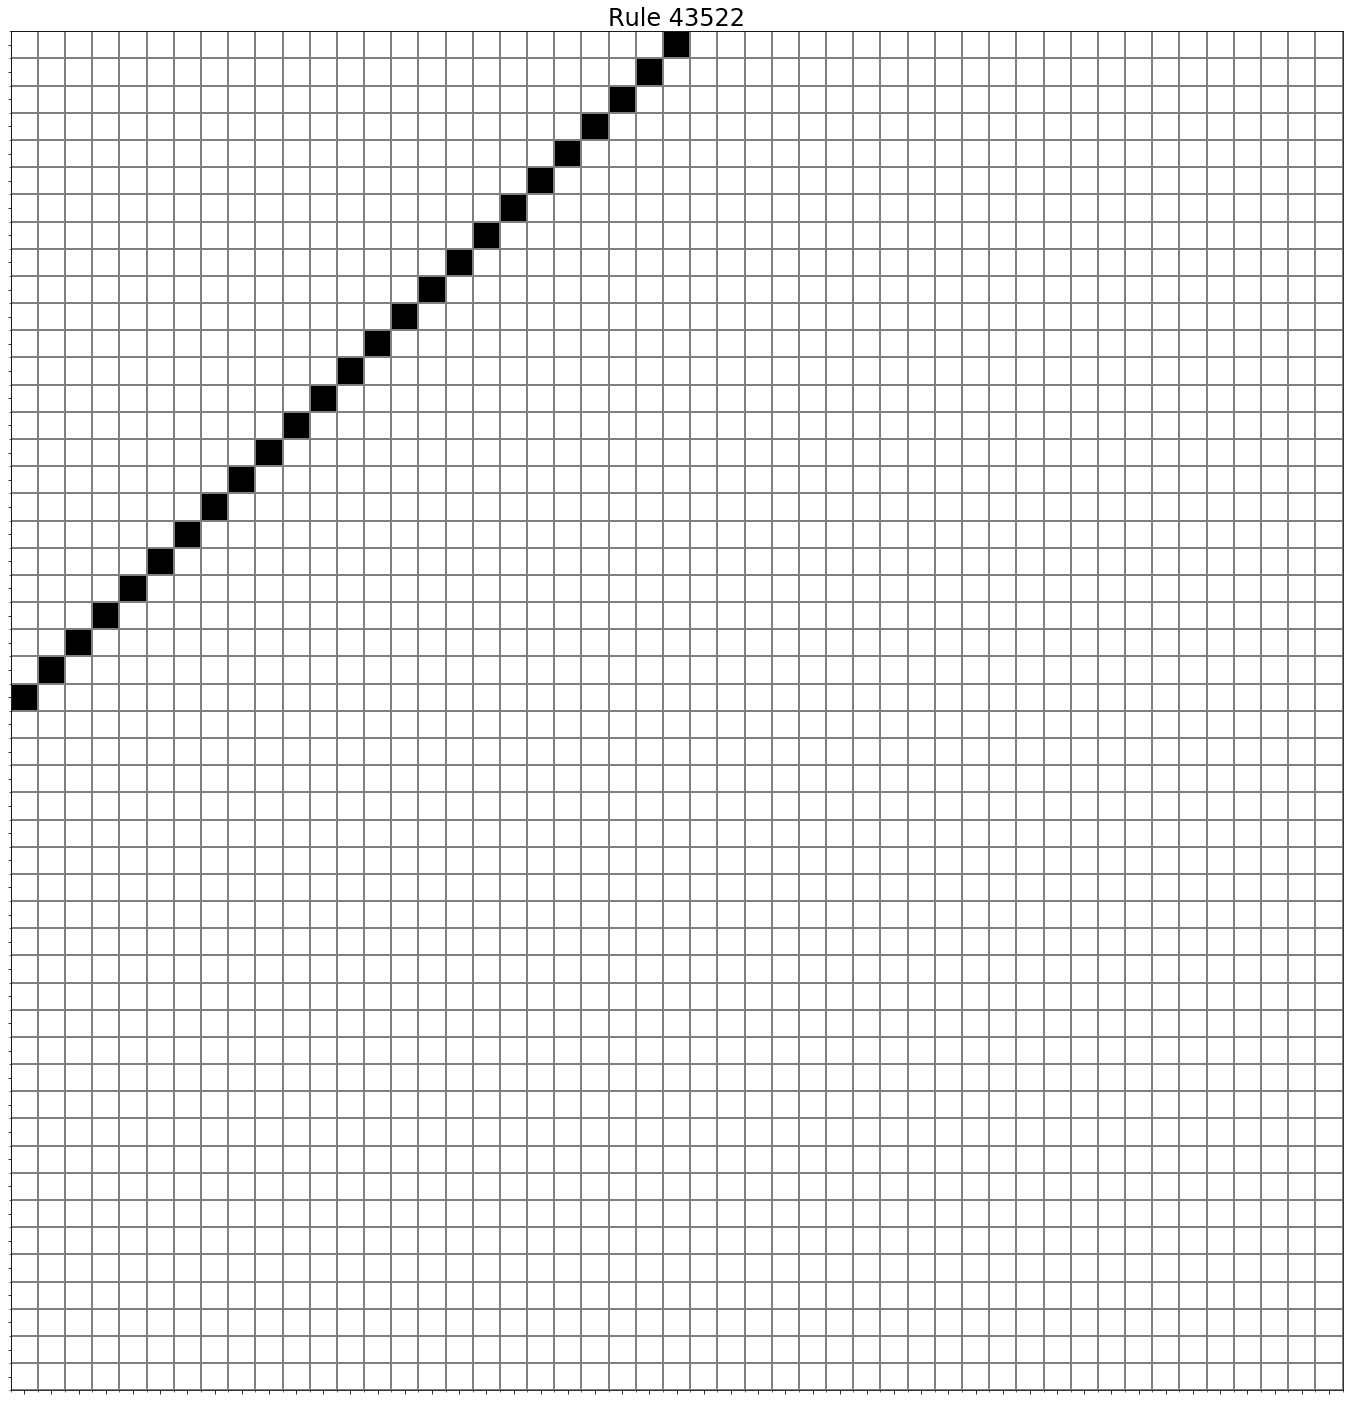

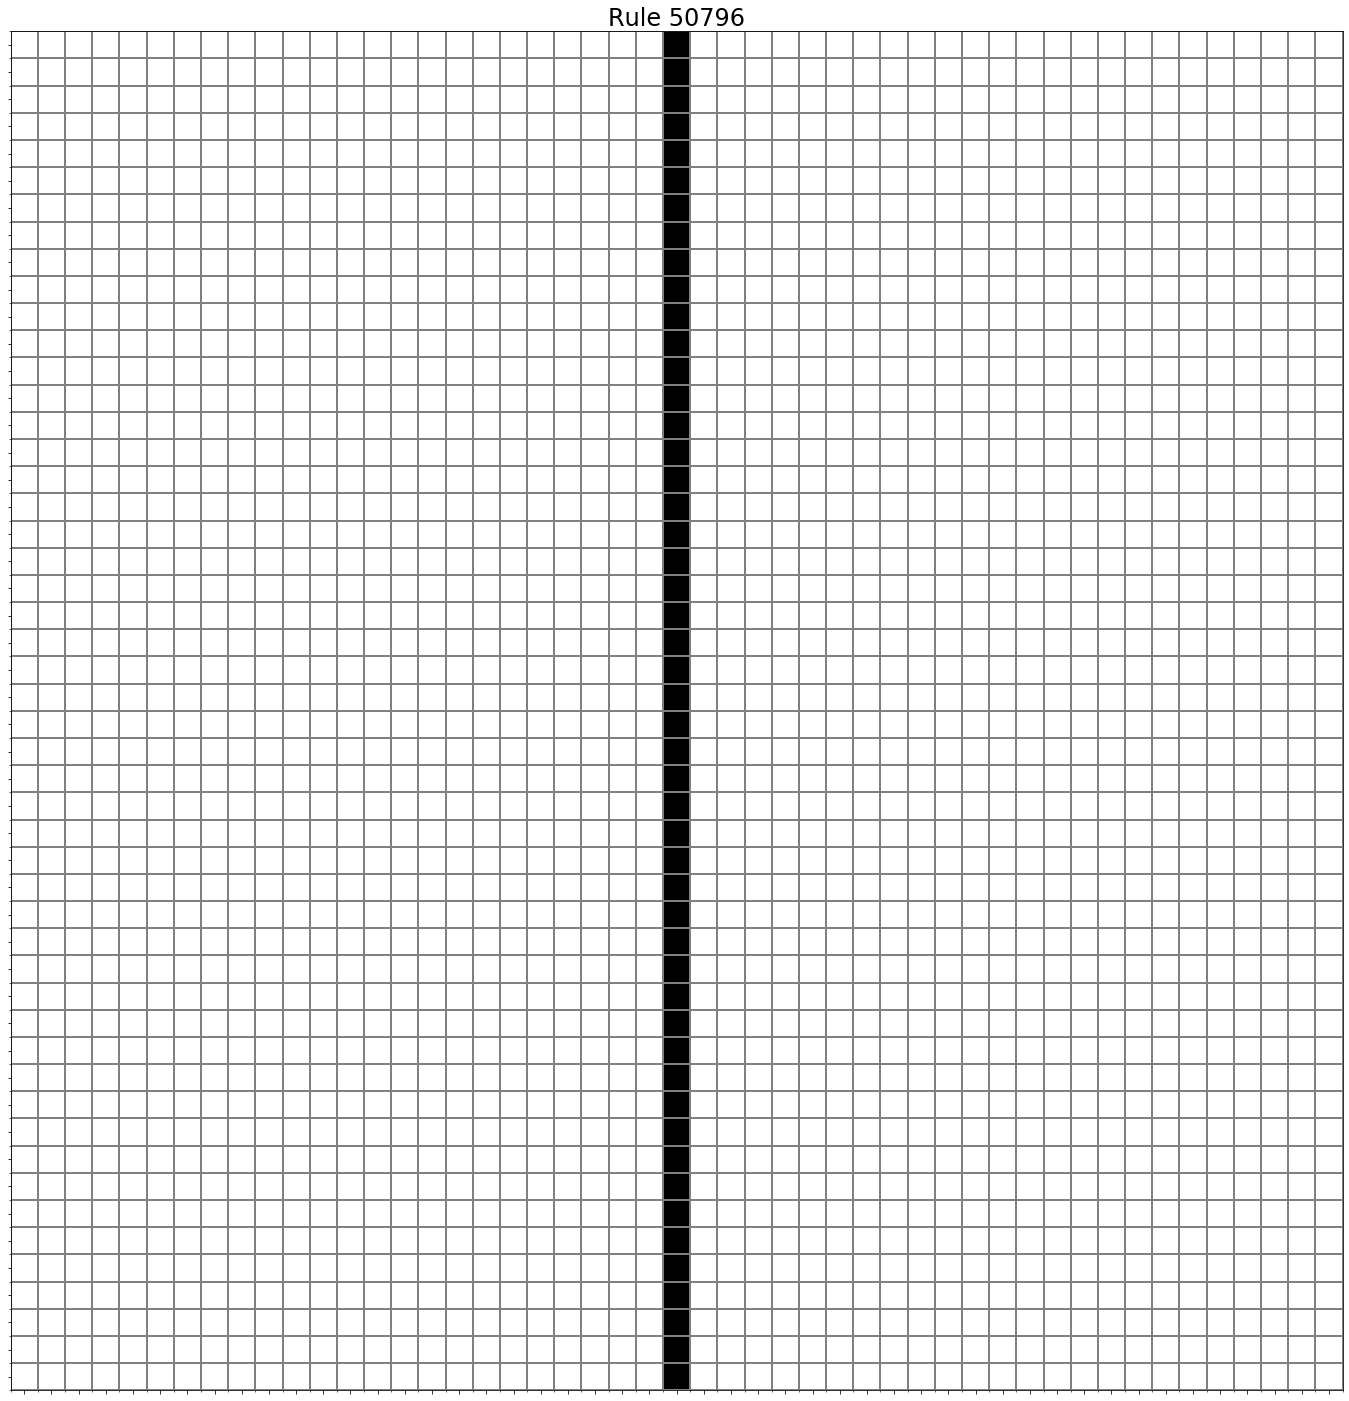

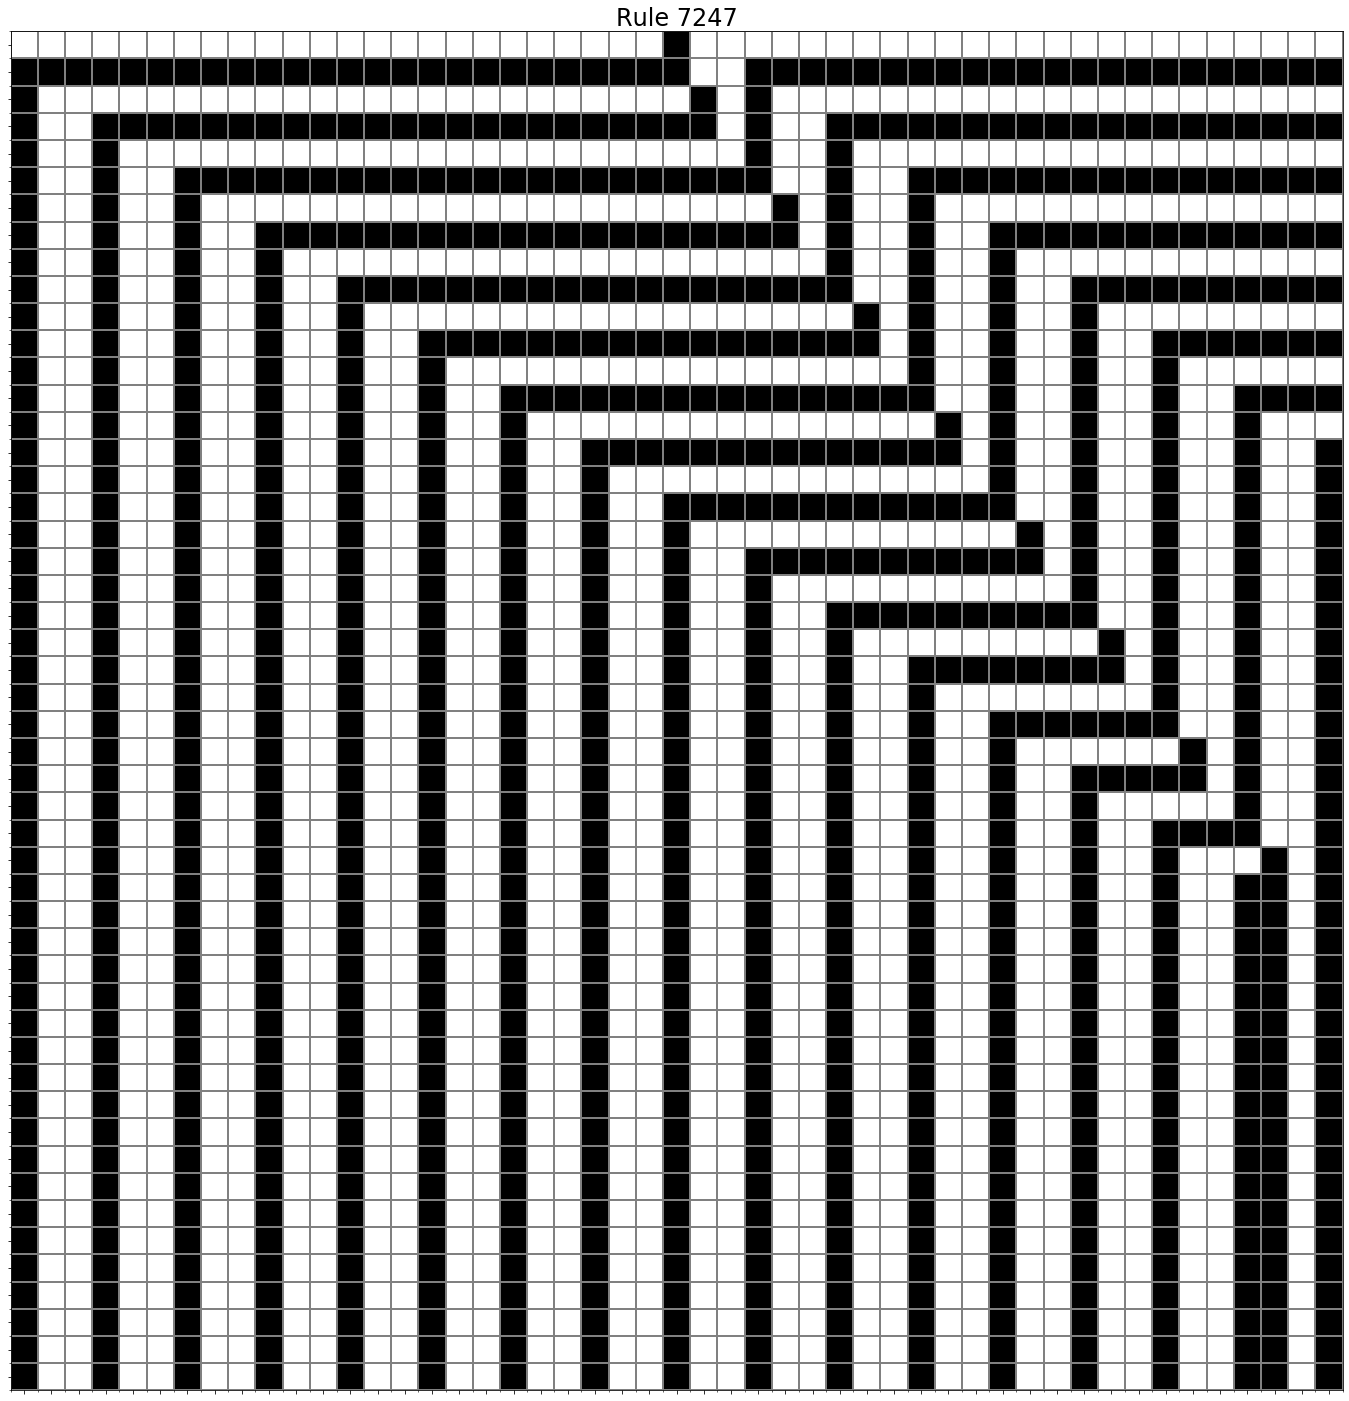

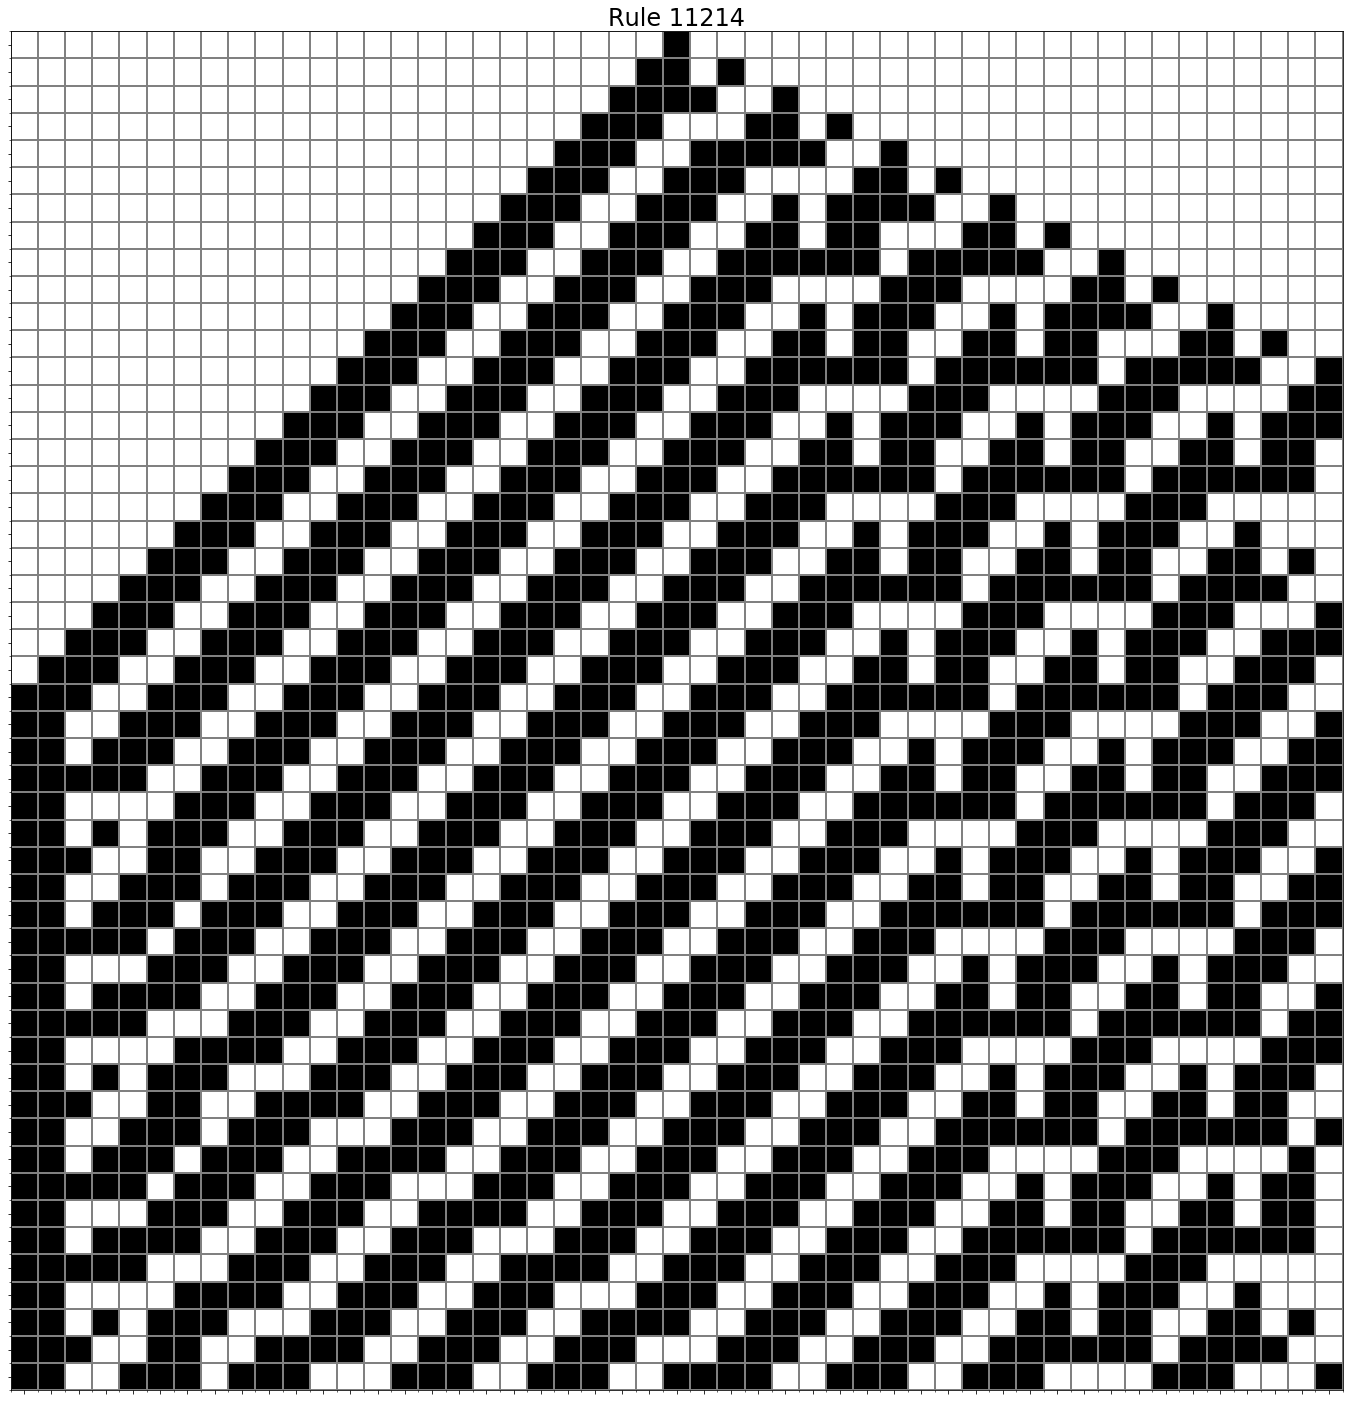

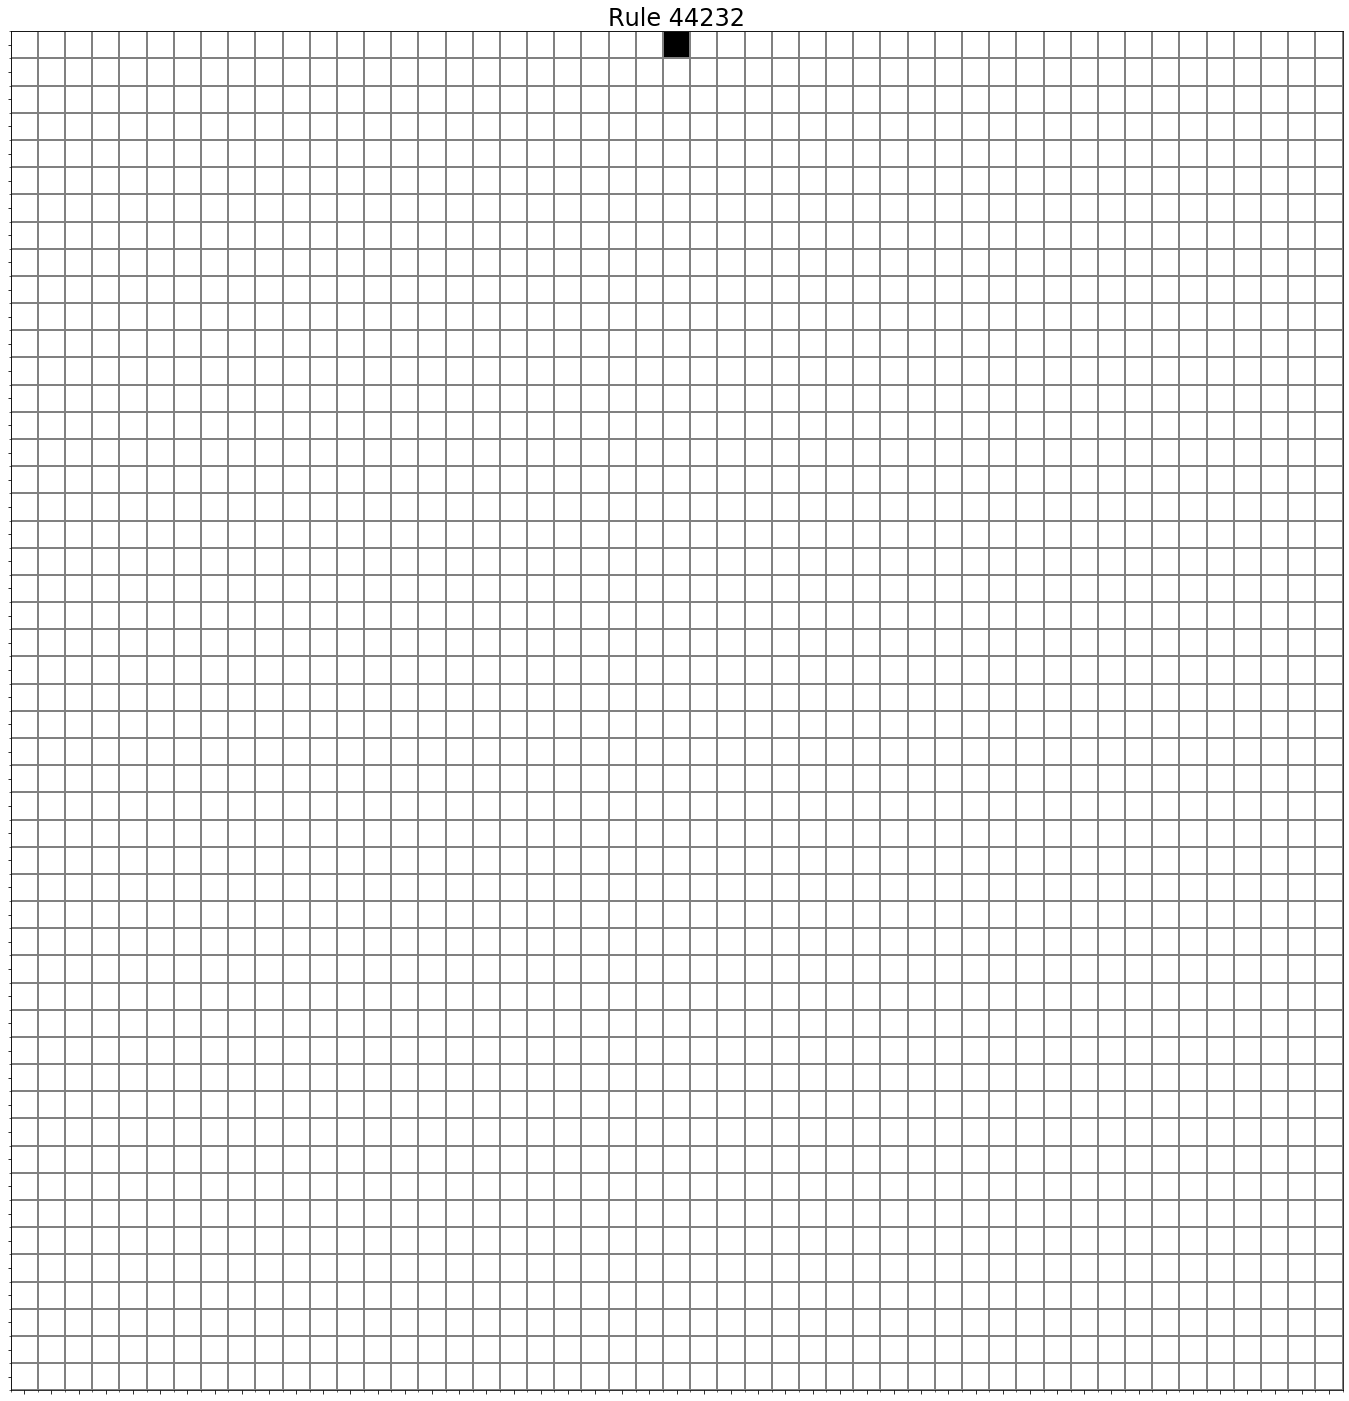

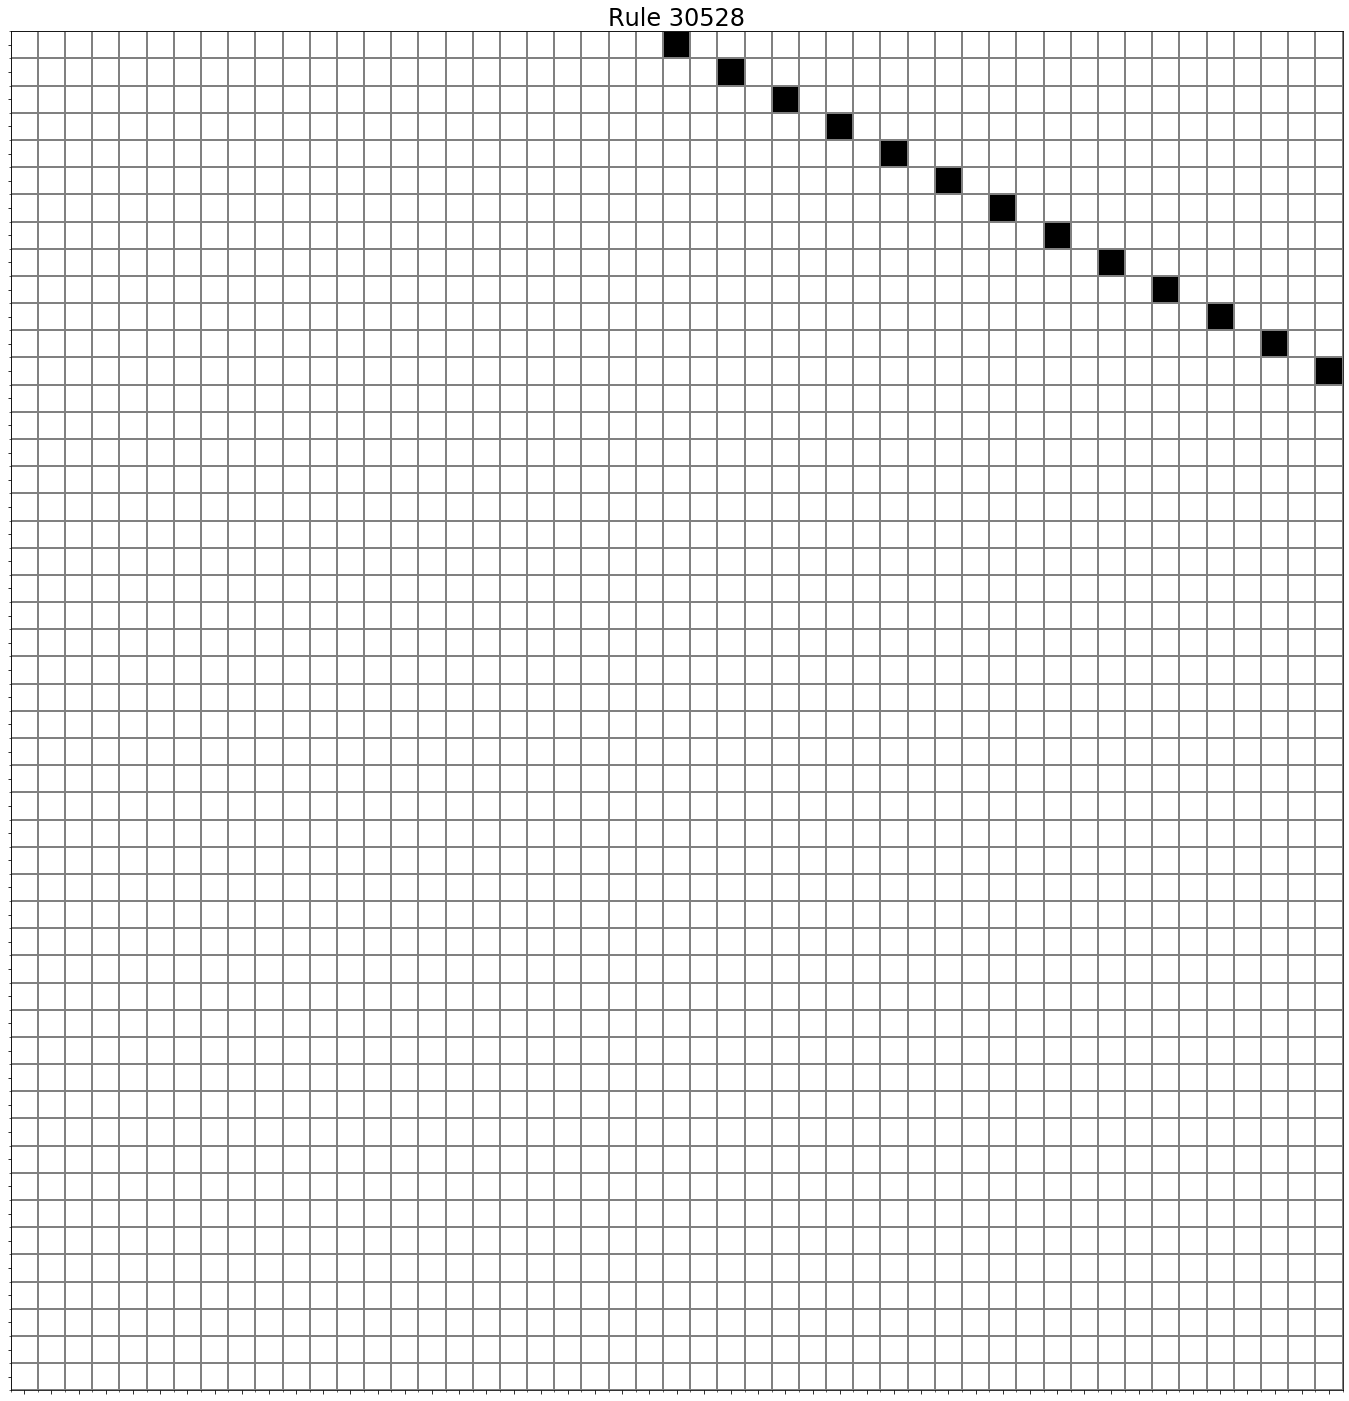

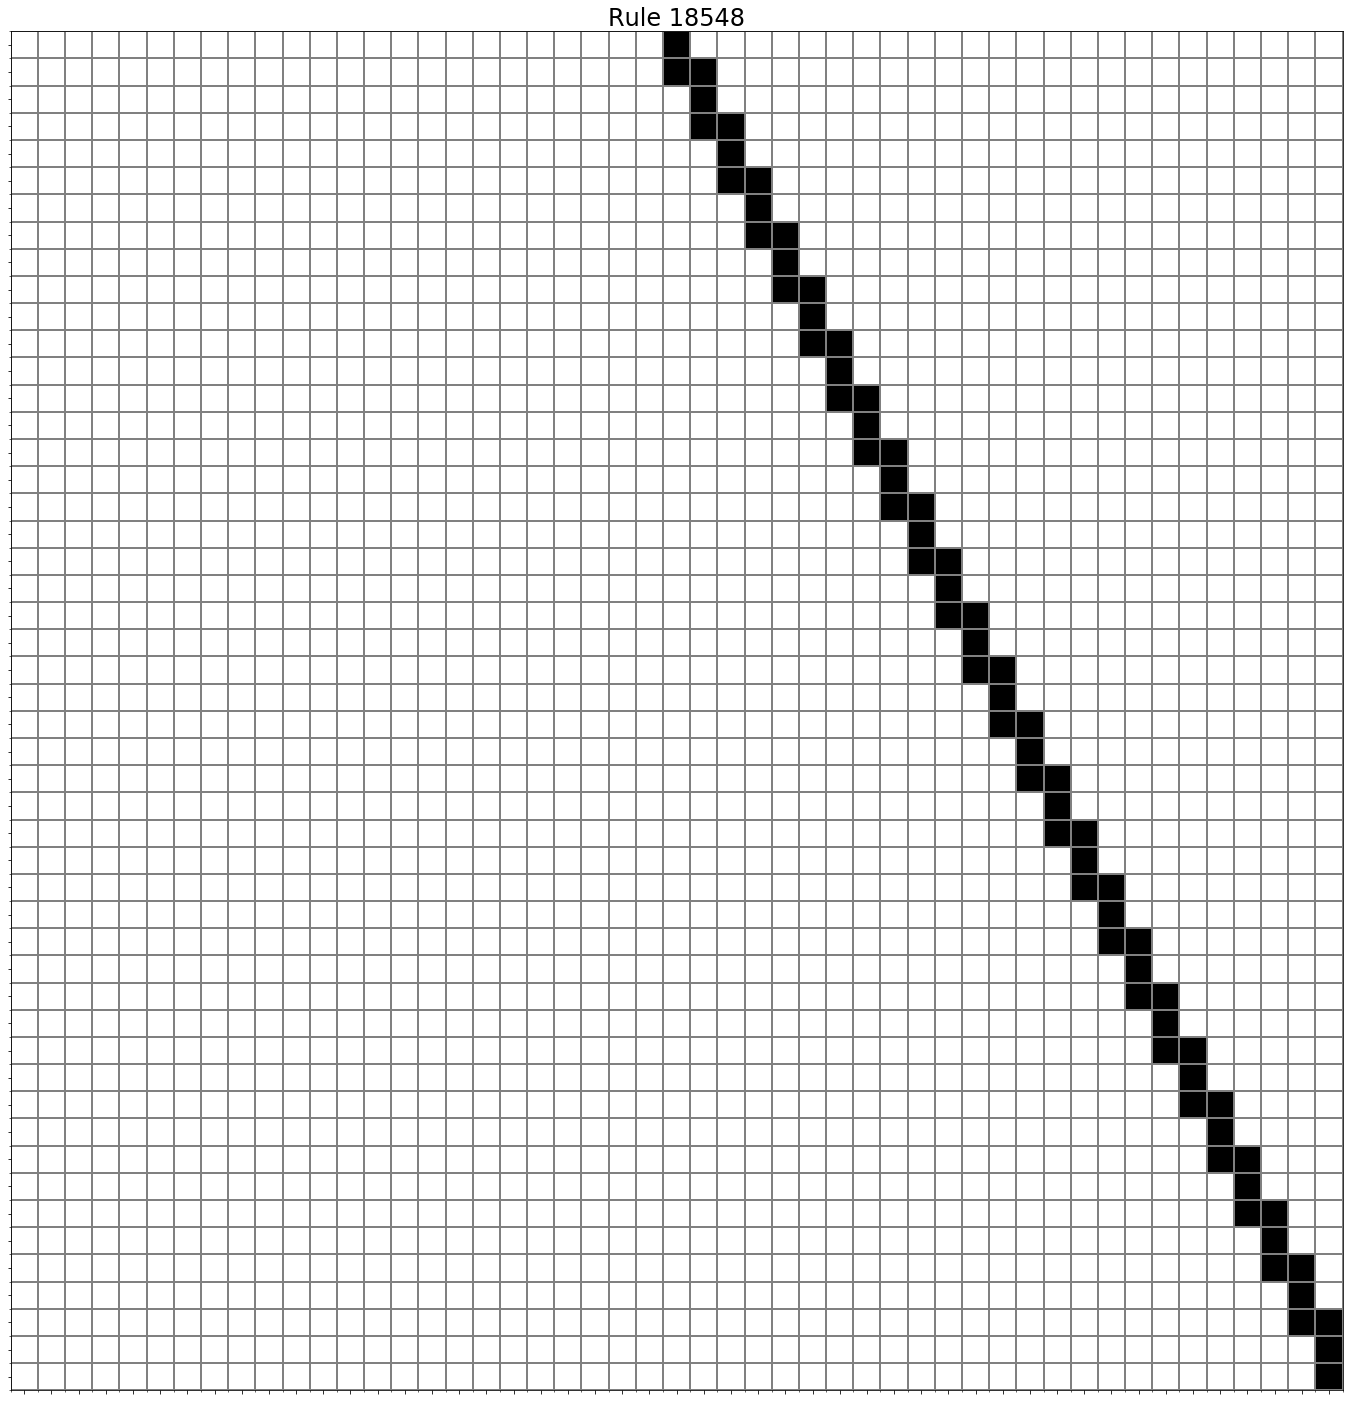

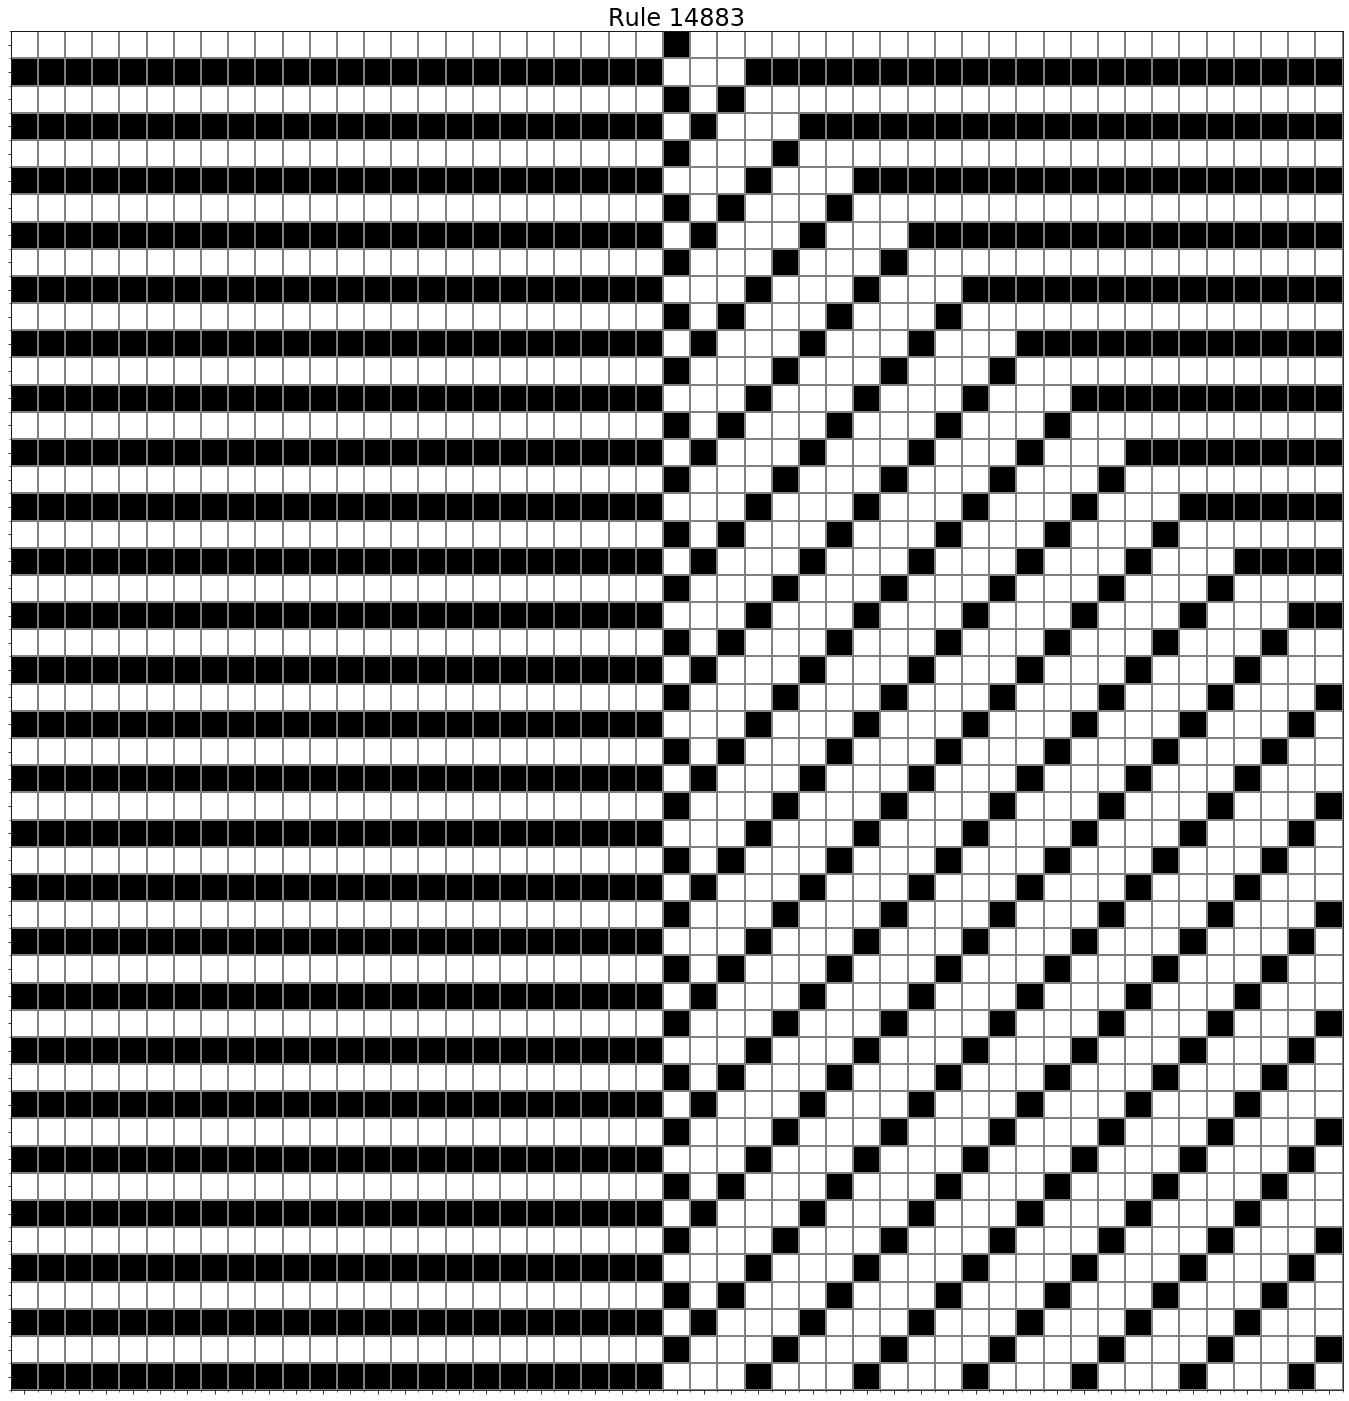

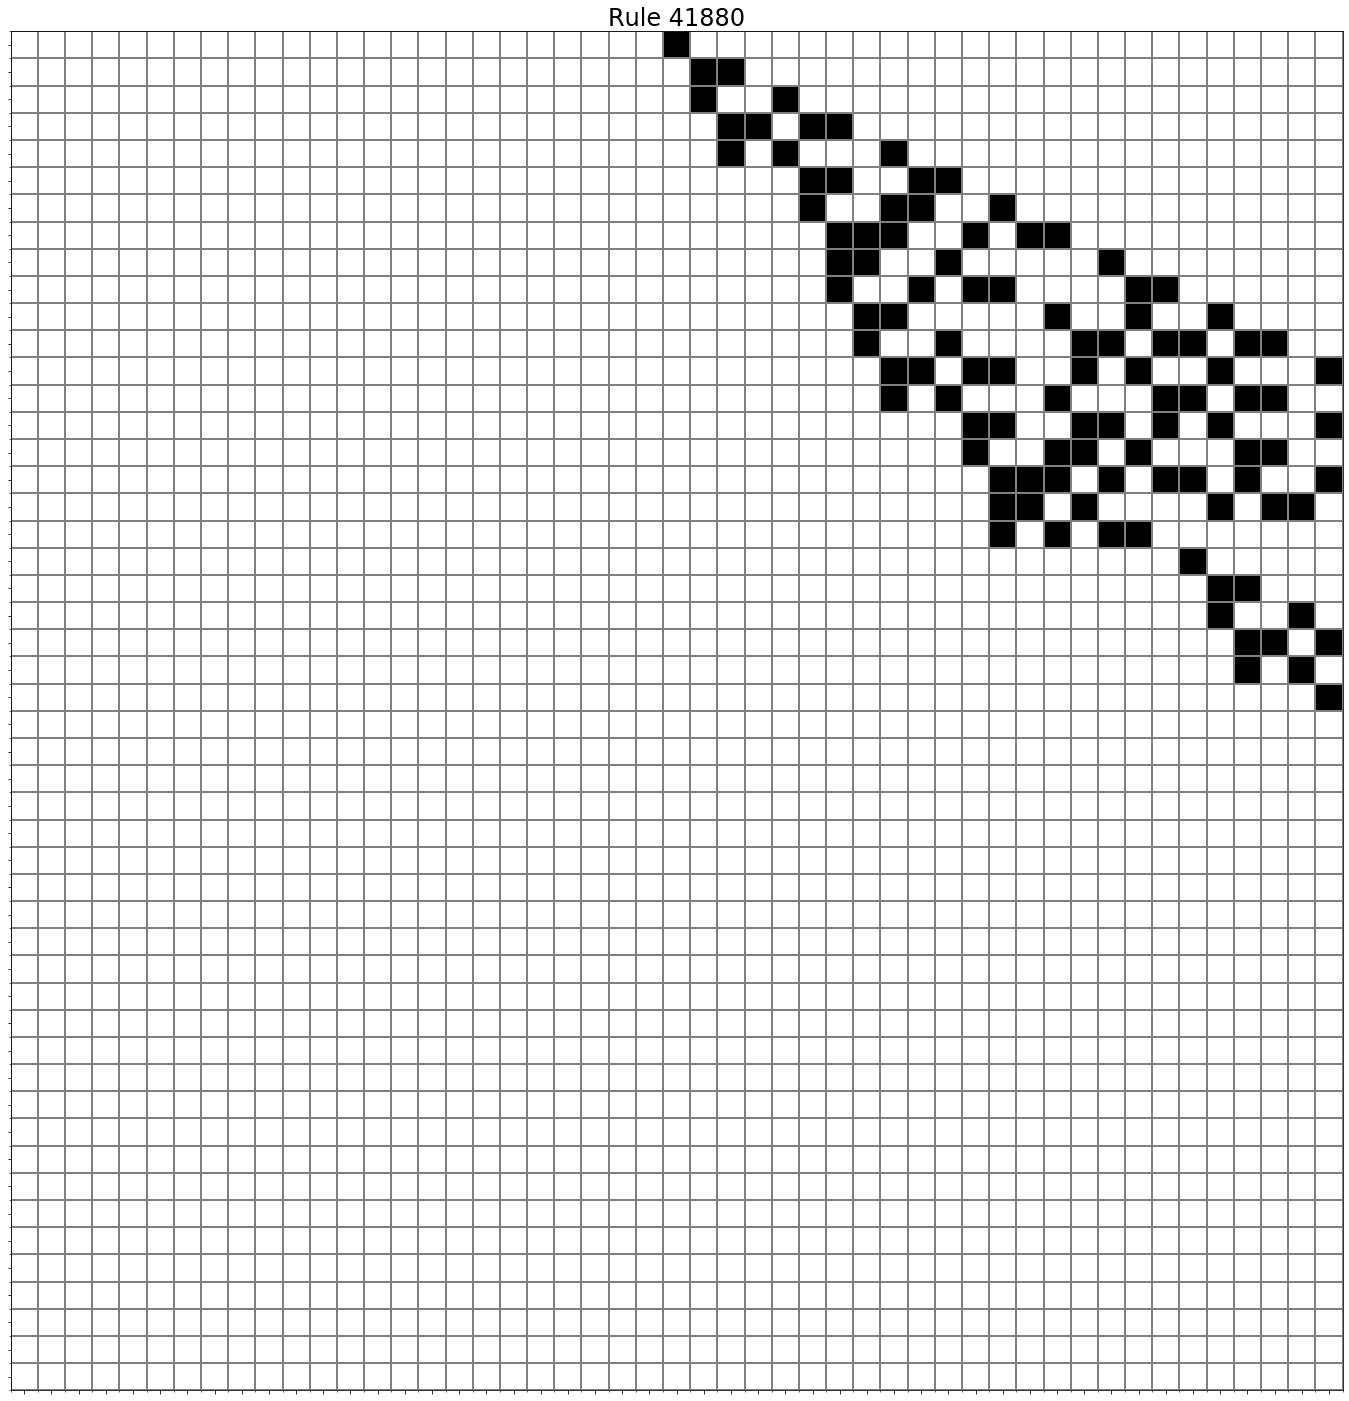

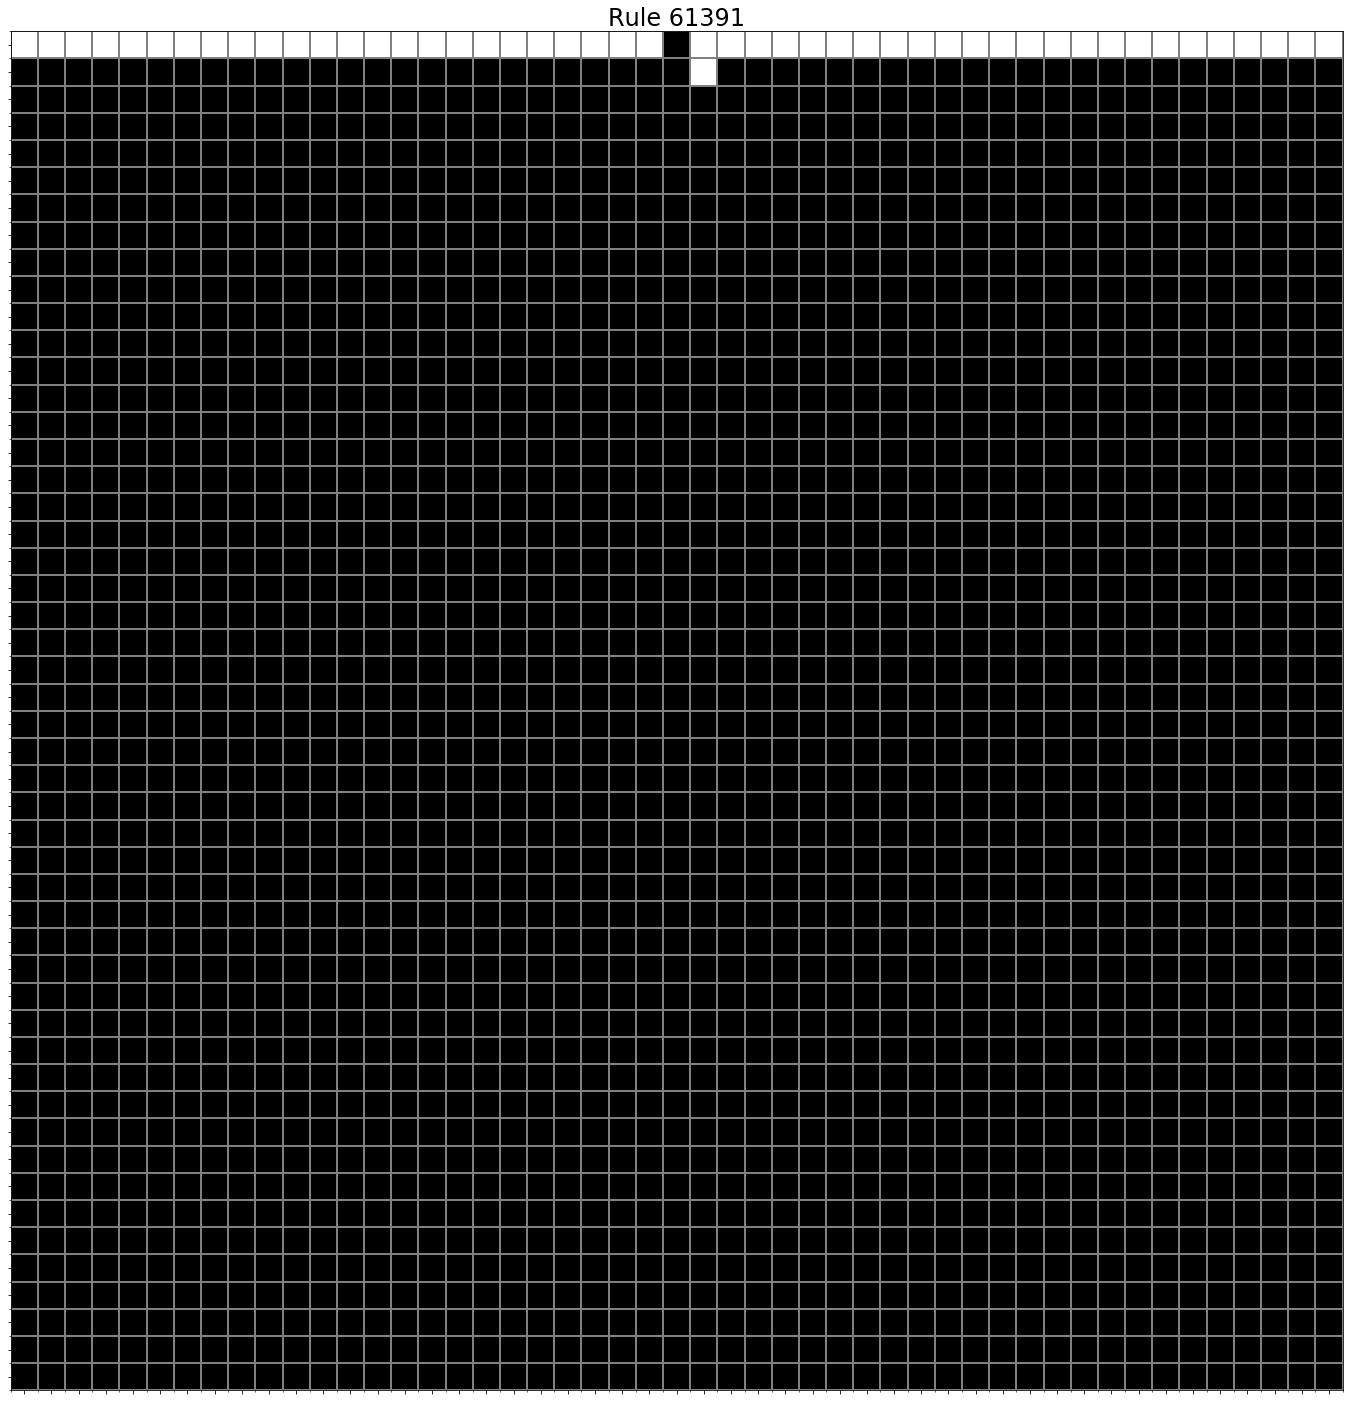

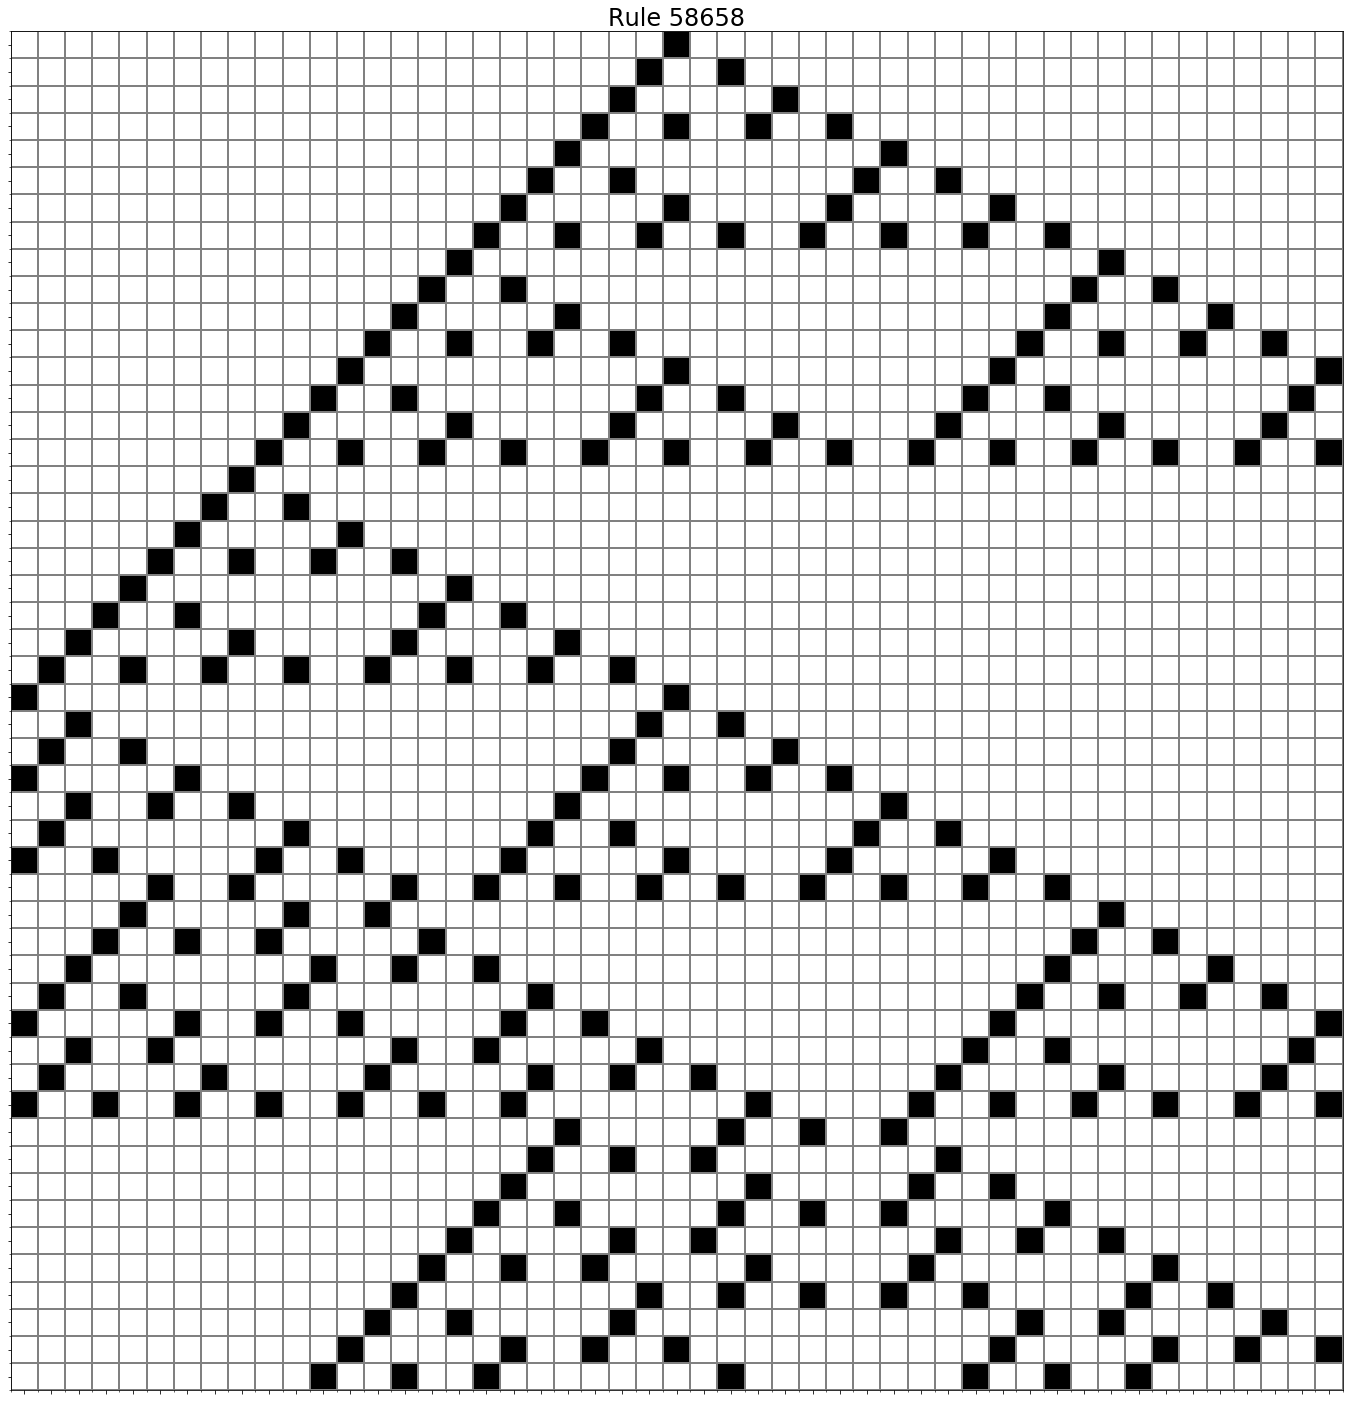

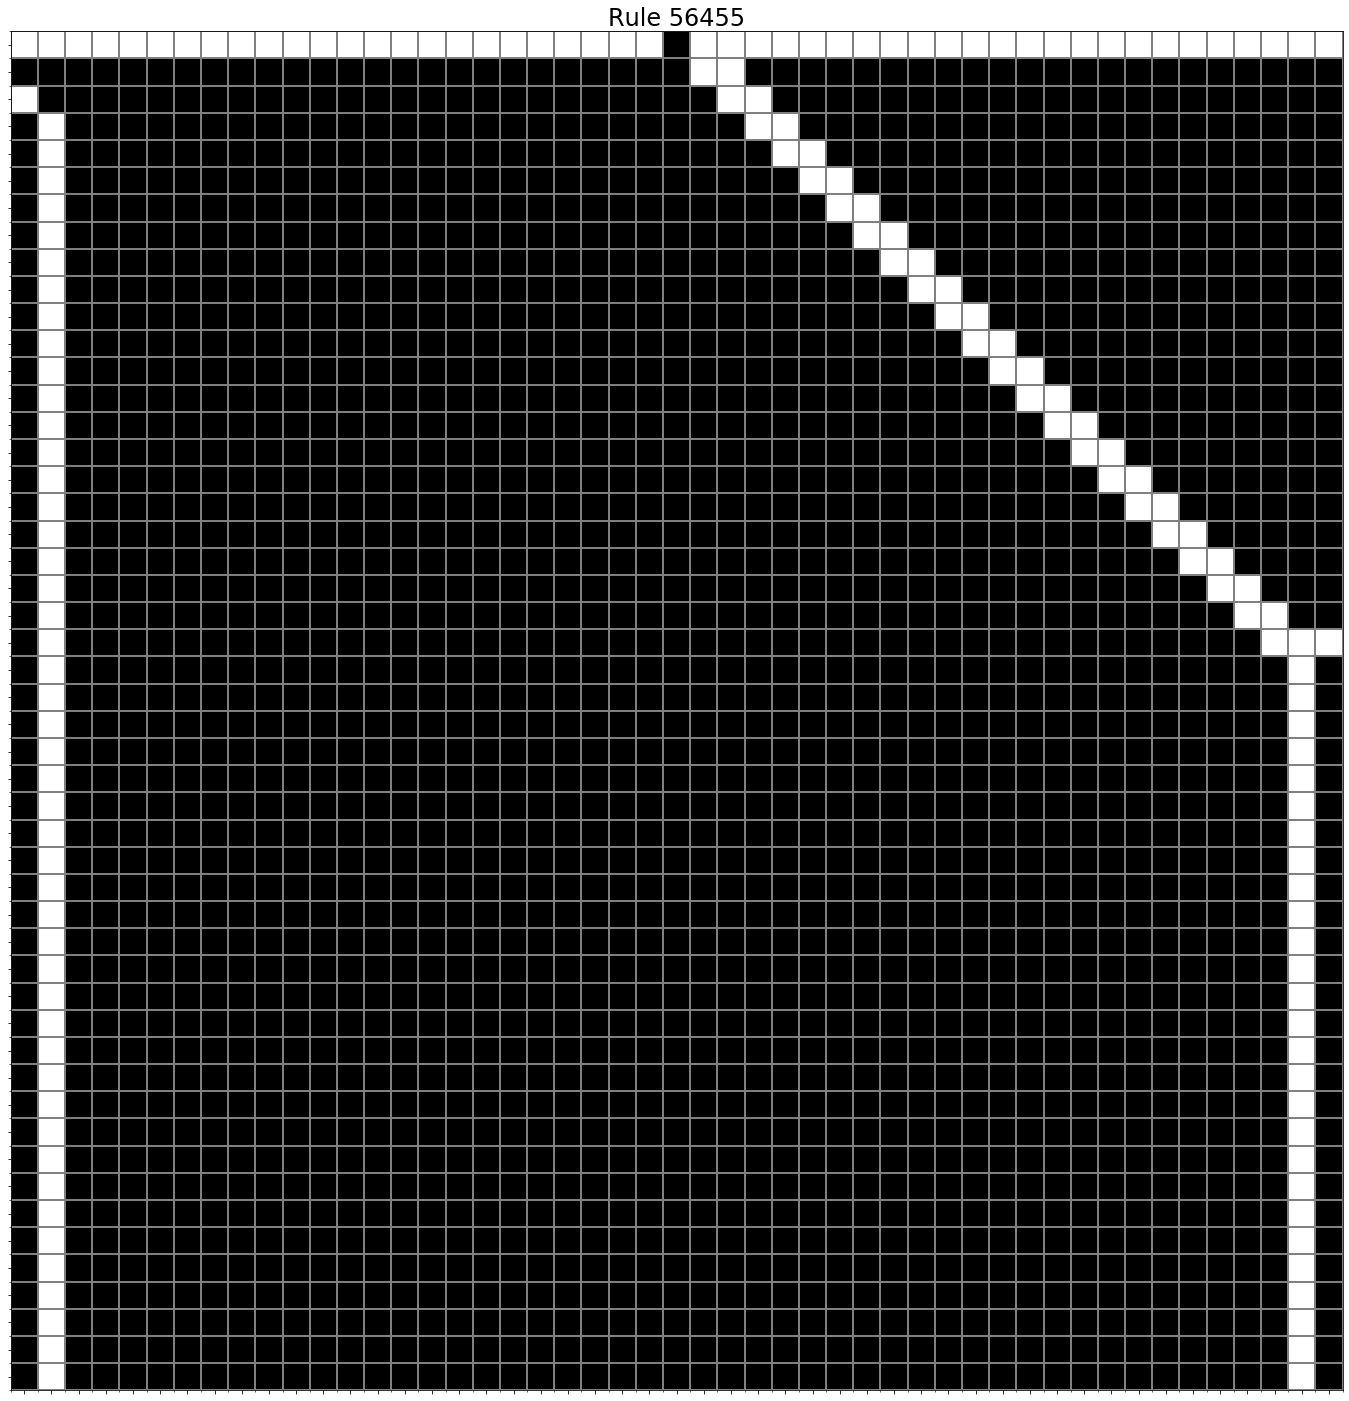

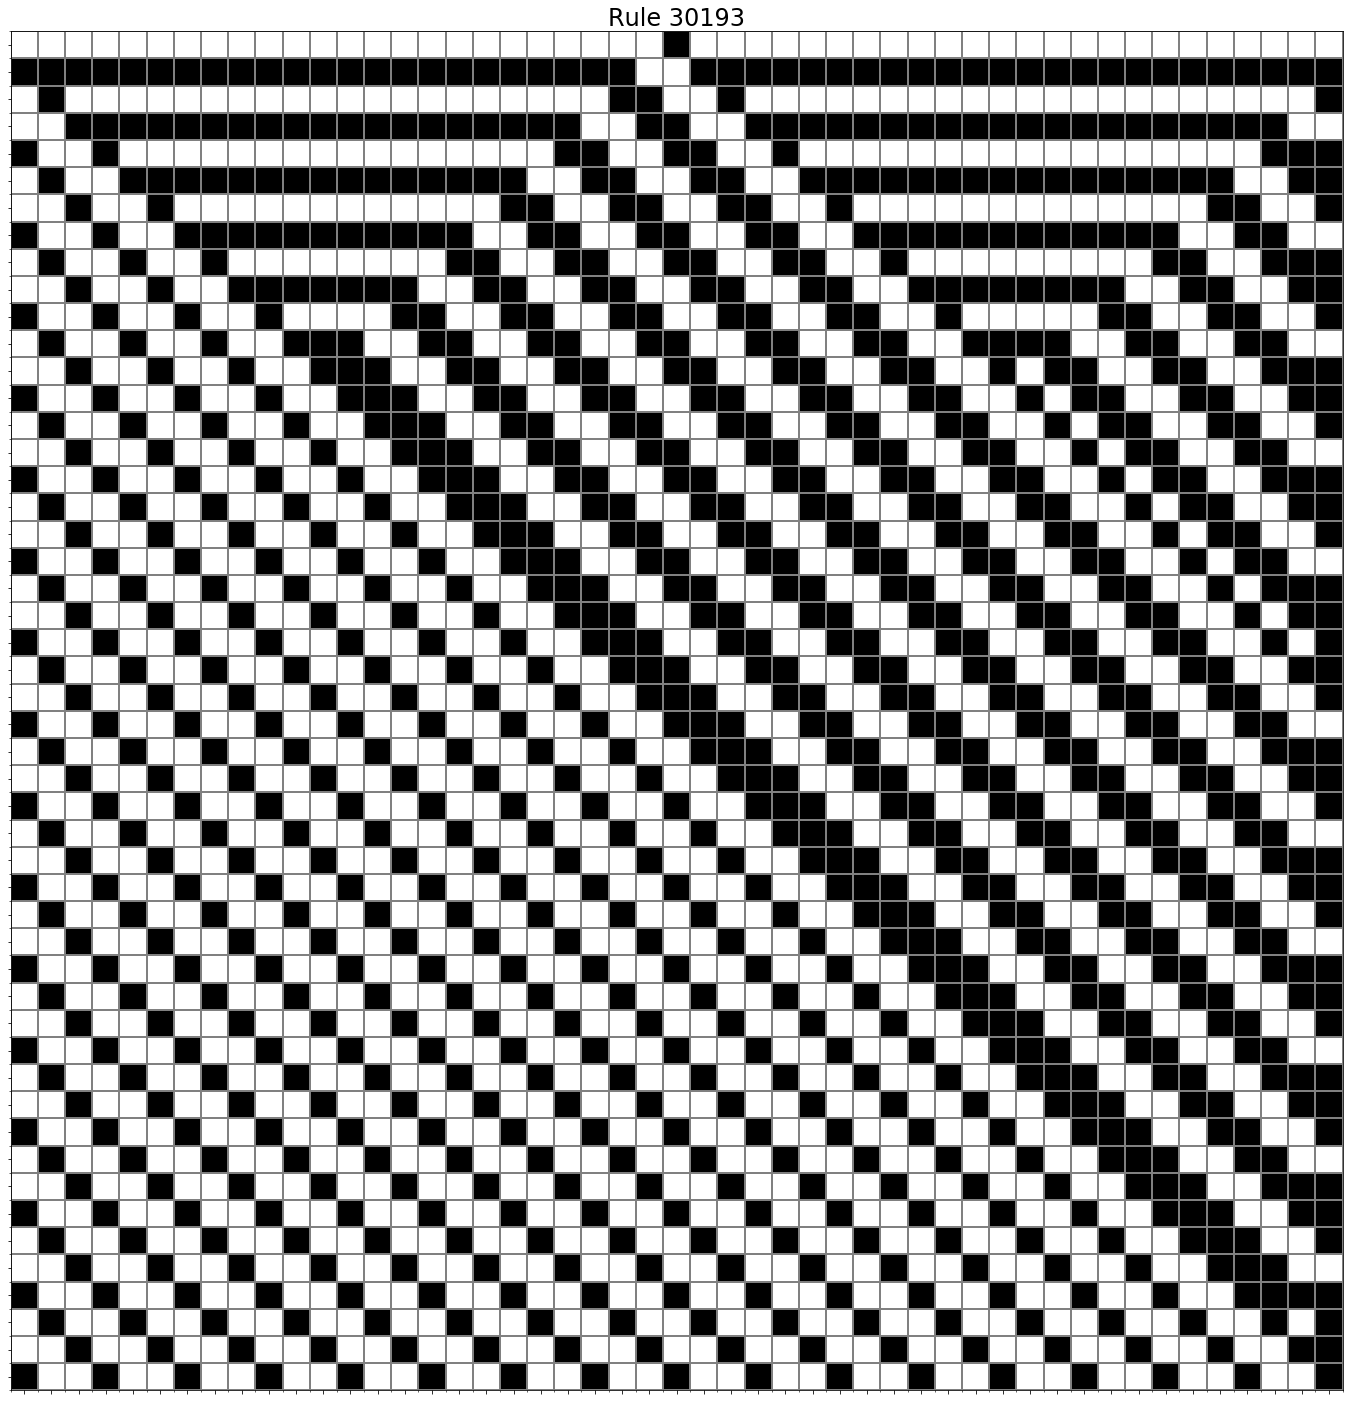

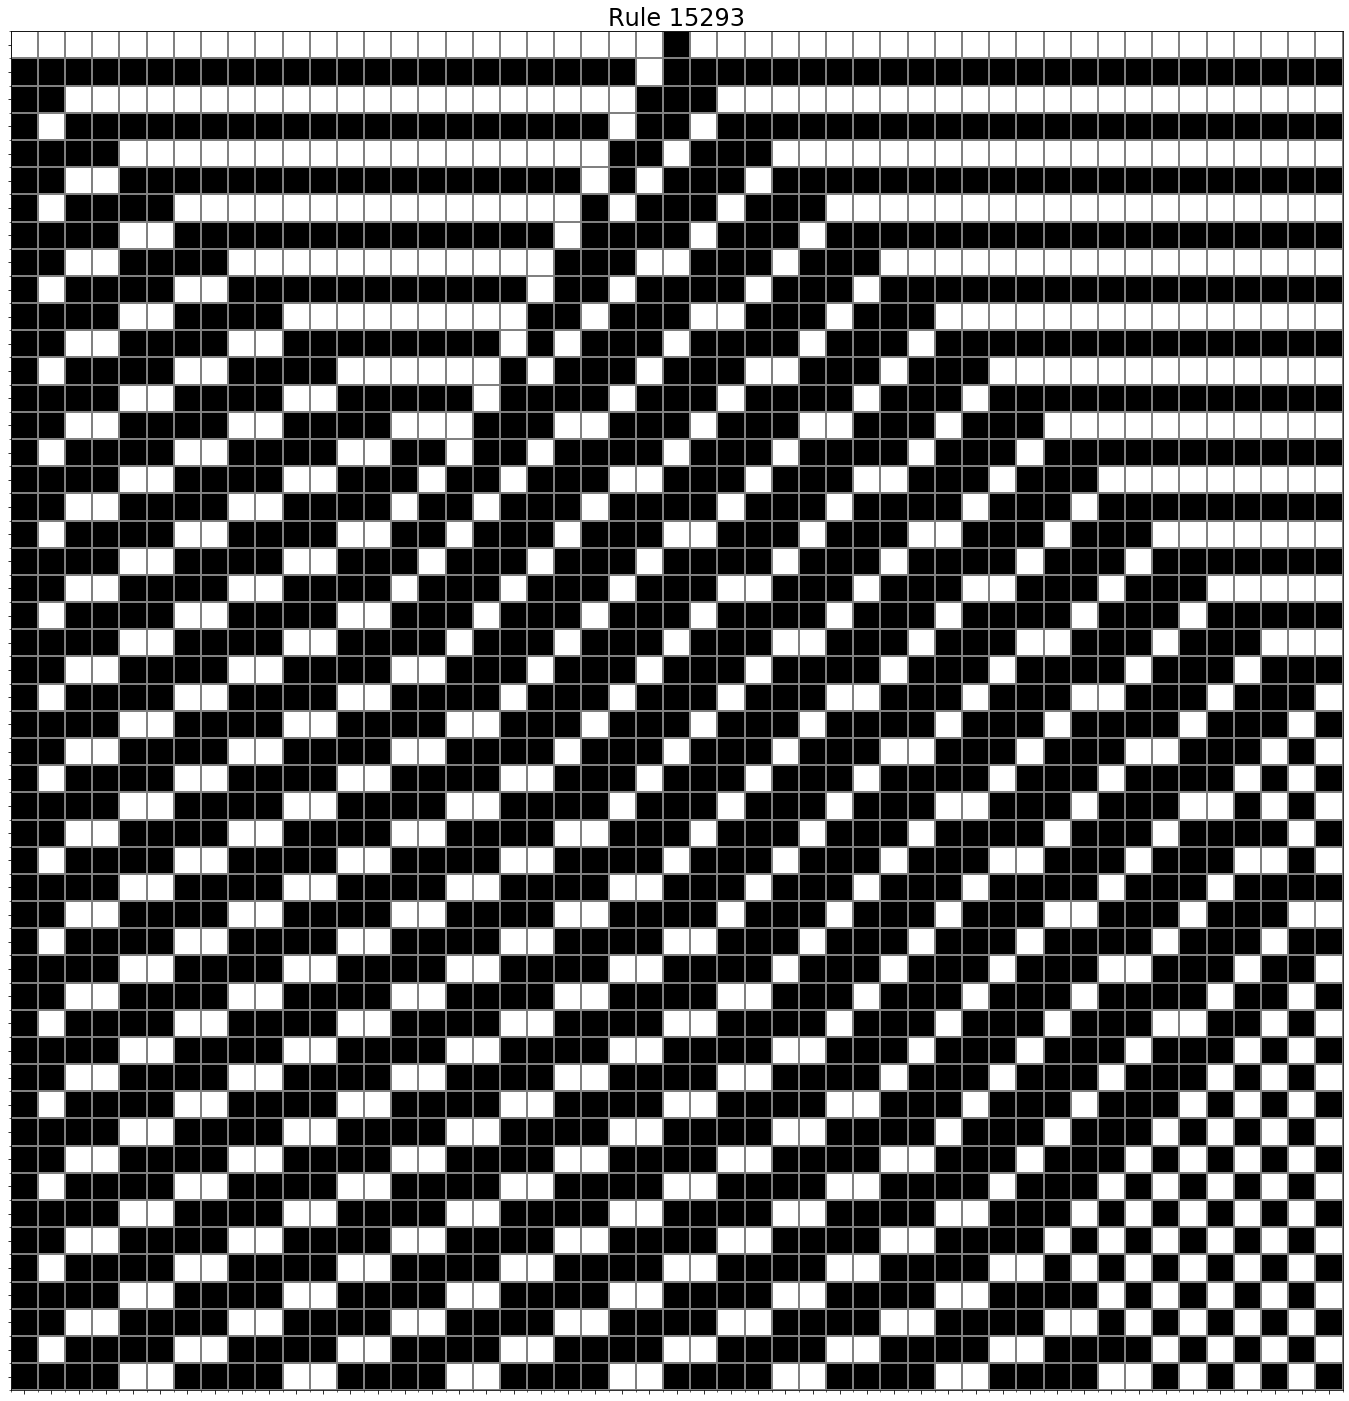

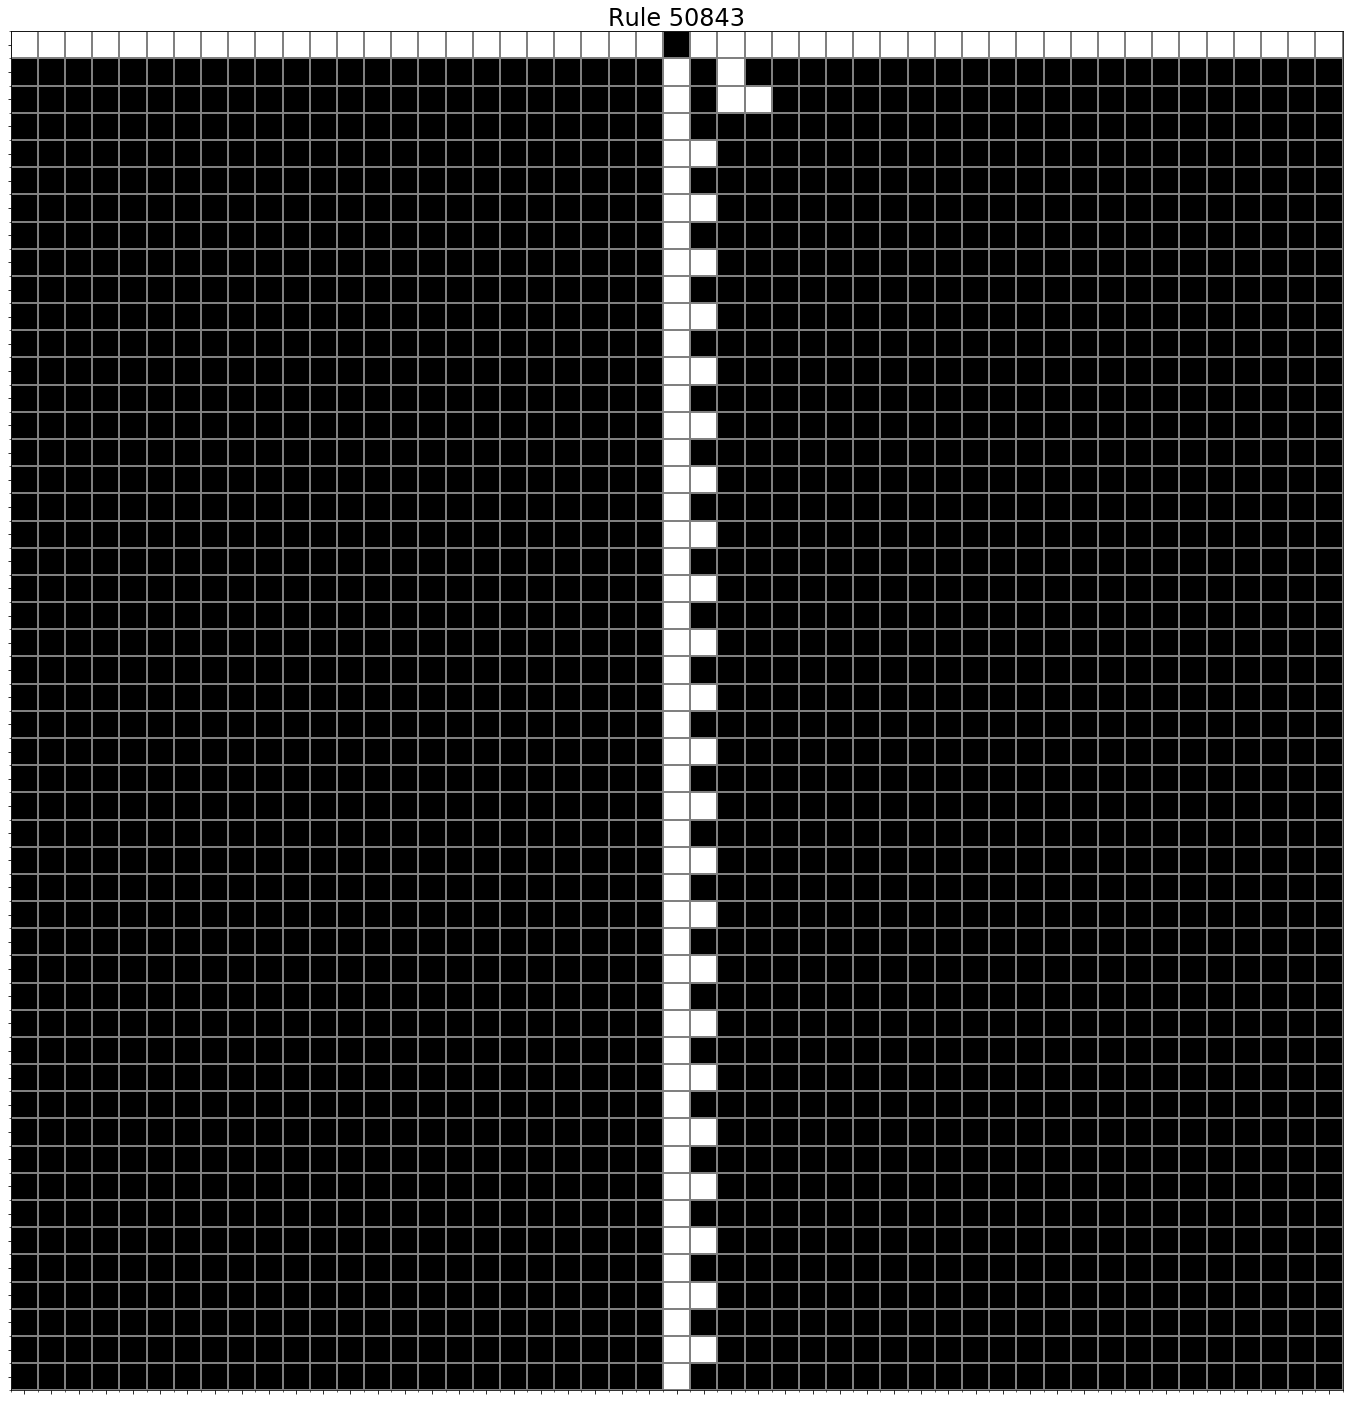

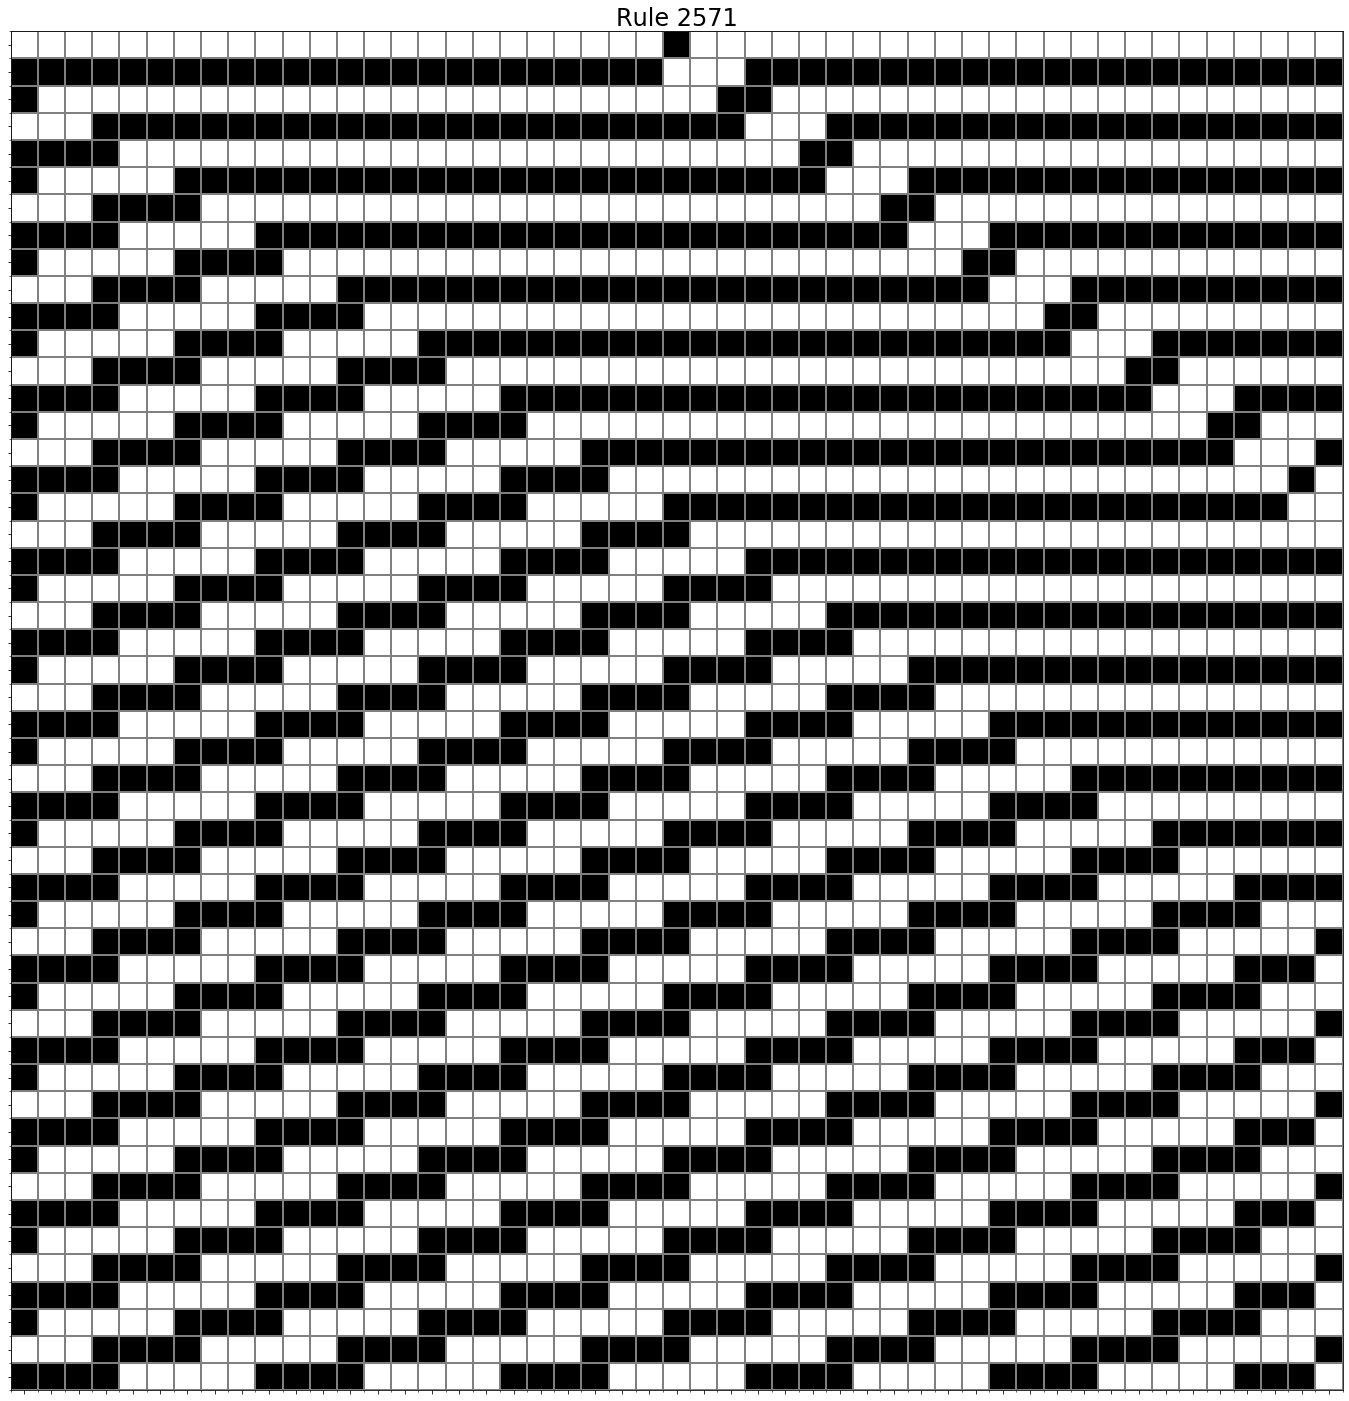

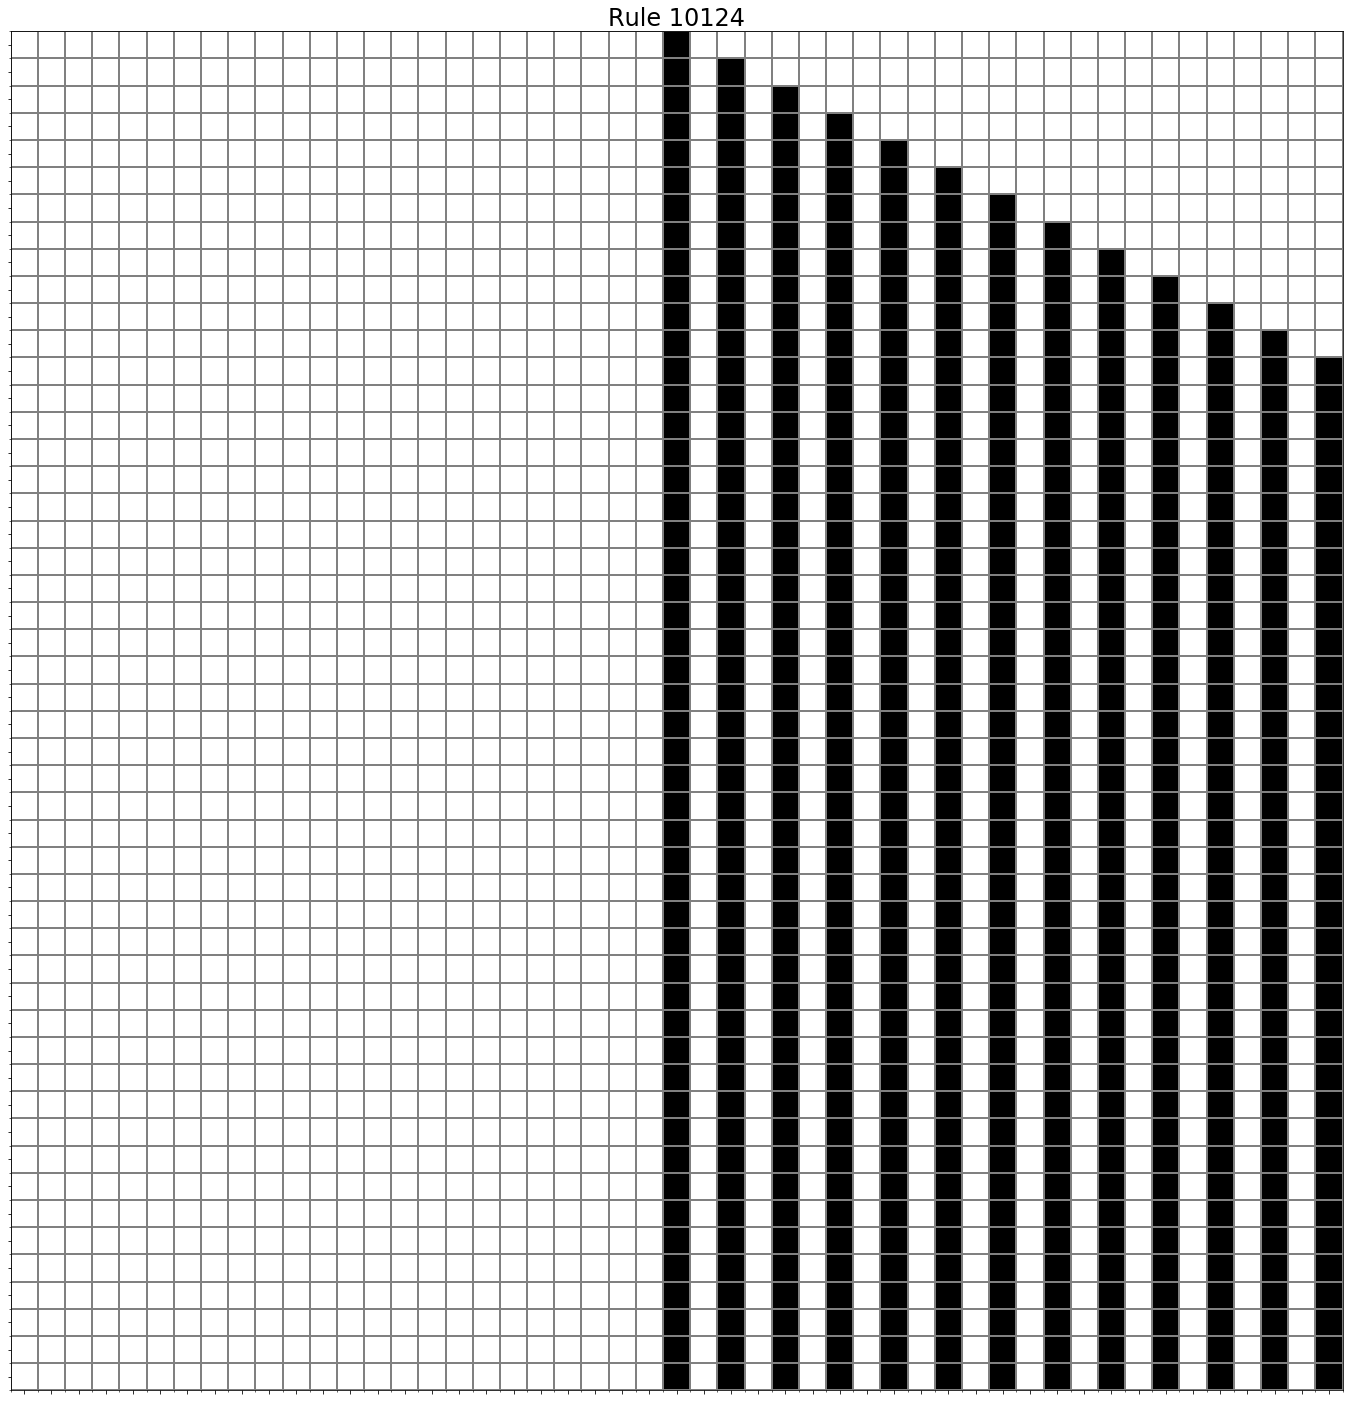

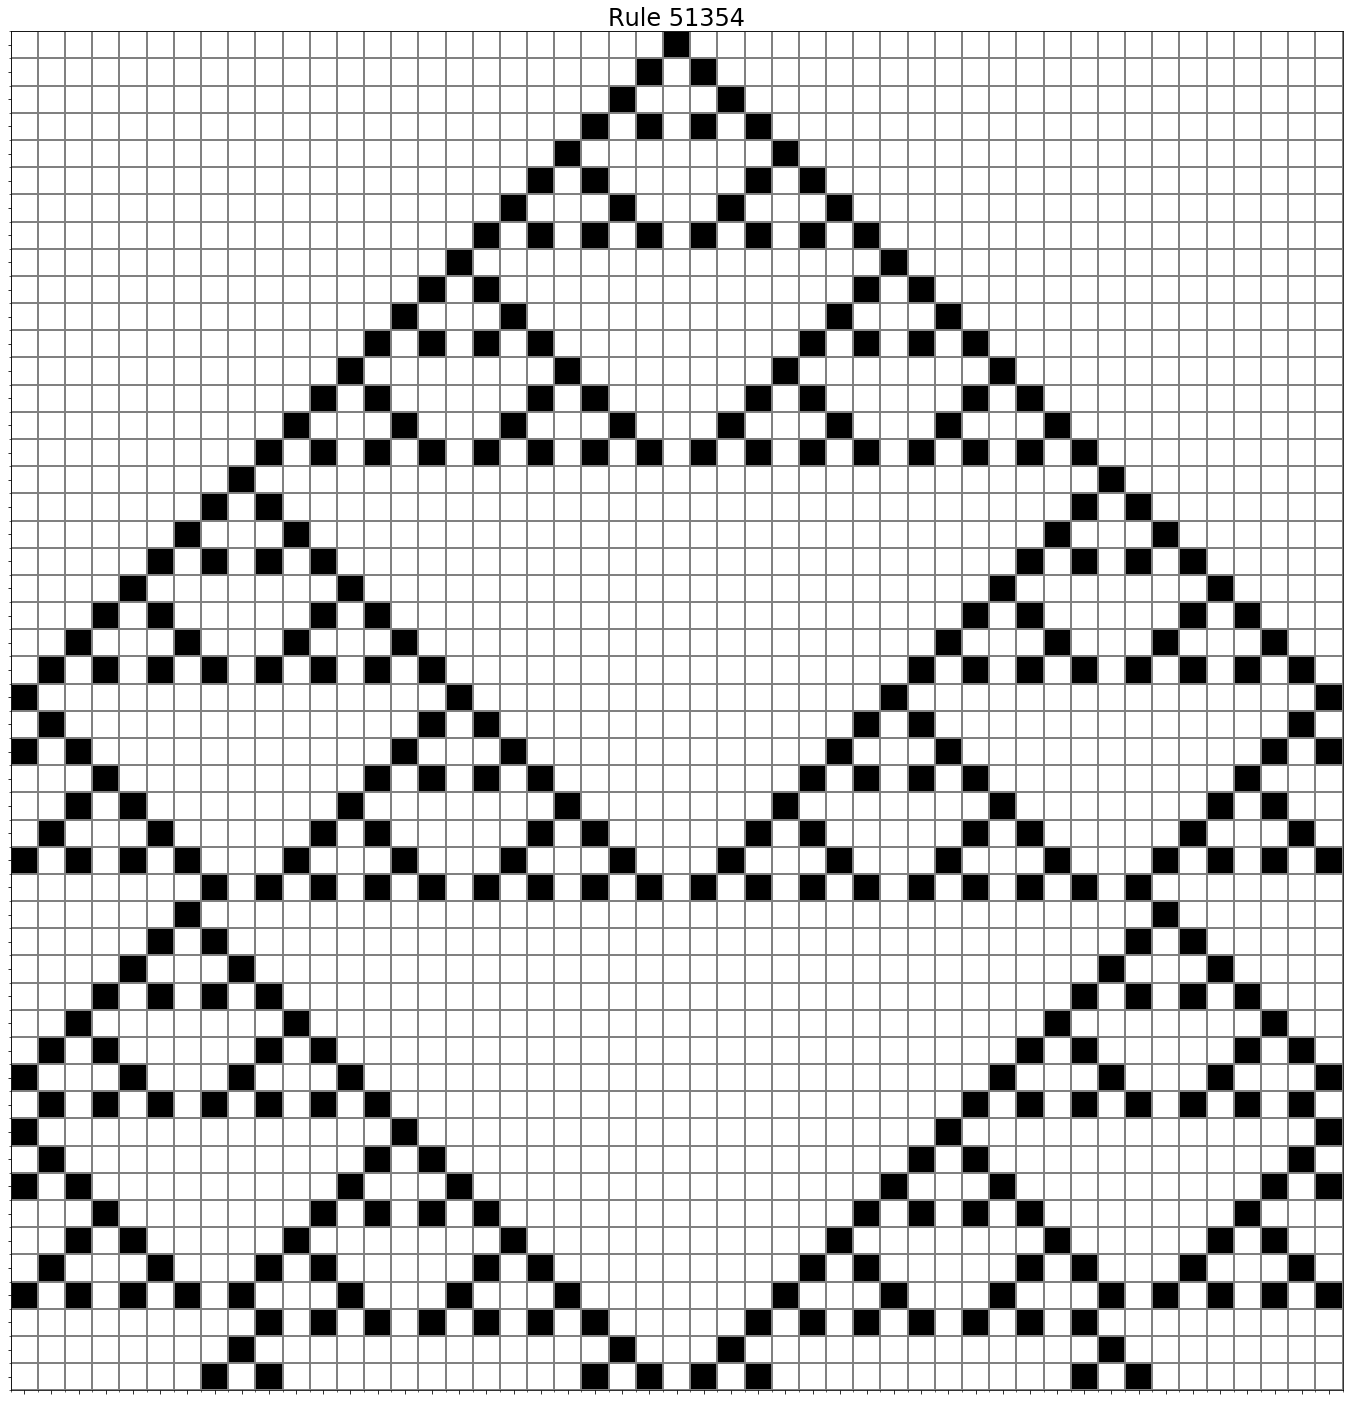

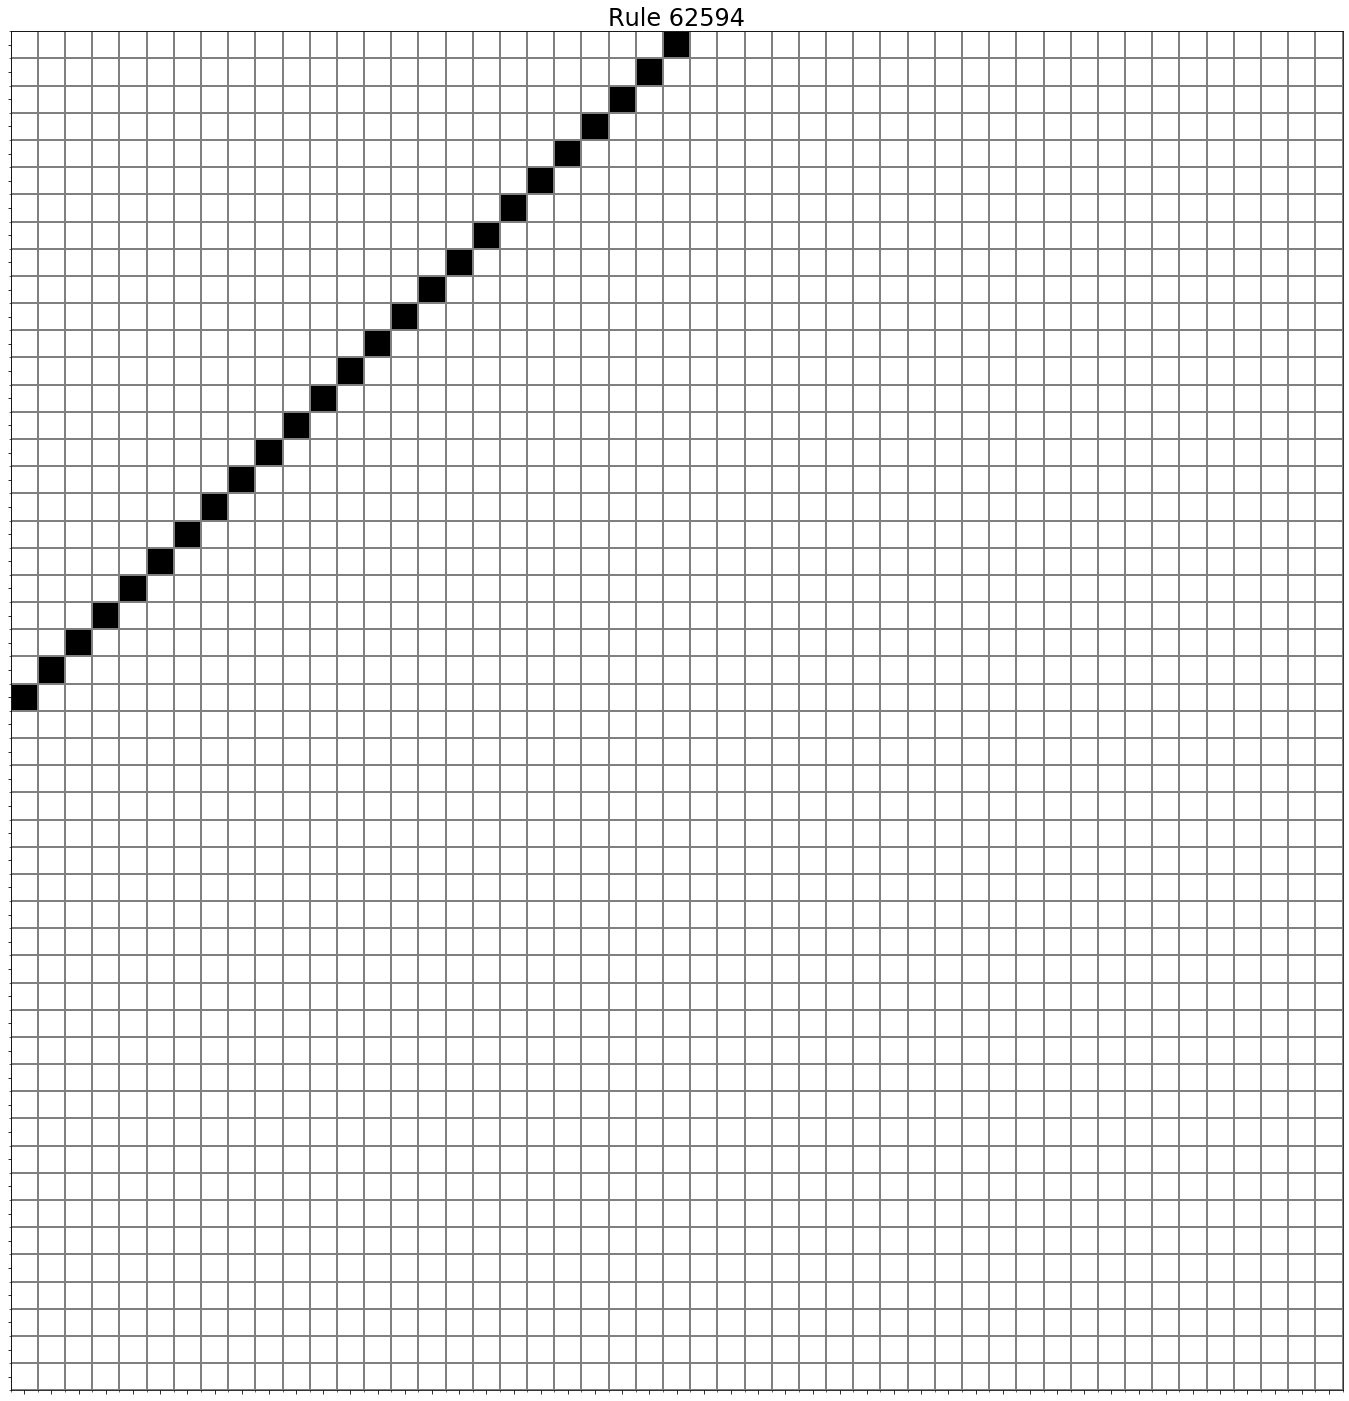

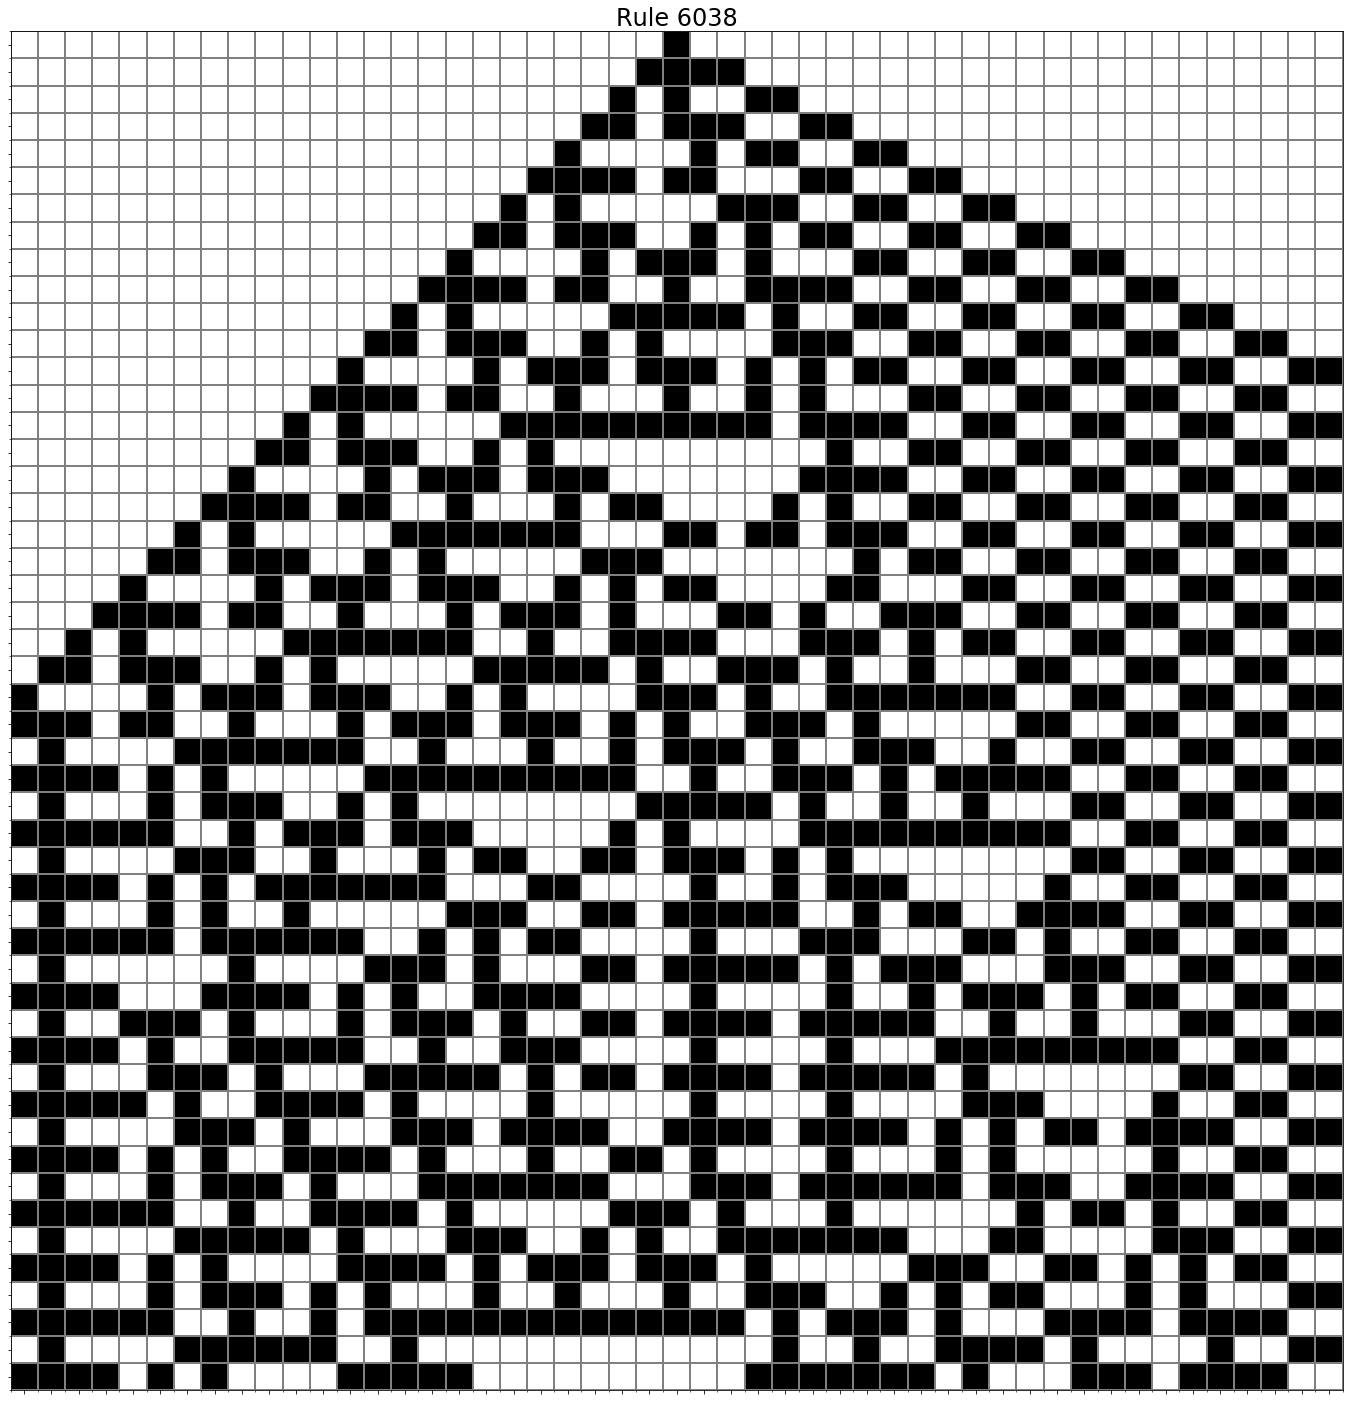

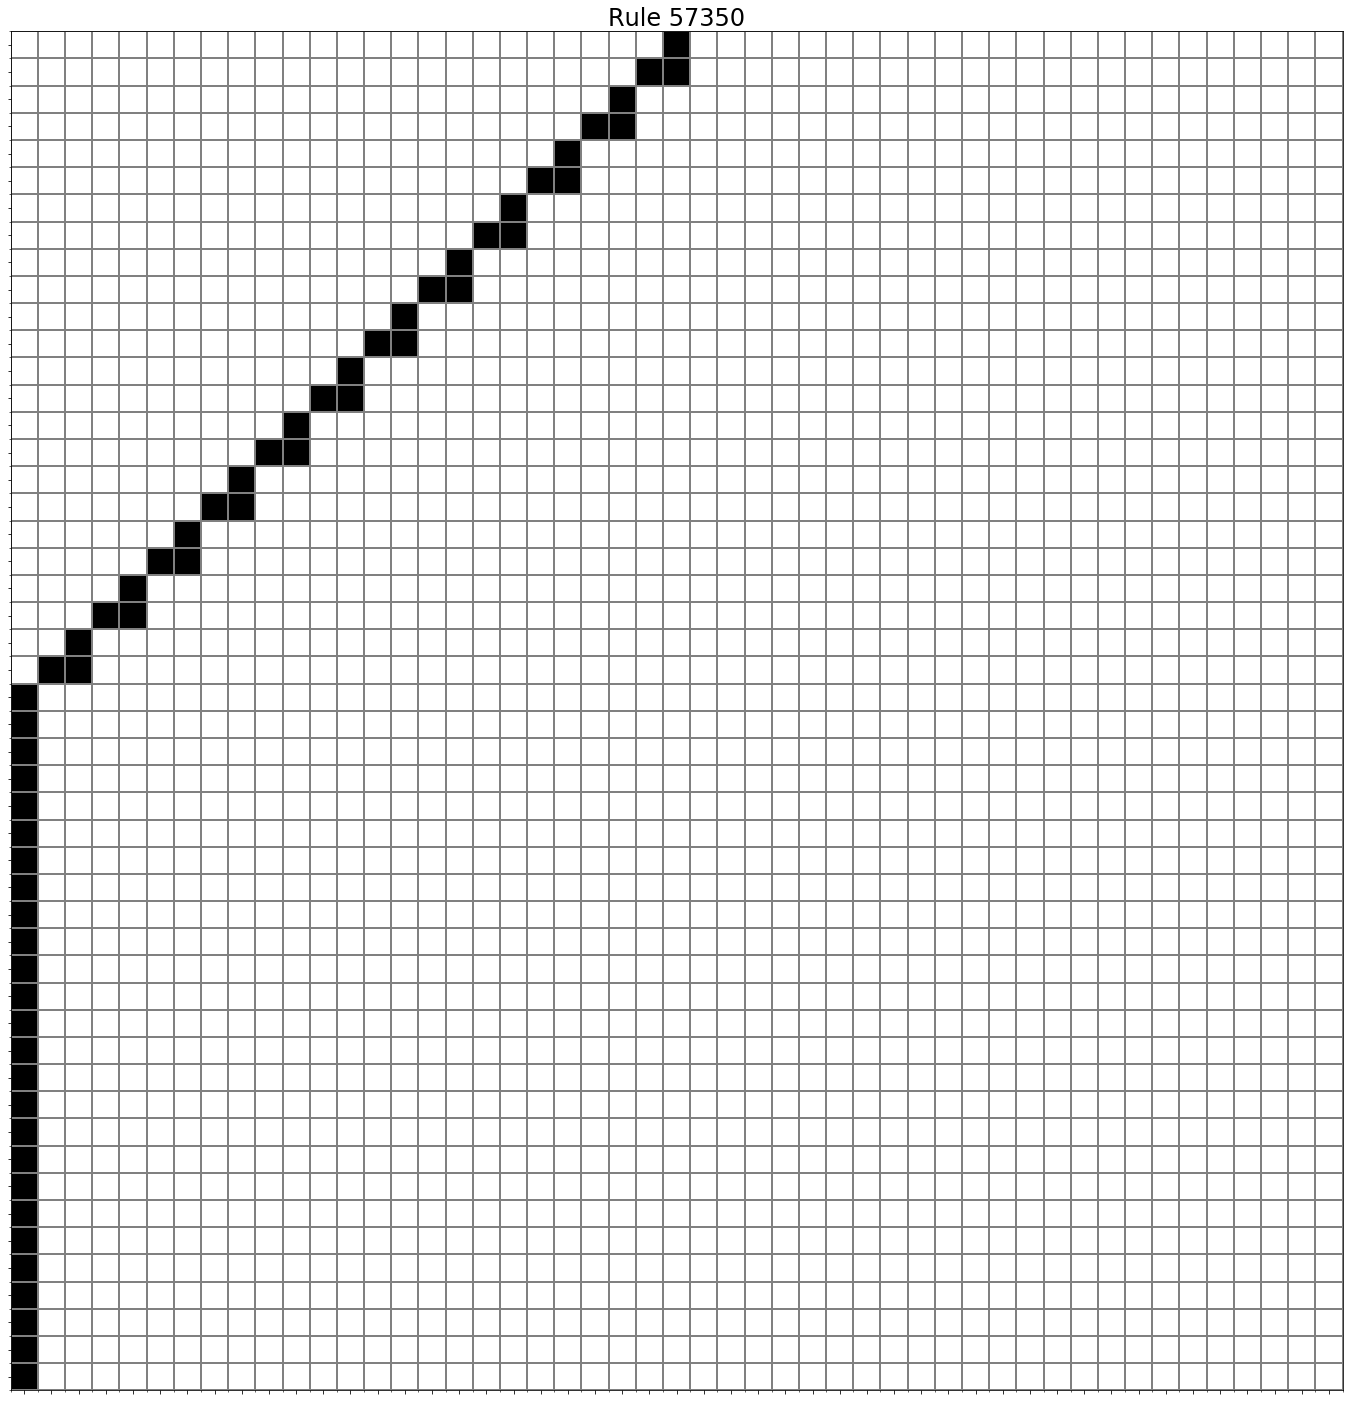

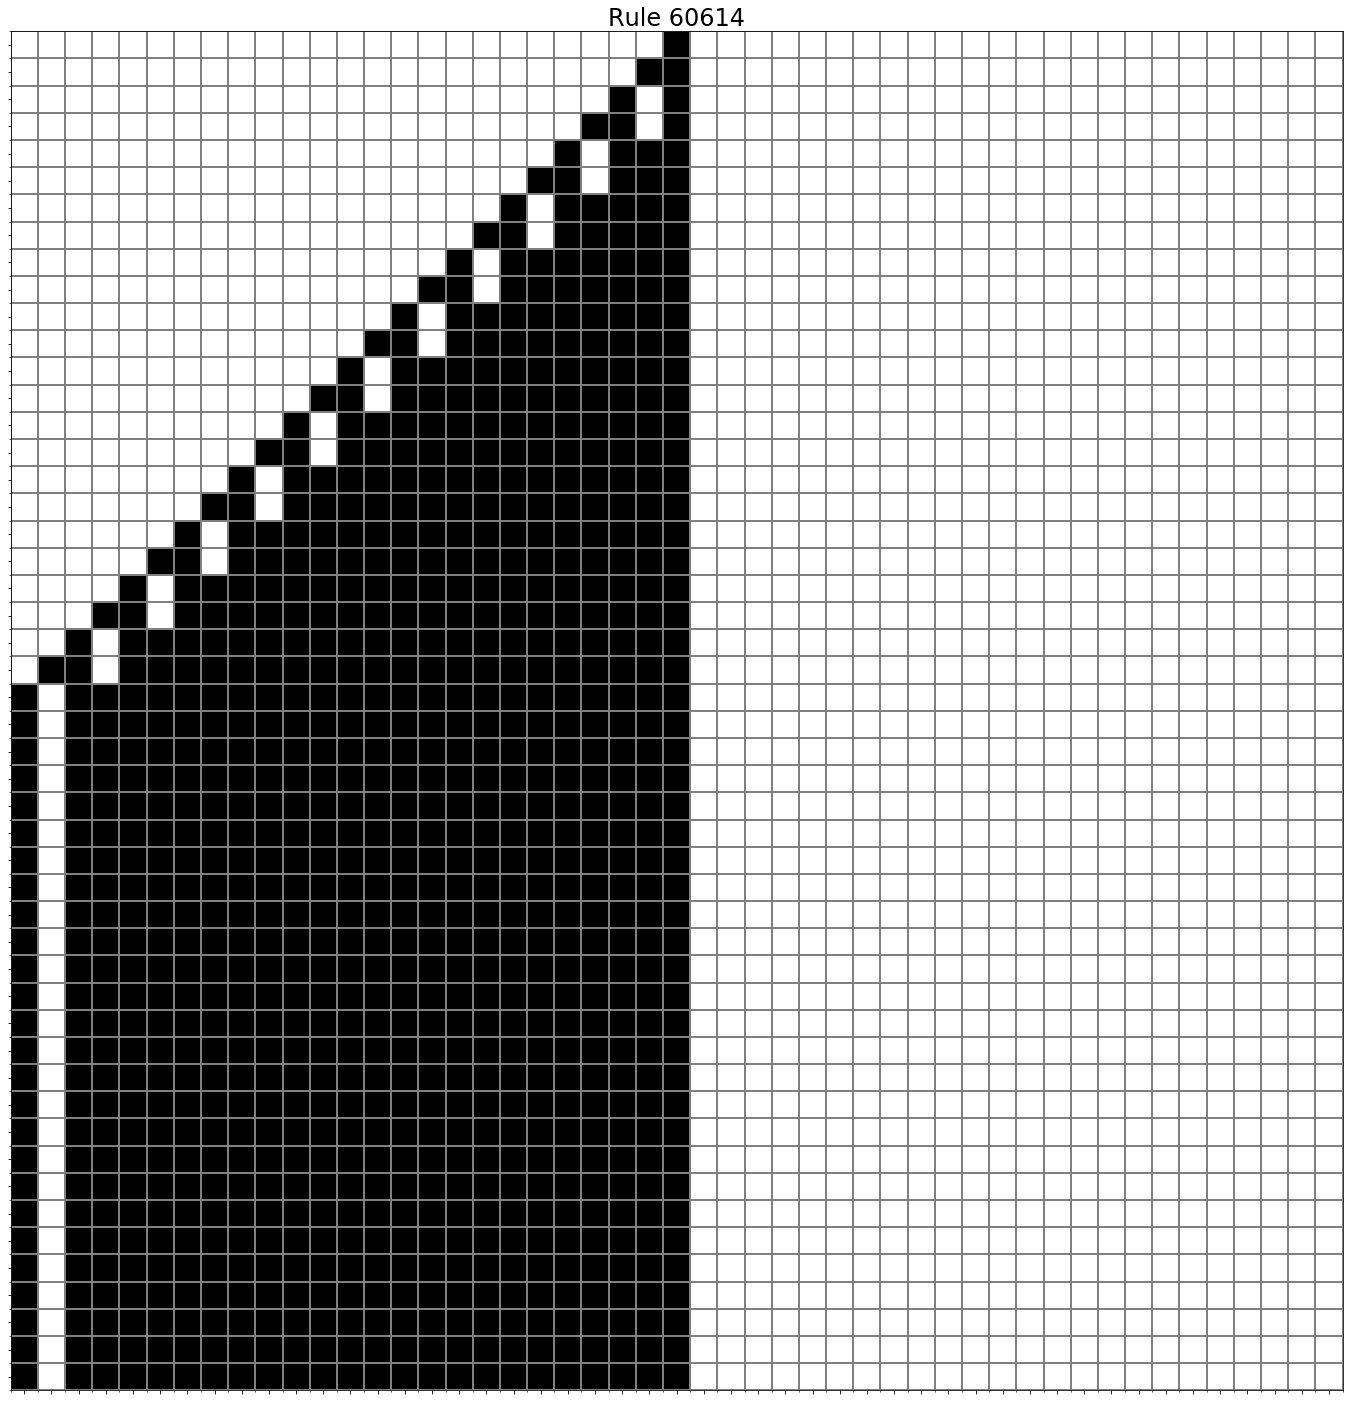

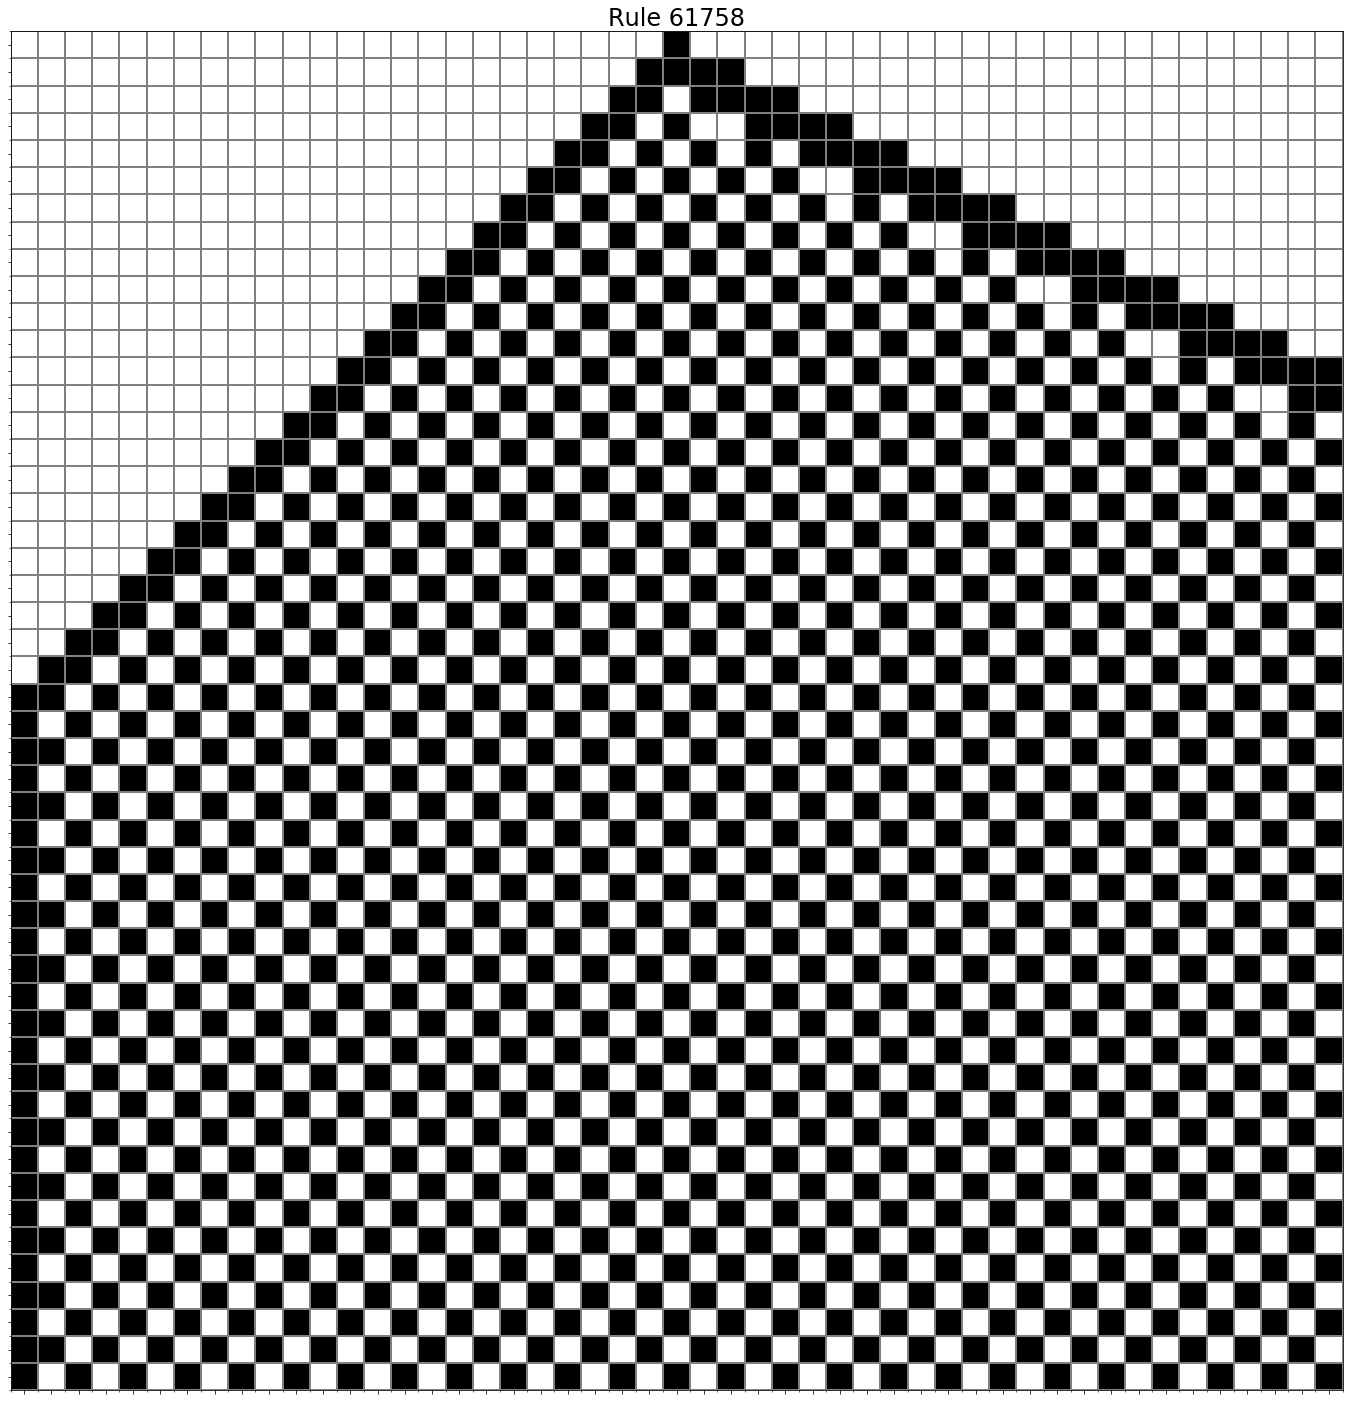

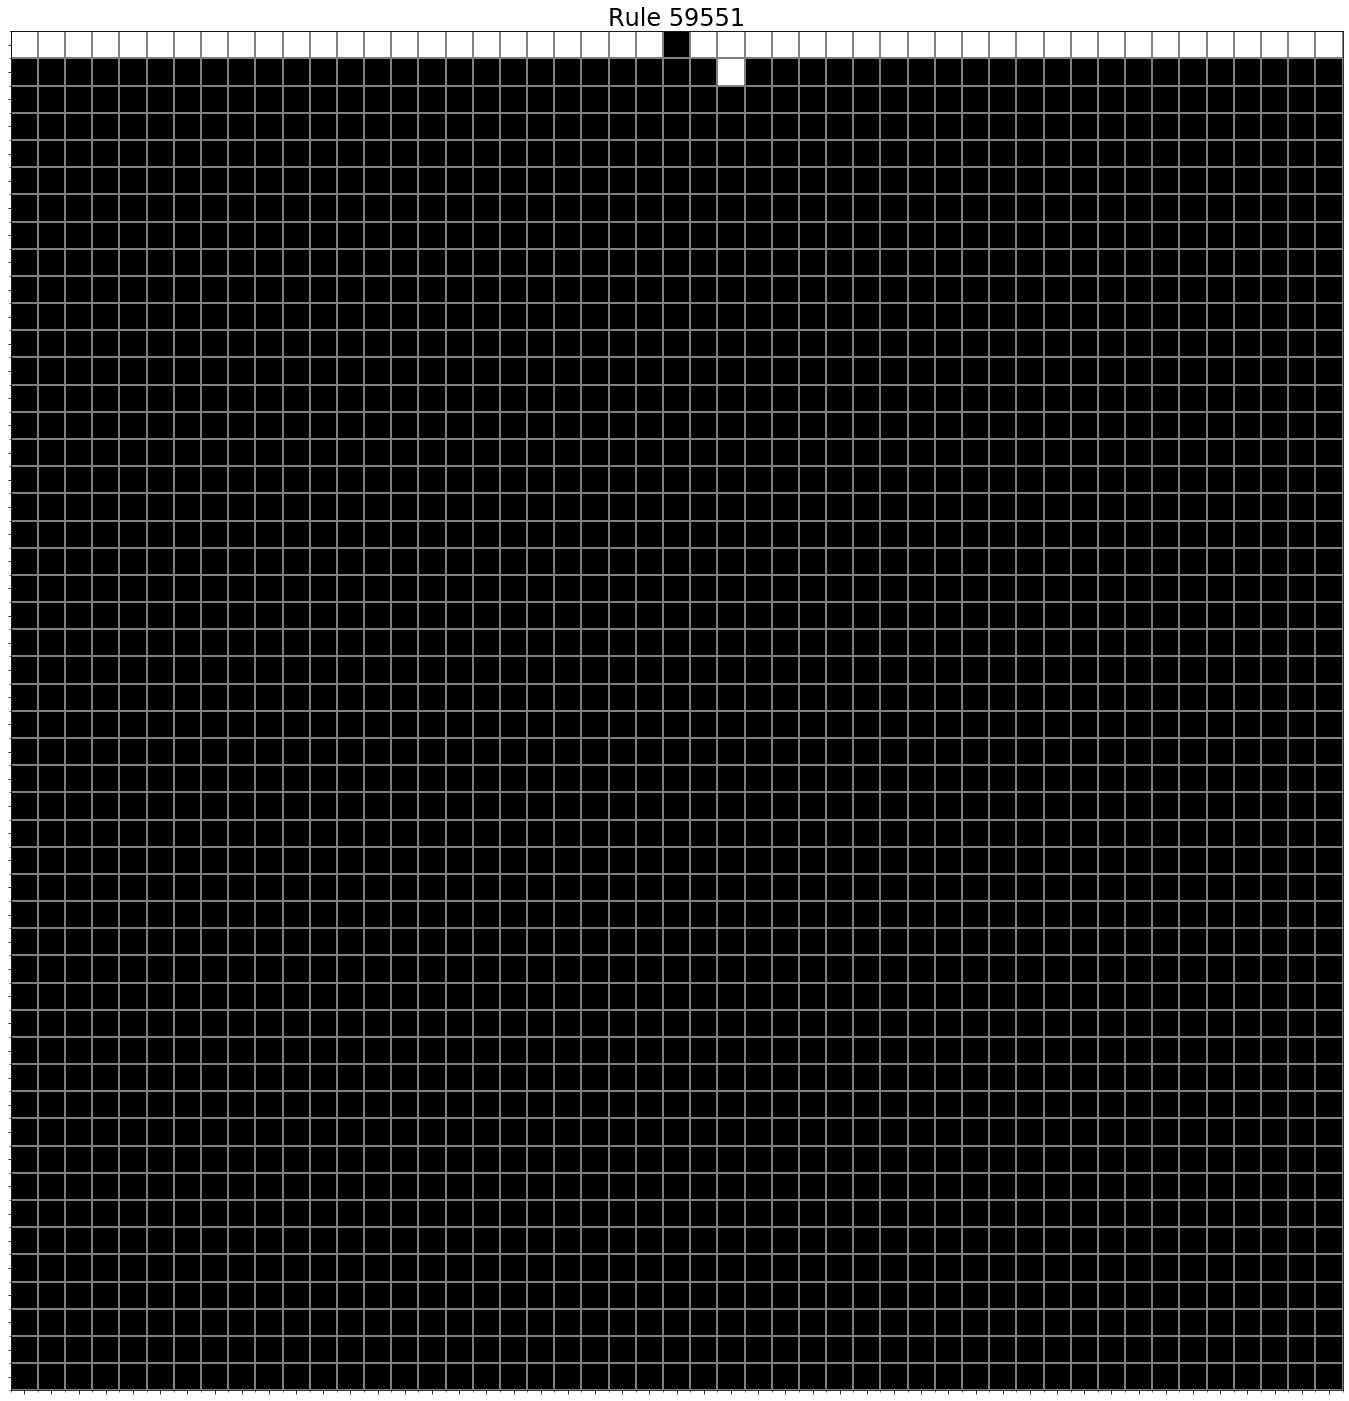

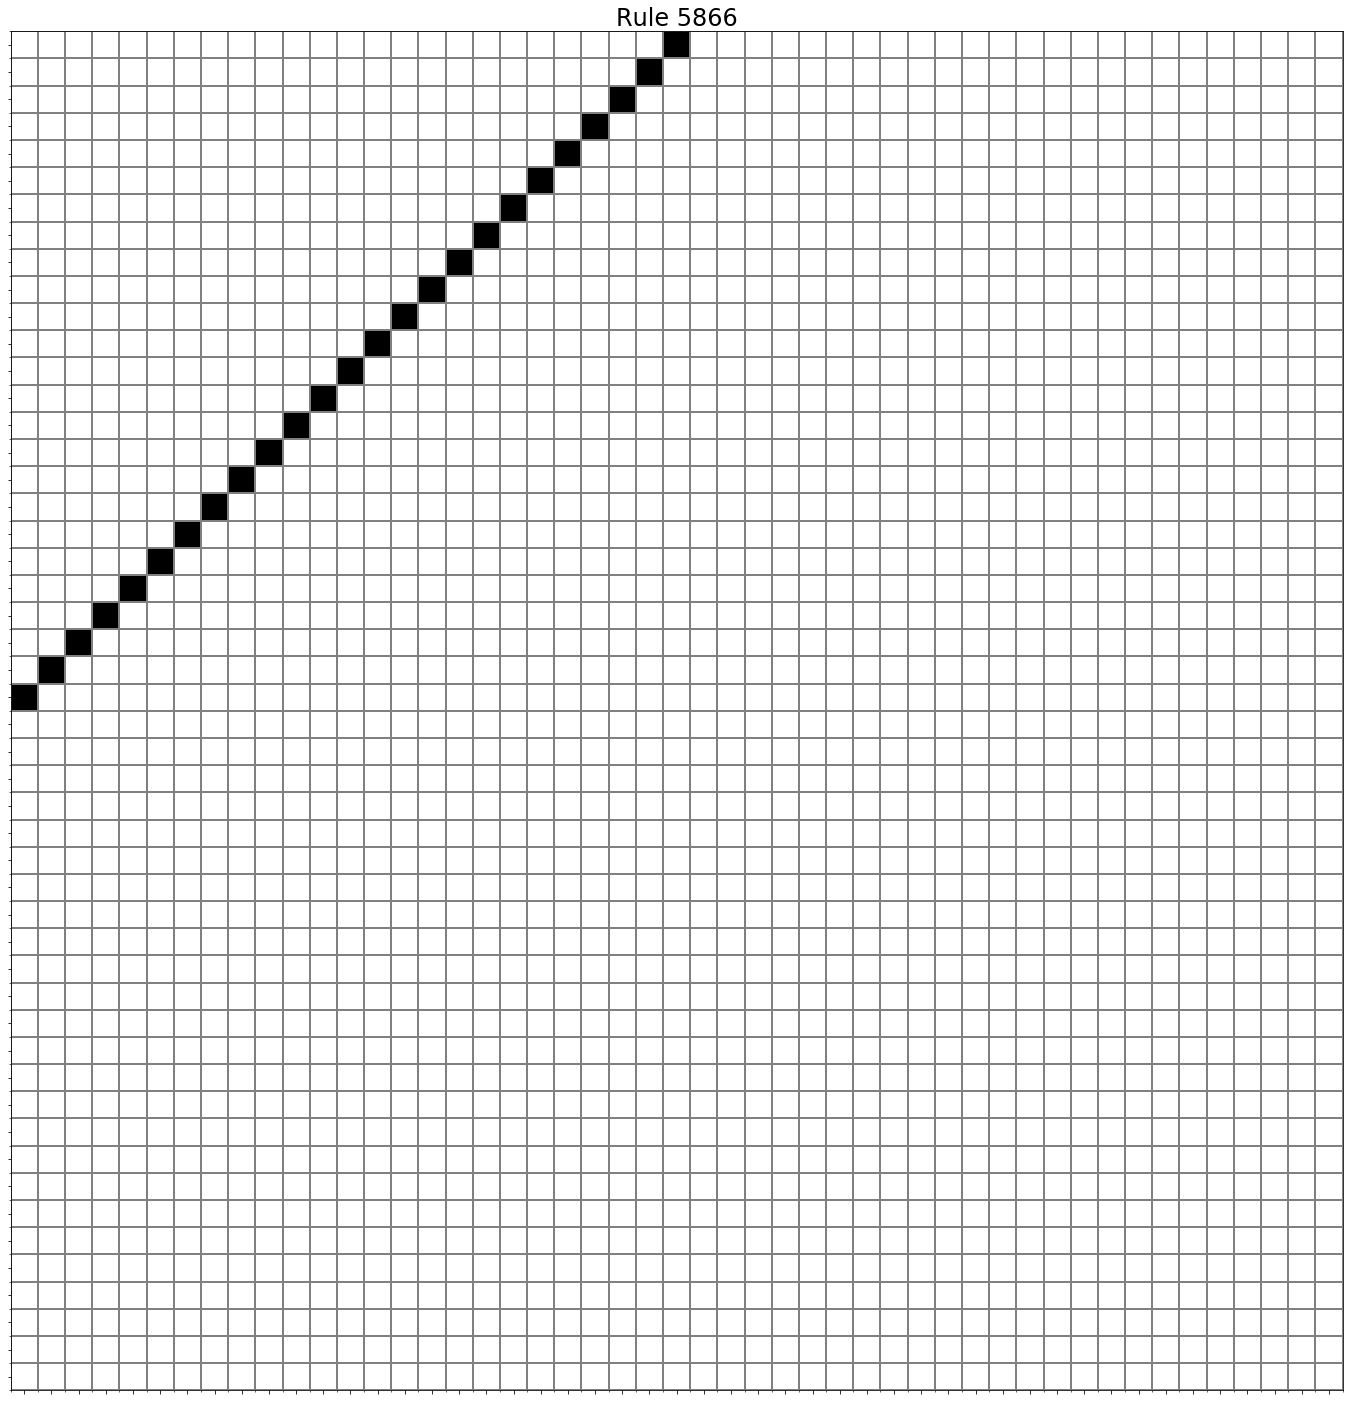

In [4]:
initial = np.zeros(49)
initial[24] = 1

rules = [np.random.randint(0, 65535) for _ in range(50)]

for rule in rules:
    states = wolfram_ca_four(rule, initial, steps=49)
    ax = plot_ca(states, rule)